# **Data Science and Engineering Methods**

**Name : Shreyas Madhusudan Dasari**

**NUID : 002743612**

# **Model Interpretability**

In this assignment, interpret different models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

# **Abstract**

Exploring model interpretability is the goal of this assignment because it is essential for maintaining the openness and dependability of machine learning models. The Shap Additive explanations (SHAP) approach, which offers a thorough description of the contribution of each feature to the final prediction, will be the main topic of discussion. Machine learning models are more reliable when relevant features are identified, biases are found, and SHAP analysis is used. The Python SHAP library offers a complete set of functions for calculating SHAP values as well as tools for visualizing and understanding them.

# Aim
In this assignment we aim to interpret 3 different models:

*   Linear Model(Logistic)
*   Tree Based Model
*   AutoML(Best model)
*   Neural Networks model

Model Interpretability methods:

*   SHAP Analysis
*   LIME 
*   PDP

# **DataSet**

The data set consists of :

1. 8 diagnostic measures to predict diabetes i.e. 'cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp' - The independent variables
2. Diabetes - The dependent variable
3. The category of diabetes ranges from 0(No) to 1(Yes)
4. There are a total of 390 observations

In [ ]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install --upgrade scikit-learn


import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import lime
from lime import lime_tabular
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=0c825131148bc90791d627706294d92119841023c52dc80615f4a2abf6fc721e
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: ht

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:37376..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgq_a1o43
  JVM stdout: /tmp/tmpgq_a1o43/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgq_a1o43/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:37376
Connecting to H2O server at http://127.0.0.1:37376 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_unknownUser_k7pw8p
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:37376
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

# **Loading the dataset**

In [ ]:
# X, y= shap.datasets.diabetes()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ShreyasDasari/Data-Science-and-ML/main/ML%20Data%20Cleaning%20and%20Feature%20Selection/diabetes.csv")

In [ ]:
#Performing One Hot Encoding on gender feature
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')
gender_encoded

gender_female  gender_male
0                1            0
1                1            0
2                1            0
3                1            0
4                1            0
..             ...          ...
385              1            0
386              1            0
387              1            0
388              1            0
389              1            0

[390 rows x 2 columns]

In [ ]:
# Concatenate the encoded column with the original dataframe
df = pd.concat([df, gender_encoded], axis=1)
df.head()

patient_number  cholesterol  glucose  hdl_chol chol_hdl_ratio  age  gender  \
0               1          193       77        49            3,9   19  female   
1               2          146       79        41            3,6   19  female   
2               3          217       75        54              4   20  female   
3               4          226       97        70            3,2   20  female   
4               5          164       91        67            2,4   20  female   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      61     119  22,5          118            70     32   38   
1      60     135  26,4          108            58     33   40   
2      67     187  29,3          110            72     40   45   
3      64     114  19,6          122            64     31   39   
4      70     141  20,2          122            86     32   39   

  waist_hip_ratio     diabetes  gender_female  gender_male  
0            0,84  No diabetes              1            0  
1            0,83  No diabetes              1            0  
2            0,89  No diabetes              1            0  
3            0,79  No diabetes              1            0  
4            0,82  No diabetes              1            0

In [ ]:
#Converting diabetes feature into 0 and 1
df['is_diab'] = df['diabetes'].map({'Diabetes':1,'No diabetes':0})
df['is_diab']
df.head()

patient_number  cholesterol  glucose  hdl_chol chol_hdl_ratio  age  gender  \
0               1          193       77        49            3,9   19  female   
1               2          146       79        41            3,6   19  female   
2               3          217       75        54              4   20  female   
3               4          226       97        70            3,2   20  female   
4               5          164       91        67            2,4   20  female   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      61     119  22,5          118            70     32   38   
1      60     135  26,4          108            58     33   40   
2      67     187  29,3          110            72     40   45   
3      64     114  19,6          122            64     31   39   
4      70     141  20,2          122            86     32   39   

  waist_hip_ratio     diabetes  gender_female  gender_male  is_diab  
0            0,84  No diabetes              1            0        0  
1            0,83  No diabetes              1            0        0  
2            0,89  No diabetes              1            0        0  
3            0,79  No diabetes              1            0        0  
4            0,82  No diabetes              1            0        0

In [ ]:
#Dropping irrelevant fields
df.drop(['patient_number','chol_hdl_ratio','bmi','waist_hip_ratio','gender','diabetes'],inplace=True, axis=1)
df.head()

cholesterol  glucose  hdl_chol  age  height  weight  systolic_bp  \
0          193       77        49   19      61     119          118   
1          146       79        41   19      60     135          108   
2          217       75        54   20      67     187          110   
3          226       97        70   20      64     114          122   
4          164       91        67   20      70     141          122   

   diastolic_bp  waist  hip  gender_female  gender_male  is_diab  
0            70     32   38              1            0        0  
1            58     33   40              1            0        0  
2            72     40   45              1            0        0  
3            64     31   39              1            0        0  
4            86     32   39              1            0        0

In [ ]:
X = df.iloc[:,:-1]
X

cholesterol  glucose  hdl_chol  age  height  weight  systolic_bp  \
0            193       77        49   19      61     119          118   
1            146       79        41   19      60     135          108   
2            217       75        54   20      67     187          110   
3            226       97        70   20      64     114          122   
4            164       91        67   20      70     141          122   
..           ...      ...       ...  ...     ...     ...          ...   
385          227      105        44   83      59     125          150   
386          226      279        52   84      60     192          144   
387          301       90       118   89      61     115          218   
388          232      184       114   91      61     127          170   
389          165       94        69   92      62     217          160   

     diastolic_bp  waist  hip  gender_female  gender_male  
0              70     32   38              1            0  
1              58     33   40              1            0  
2              72     40   45              1            0  
3              64     31   39              1            0  
4              86     32   39              1            0  
..            ...    ...  ...            ...          ...  
385            90     35   40              1            0  
386            88     41   48              1            0  
387            90     31   41              1            0  
388            82     35   38              1            0  
389            82     51   51              1            0  

[390 rows x 12 columns]

In [ ]:
y = df['is_diab']
y

0      0
1      0
2      0
3      0
4      0
      ..
385    0
386    1
387    0
388    1
389    0
Name: is_diab, Length: 390, dtype: int64

# **Training the dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

In [ ]:
# Taking 100 samples out for SHAP analysis as it is a computationally expensive process
X_train_100 = shap.utils.sample(X_train, 100)  

# Taking 100 samples out for SHAP analysis as it is a computationally expensive process
X_test_100 = shap.utils.sample(X_test, 100)  

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regr = LogisticRegression()
regr.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
y_pred = regr.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import mean_absolute_error
score = regr.score(X_test, y_test)
print(f"R^2 score on test set: {score:.3f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {round(mae, 3)} ")

R^2 score on test set: 0.846
MAE = 0.154 


In [ ]:
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

In [ ]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                is_diab   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     30.48
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.34e-44
Time:                        01:17:21   Log-Likelihood:                -2.3806
No. Observations:                 351   AIC:                             28.76
Df Residuals:                     339   BIC:                             75.09
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3583      0.249     -1.440      0.151      -0.848       0.131
cholesterol       0.0006      0.000      1.941      0.053   -8.18e-06       0.001
glucose           0.0041      0.000     14.840      0.000       0.004       0.005
hdl_chol         -0.0013      0.001     -1.494      0.136      -0.003       0.000
age               0.0016      0.001      1.376      0.170      -0.001       0.004
height           -0.0002      0.005     -0.048      0.961      -0.010       0.009
weight         9.767e-05      0.001      0.112      0.911      -0.002       0.002
systolic_bp       0.0012      0.001      1.317      0.189      -0.001       0.003
diastolic_bp     -0.0008      0.001     -0.635      0.526      -0.003       0.002
waist             0.0036      0.005      0.680      0.497      -0.007       0.014
hip              -0.0029      0.006     -0.493      0.622      -0.014       0.009
gender_female    -0.1618      0.119     -1.358      0.175      -0.396       0.073
gender_male      -0.1965      0.133     -1.481      0.140      -0.458       0.065
==============================================================================
Omnibus:                      112.040   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              591.257
Skew:                           1.236   Prob(JB):                    4.07e-129
Kurtosis:                       8.858   Cond. No.                     3.05e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.71e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **Interpreting Regression Coefficient**

Model Co-efficient:

A coeficient's positive or negative value indicates whether the target and predictors have a positive or negative association. A positive number means that if the co-value efficient's rises, the target's value will rise as well, and vice versa. The negative numbers, on the other hand, show that the goal value rises if the co-efficient value falls and vice versa.

As seen table in the coeffcient column:

1. Glucose has the highest coeffcient.
2. Followed by waist

Coefficients with high absolute values can be used to estimate how significant a given variable is in a linear regression. As was already said, in this case, glucose and waist appear to be the most crucial factors in predicting the target, which is diabetes.

**P Values**

The result is hailed as significant if the p-value is 0.05 or less; however, if it is more than 0.05, the result is non-significant.

*   Glucose
*   Cholestrol

**Skew and Kurtosis**

Kurtosis reveals the height and sharpness of the center peak, whereas Skewness reveals the quantity and direction of skew (Departure from the central axis). The ideal value for these two measurements is 0, but in our situation, Skew and Kurtosis are respectively -0.143 and 3.717.

**Durbin-Watson**

A statistical test called the Durbin-Watson test is used to find auto-correlation in the residuals of a regression study. It falls between 0 and 4. 
1. Value 2 denotes the absence of any autocorrelation.
2. Value between 0 and 2 denotes the presence of positive autocorrelation.
3. Values between 2 and 4 denote the presence of negative autocorrelation.

Our model has a DW score of 1.676, which indicates that the regression residuals have a positive auto-correlation.

**Jarque-Bera**

Whether or not the data has skew or kurtosis, the JB test is known as the test of normality. It indicates that the data do not have a normal distribution if it is far from zero. Our JB value is 591.257, which confirms the meaning Skew and Kurtosis gave us.

# **Random Forest**

In [ ]:
#Training the dataset for Tree based model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor model with 100 trees
rf_model = RandomForestRegressor(n_estimators=10)

# Fit the model to the data
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([0. , 0.3, 0.2, 0. , 0. , 0.2, 0.4, 0. , 0. , 0.4, 0. , 0. , 0.3,
       0. , 0.4, 0.3, 0. , 0.3, 0. , 0. , 0.4, 0.2, 0.3, 0. , 0. , 0. ,
       0.1, 0. , 0.4, 0. , 0.6, 1. , 0. , 0.5, 0.2, 0.3, 0.4, 0.2, 0. ])

In [ ]:
from sklearn.metrics import mean_absolute_error
score = rf_model.score(X_test, y_test)
print(f"R^2 score on test set: {score:.3f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {round(mae, 3)} ")

R^2 score on test set: 0.023
MAE = 0.313 


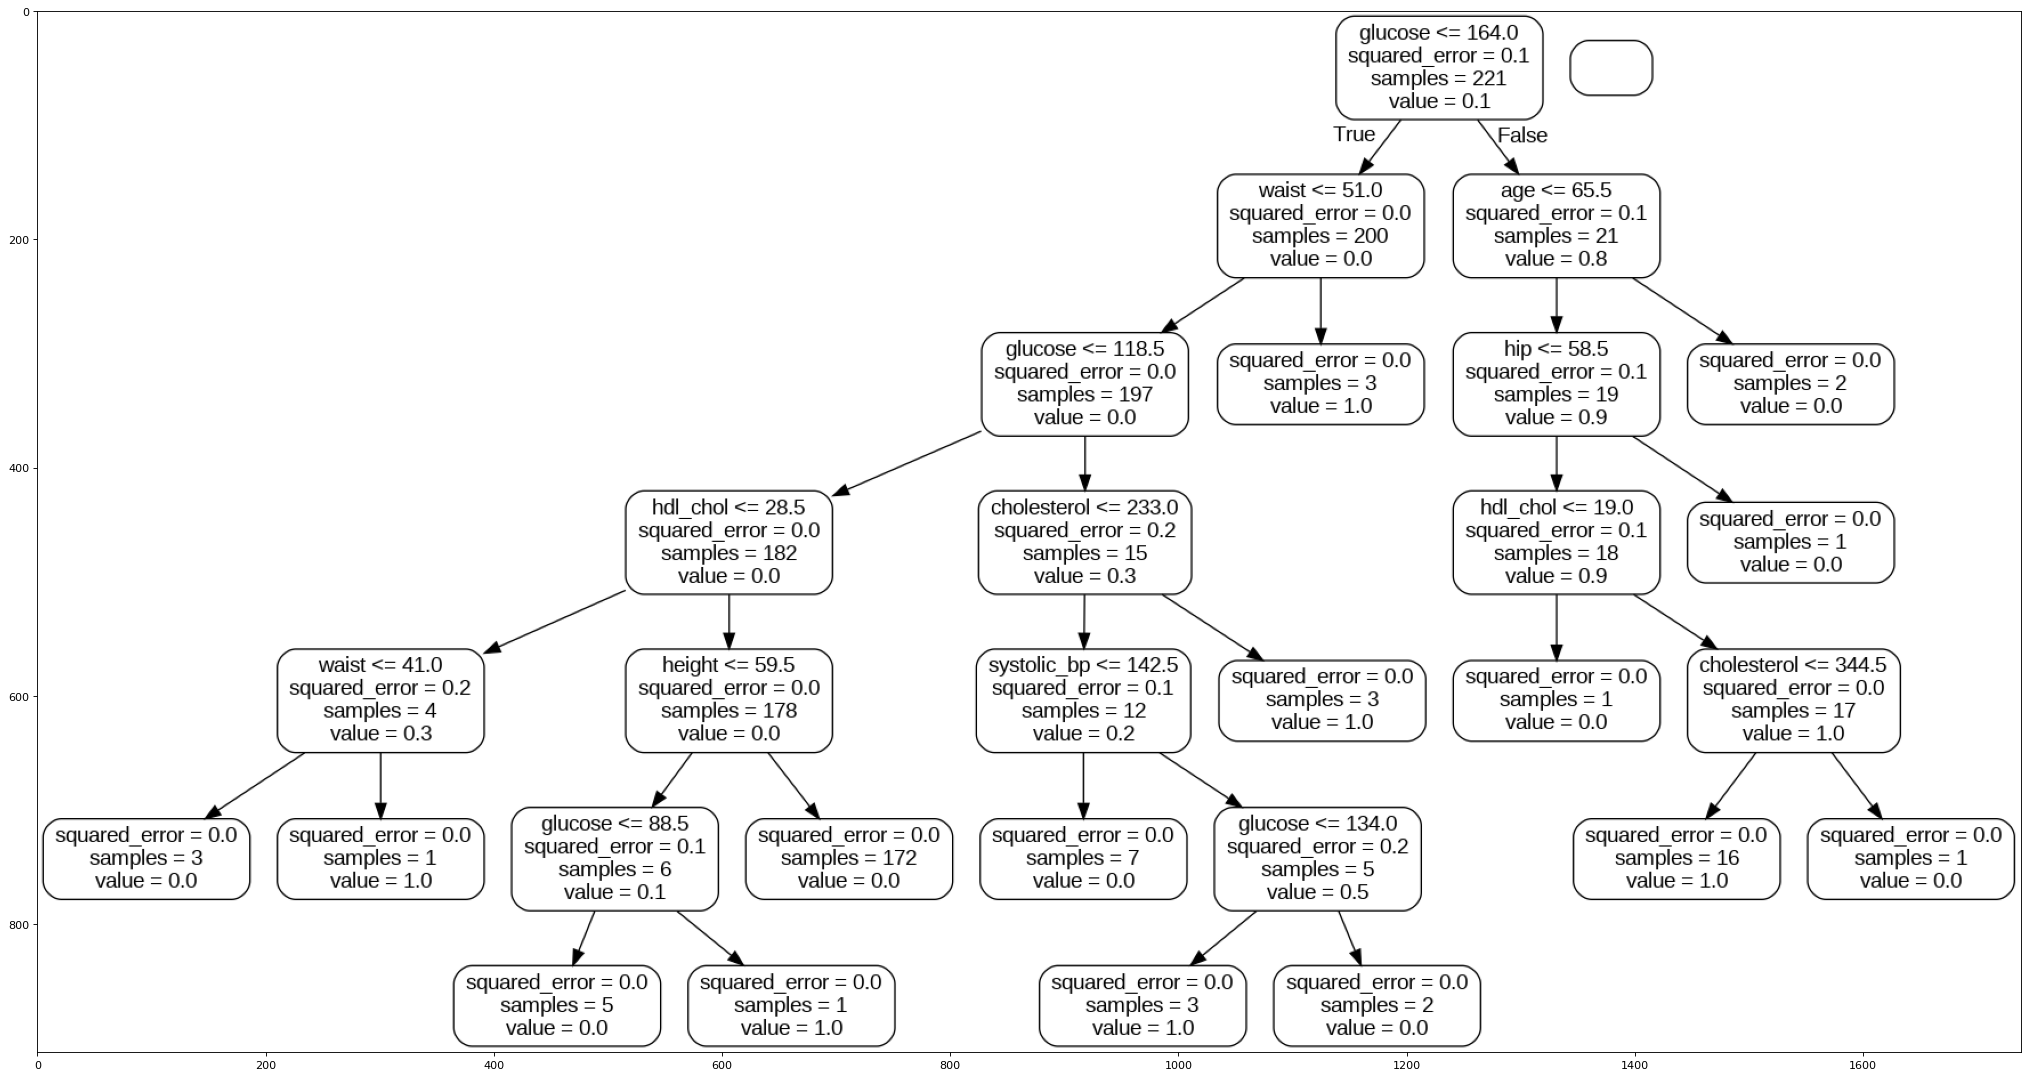

In [ ]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = rf_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(X_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# **Interpreting Nodes of a Tree Based Model**

The Random Forest Regressor relies on the idea of group intelligence. One of the numerous trees used to predict the target variable is the decision tree mentioned above. For a specific input, each decision tree regression forecasts a number as the result. The output of random forest regression is the average of those forecasts.

The tree, as normal, includes criteria on every internal node and a value assigned to every leaf (i.e. the value to be predicted). The mean of the response variables at each internal node, or the value at each internal node, has also been mapped out.



In [ ]:
# Get numerical feature importances
tree_importances = list(rf_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(X_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [ ]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: glucose              Importance: 0.61
Variable: age                  Importance: 0.08
Variable: cholesterol          Importance: 0.07
Variable: hdl_chol             Importance: 0.06
Variable: systolic_bp          Importance: 0.05
Variable: waist                Importance: 0.05
Variable: diastolic_bp         Importance: 0.03
Variable: weight               Importance: 0.02
Variable: height               Importance: 0.01
Variable: hip                  Importance: 0.01
Variable: gender_female        Importance: 0.0
Variable: gender_male          Importance: 0.0


# **Neural Network**

In [ ]:
#Training the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=False)

In [ ]:
X_train.shape

(351, 12)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import tensorflow as tf

nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(12,)))
nn.add(tf.keras.layers.Dense(units=32, activation='relu'))
nn.add(tf.keras.layers.Dense(units=1))

In [ ]:
nn.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 3s 9ms/step - loss: 0.1545 - mae: 0.2795
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0923 - mae: 0.2145
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 0.0702 - mae: 0.1800
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.0605 - mae: 0.1606
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.0567 - mae: 0.1507
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 0.0537 - mae: 0.1446
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.0513 - mae: 0.1391
Epoch 8/10
11/11 [==============================] - 0s 8ms/step - loss: 0.0494 - mae: 0.1342
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 0.0482 - mae: 0.1367
Epoch 10/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0463 - mae: 0.1311


In [ ]:
y_pred = nn.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Calculate the R2 score of the predictions
r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.2f}".format(r2))

R2 Score: 0.11


# **Getting the best model using AutoML**

In [ ]:
# Converting Pandas dataframe in H2O dataframe
df1 = h2o.H2OFrame(df)  

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Setting up the data split between training and test dataset
pct_rows = 0.80  
df1_train, df1_test = df1.split_frame([pct_rows])

In [ ]:
#Setting predictor and target variables
X = df1.columns
print(X)

['cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'gender_female', 'gender_male', 'is_diab']


In [ ]:
#Setting predictor and target variables
X1 = df[['cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'gender_female', 'gender_male']]
X1

cholesterol  glucose  hdl_chol  age  height  weight  systolic_bp  \
0            193       77        49   19      61     119          118   
1            146       79        41   19      60     135          108   
2            217       75        54   20      67     187          110   
3            226       97        70   20      64     114          122   
4            164       91        67   20      70     141          122   
..           ...      ...       ...  ...     ...     ...          ...   
385          227      105        44   83      59     125          150   
386          226      279        52   84      60     192          144   
387          301       90       118   89      61     115          218   
388          232      184       114   91      61     127          170   
389          165       94        69   92      62     217          160   

     diastolic_bp  waist  hip  gender_female  gender_male  
0              70     32   38              1            0  
1              58     33   40              1            0  
2              72     40   45              1            0  
3              64     31   39              1            0  
4              86     32   39              1            0  
..            ...    ...  ...            ...          ...  
385            90     35   40              1            0  
386            88     41   48              1            0  
387            90     31   41              1            0  
388            82     35   38              1            0  
389            82     51   51              1            0  

[390 rows x 12 columns]

In [ ]:
y1 = df['is_diab']

In [ ]:
y = "is_diab"
X.remove(y)  # Removing the result from our predictors data
print(X)

['cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'gender_female', 'gender_male']


In [ ]:
# Setting of AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
# Converting is_diab to binary 0 and 1
df1_train["is_diab"] = df1_train["is_diab"].asfactor()

In [ ]:
# Training the dataset on different models
aml.train(x=X, y=y, training_frame=df1_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_lr_annealing_selection_AutoML_1_20230329_11743_select_model


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    51                 51                          11575                  4            4            4             8             16            13.451

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00691987076119539
RMSE: 0.08318576056751173
LogLoss: 0.045762758532021185
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44791897349117765
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      262  0    0        (0.0/262.0)
1      0    46   0        (0.0/46.0)
Total  262  46   0        (0.0/308.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.447919     1         45
max f2                       0.447919     1         45
max f0point5                 0.447919     1         45
max accuracy                 0.447919     1         45
max precision                0.974258     1         0
max recall                   0.447919     1         45
max specificity              0.974258     1         0
max absolute_mcc             0.447919     1         45
max min_per_class_accuracy   0.447919     1         45
max mean_per_class_accuracy  0.447919     1         45
max tns                      0.974258     262       0
max fns                      0.974258     45        0
max fps                      0.00602961   262       304
max tps                      0.447919     46        45
max tnr                      0.974258     1         0
max fnr                      0.974258     0.978261  0
max fpr                      0.00602961   1         304
max tpr                      0.447919     1         45

Gains/Lift Table: Avg response rate: 14.94 %, avg score: 14.92 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.012987                    0.969291           6.69565  6.69565            1                0.971814    1                           0.971814            0.0869565       0.0869565                  569.565  569.565            0.0869565
2        0.0227273                   0.962202           6.69565  6.69565            1                0.964249    1                           0.968572            0.0652174       0.152174                   569.565  569.565            0.152174
3        0.0324675                   0.957893           6.69565  6.69565            1                0.959614    1                           0.965885            0.0652174       0.217391                   569.565  569.565            0.217391
4        0.0422078                   0.953026           6.69565  6.69565            1                0.955233    1                           0.963426            0.0652174       0.282609                   569.565  569.565            0.282609
5        0.0519481                   0.941782           6.69565  6.69565            1                0.945864    1                           0.960134            0.0652174       0.347826                   569.565 

In [ ]:
# Leaderboard displaying the effectiveness of several models on the dataset.
print(aml.leaderboard)

model_id                                                              auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_lr_annealing_selection_AutoML_1_20230329_11743_select_model  0.935115   0.218117  0.781835                0.185363  0.249126  0.0620638
StackedEnsemble_BestOfFamily_4_AutoML_1_20230329_11743           0.929389   0.211913  0.780218                0.185363  0.245998  0.060515
GBM_grid_1_AutoML_1_20230329_11743_model_23                      0.929389   0.218446  0.776031                0.162297  0.25014   0.0625701
StackedEnsemble_AllModels_2_AutoML_1_20230329_11743              0.929057   0.207699  0.780663                0.187272  0.243293  0.0591915
StackedEnsemble_BestOfFamily_5_AutoML_1_20230329_11743           0.928808   0.211962  0.779905                0.183455  0.243153  0.0591235
XGBoost_grid_1_AutoML_1_20230329_11743_model_24                  0.928311   0.220252  0.782327                0.196233  0.25291   0.0639635
StackedEnsemble_BestO

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'GBM_lr_annealing_selection_AutoML_1_20230329_11743_select_model': 0,
 'GLM_1_AutoML_1_20230329_11743': 32}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

0


In [ ]:
#Getting the best model
best_model.algo

'gbm'

In [ ]:
print(best_model.r2(train=True))

0.9455321423921308


In [ ]:
predictions = best_model.predict(df1_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Predictions on Test Dataset using the best model from the leaderboard.
y_pred = h2o.as_list(predictions)  
print(y_pred)
y_pred

    predict        p0        p1
0         0  0.992588  0.007412
1         0  0.989064  0.010936
2         0  0.992192  0.007808
3         0  0.993921  0.006079
4         0  0.990725  0.009275
..      ...       ...       ...
77        0  0.931176  0.068824
78        0  0.961749  0.038251
79        0  0.709576  0.290424
80        0  0.981927  0.018073
81        0  0.605656  0.394344

[82 rows x 3 columns]


predict        p0        p1
0         0  0.992588  0.007412
1         0  0.989064  0.010936
2         0  0.992192  0.007808
3         0  0.993921  0.006079
4         0  0.990725  0.009275
..      ...       ...       ...
77        0  0.931176  0.068824
78        0  0.961749  0.038251
79        0  0.709576  0.290424
80        0  0.981927  0.018073
81        0  0.605656  0.394344

[82 rows x 3 columns]

In [ ]:
# Real Answers
y_test = h2o.as_list(df1_test[y])  
y_test

is_diab
0         0
1         0
2         0
3         0
4         0
..      ...
77        0
78        0
79        0
80        0
81        0

[82 rows x 1 columns]

# **SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20230329_11743_model_11             0.956933   0.222602  0.795545               0.136555   0.260969  0.0681048                 154                   0.076522  GBM
XGBoost_grid_1_AutoML_1_20230329_11743_model_1          0.951681   0.230347  0.787916               0.115546   0.271393  0.073654                  246                   0.174921  XGBoost
GBM_grid_1_AutoML_1_20230329_11743_model_25             0.94958    0.219499  0.770471               0.115546   0.26621   0.0708678                 200                   0.078889  GBM
DeepLearning_grid_1_AutoML_1_20230329_11743_model_2     0.948529   0.395483  0.700239               0.072479   0.271931  0.0739466                  96                   0.073002  DeepLearning
DeepLearning_grid_2_AutoML_1_20230329_11743_model_1     0.947479   0.402009  0.724403               0.10084    0.276329  0.0763576                 643                   0.184098  DeepLearning
GBM_grid_1_AutoML_1_20230329_11743_model_31             0.947479   0.218937  0.821611               0.193277   0.258938  0.0670489                 116                   0.17205   GBM
GBM_grid_1_AutoML_1_20230329_11743_model_4              0.947479   0.220622  0.787244               0.101891   0.26343   0.0693953                 167                   0.203147  GBM
GLM_1_AutoML_1_20230329_11743                           0.947479   0.30935   0.649362               0.129202   0.286891  0.0823066                 200                   0.07827   GLM
XGBoost_grid_1_AutoML_1_20230329_11743_model_20         0.946954   0.238488  0.744796               0.136555   0.266981  0.0712788                 334                   0.154868  XGBoost
XGBoost_grid_1_AutoML_1_20230329_11743_model_17         0.945378   0.245997  0.774008               0.164916   0.284411  0.0808897                 138                   0.115646  XGBoost
GBM_grid_1_AutoML_1_20230329_11743_model_23             0.944328   0.2308    0.730554               0.108193   0.270877  0.0733742                 135                   0.176353  GBM
XGBoost_grid_1_AutoML_1_20230329_11743_model_3          0.942227   0.244391  0.816731               0.157563   0.282974  0.0800744                 252                   0.073552  XGBoost
XGBoost_grid_1_AutoML_1_20230329_11743_model_25         0.942227   0.239602  0.755944               0.122899   0.28041   0.0786296                 151                   0.06929   XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_1_20230329_11743  0.942227   0.266222  0.677501               0.136555   0.281126  0.0790318                 875                   0.319127  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230329_11743_model_7          0.942227   0.234225  0.716699               0.0945378  0.27775   0.0771451                 340                   0.202703  XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_1_20230329_11743  0.942227   0.269768  0.62528                0.136555   0.277539  0.0770277                1516                   0.122715  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230329_11743_model_12         0.941176   0.259147  0.734367               0.193277   0.293658  0.0862352                 213                   0.115081  XGBoost
XGBoost_2_AutoML_1_20230329_11743                       0.940126   0.253758  0.684167               0.172269   0.288708  0.0833521                 258                   0.215399  XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20230329_11743     0.939076   0.265009  0.657722               0.136555   0.283178  0.08019                   982                   0.487996  StackedEnsemble
GBM_grid_1_AutoML_1_20230329_11743_model_1              0.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

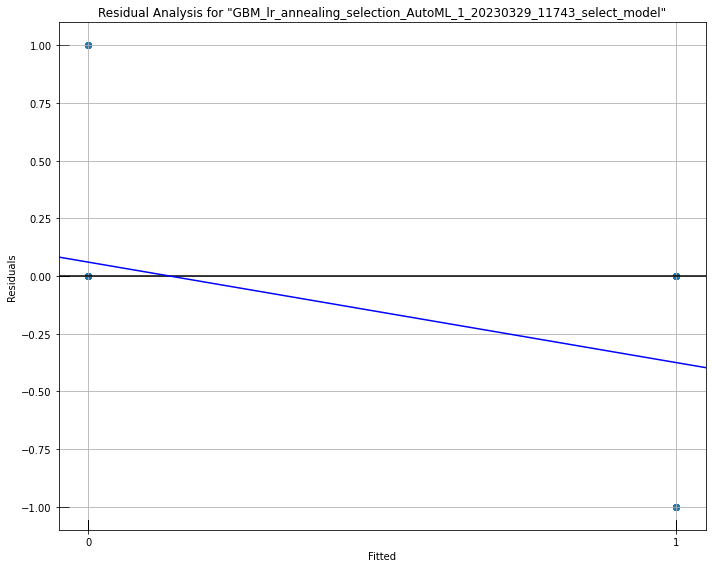

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

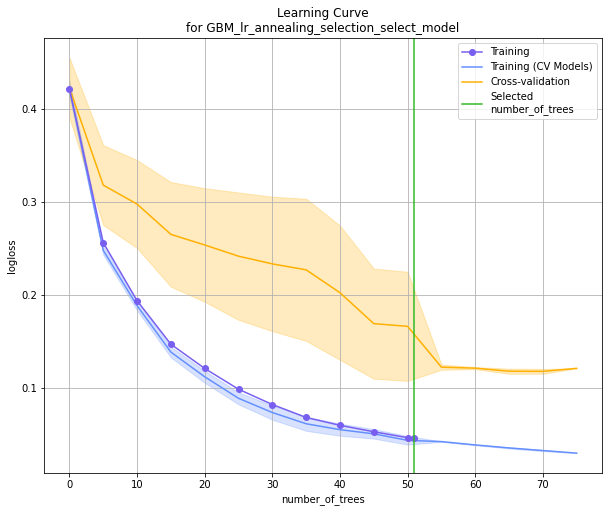

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

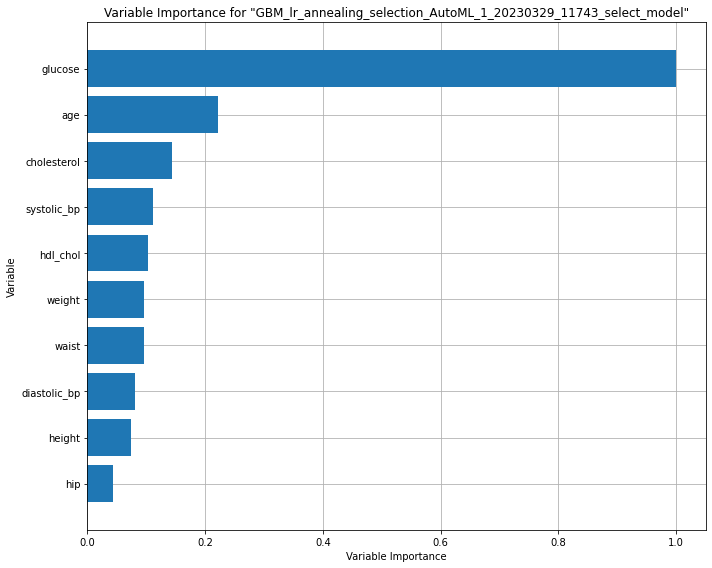

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

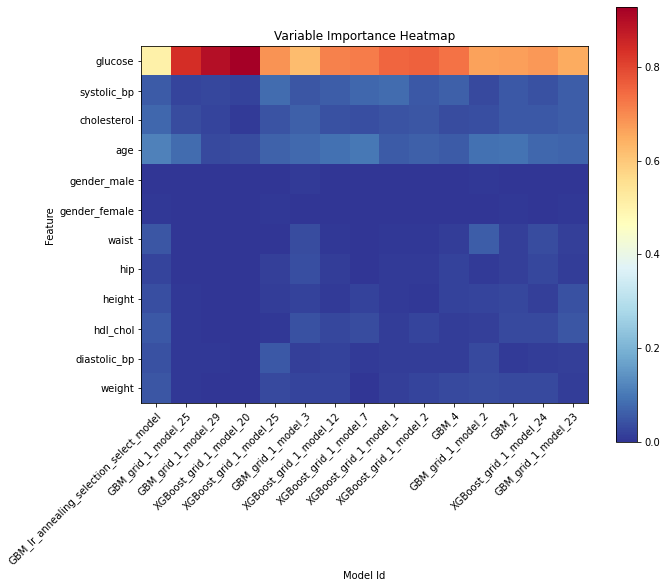

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

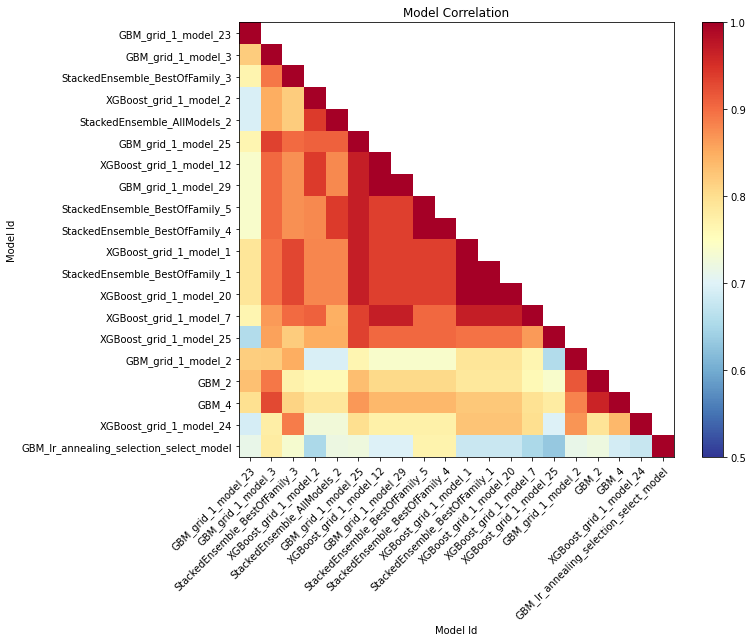

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

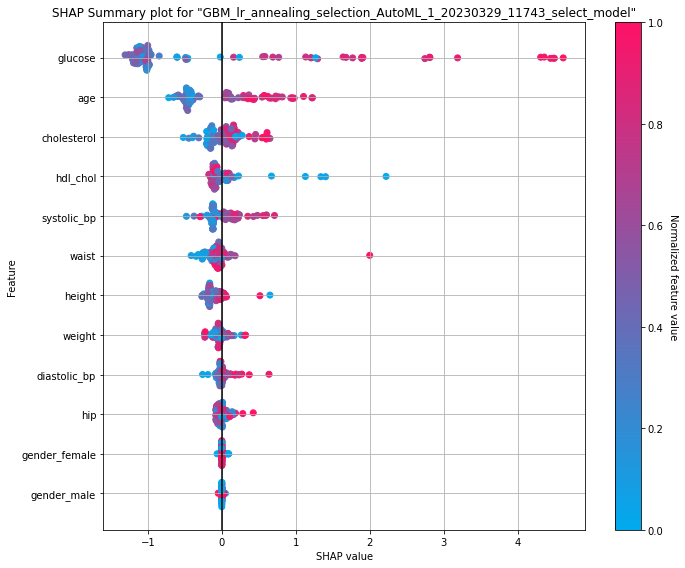

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

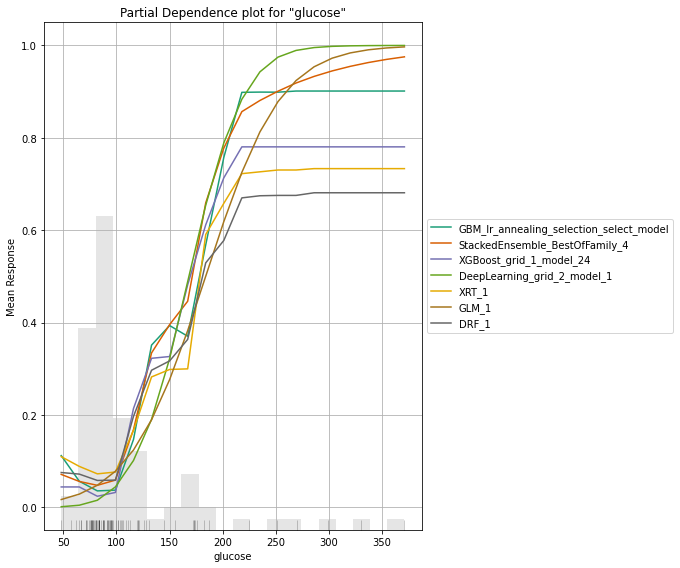

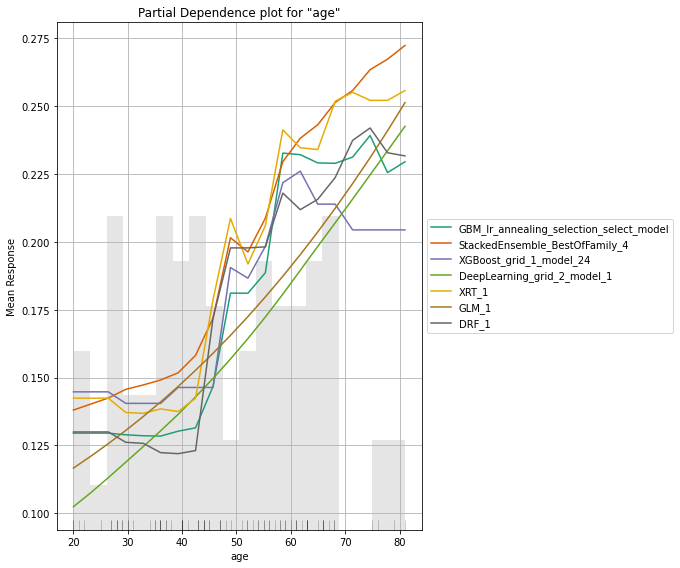

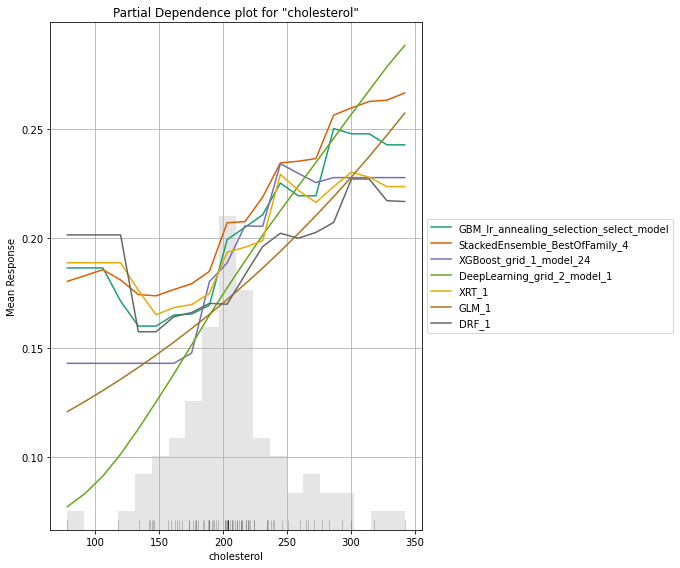

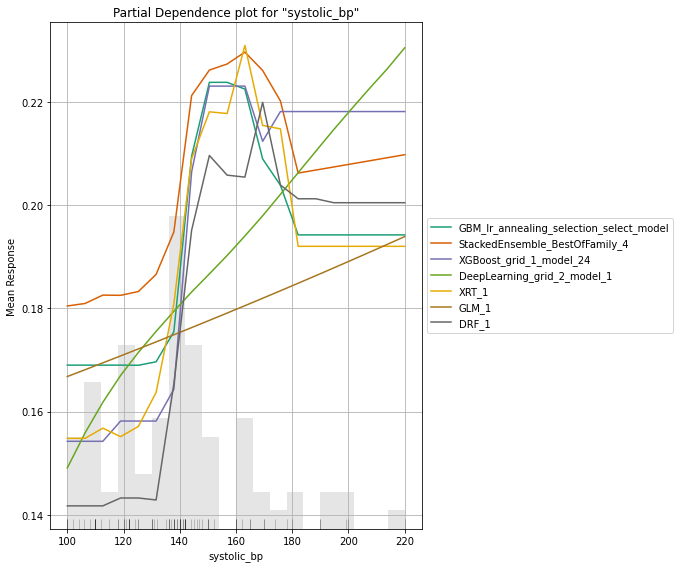

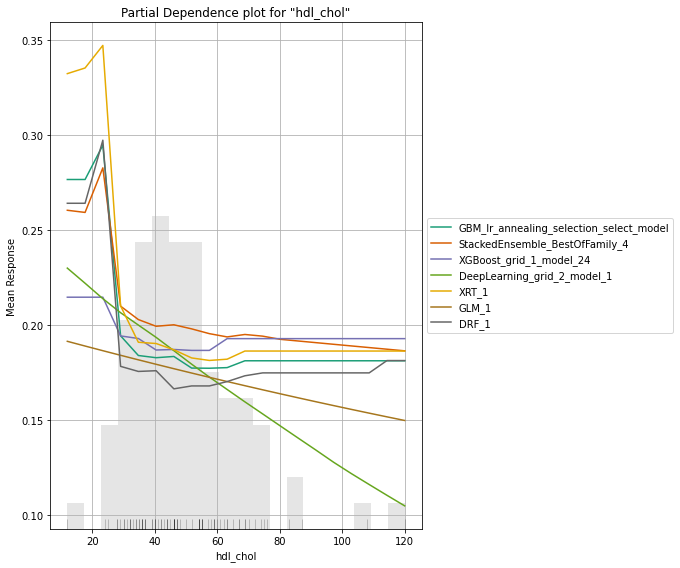

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

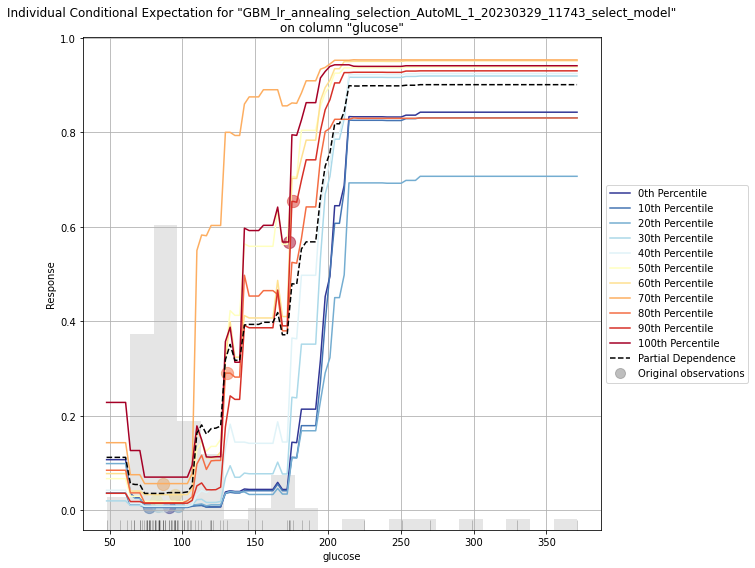

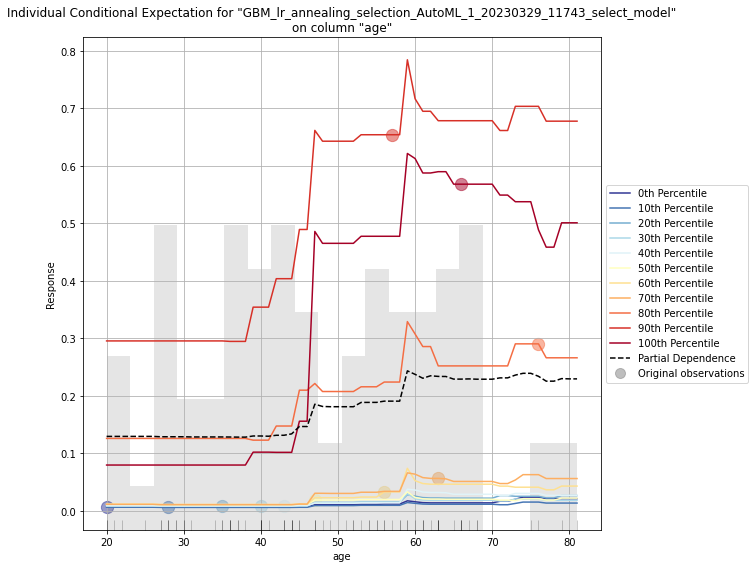

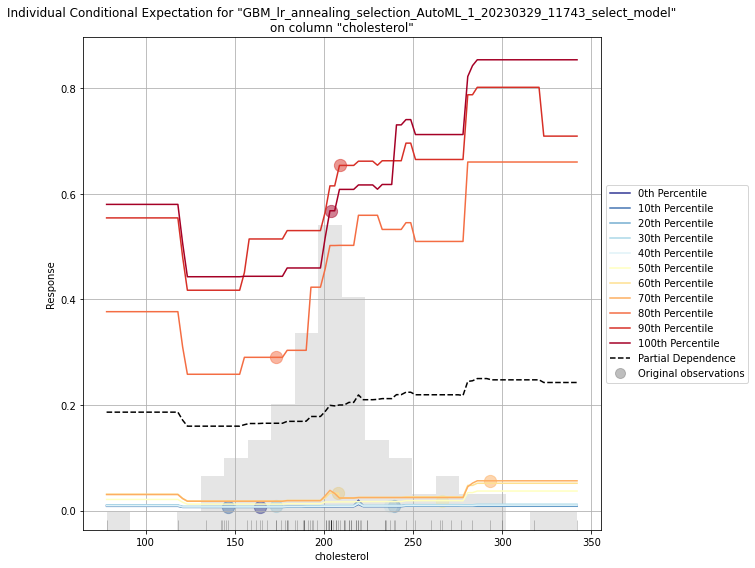

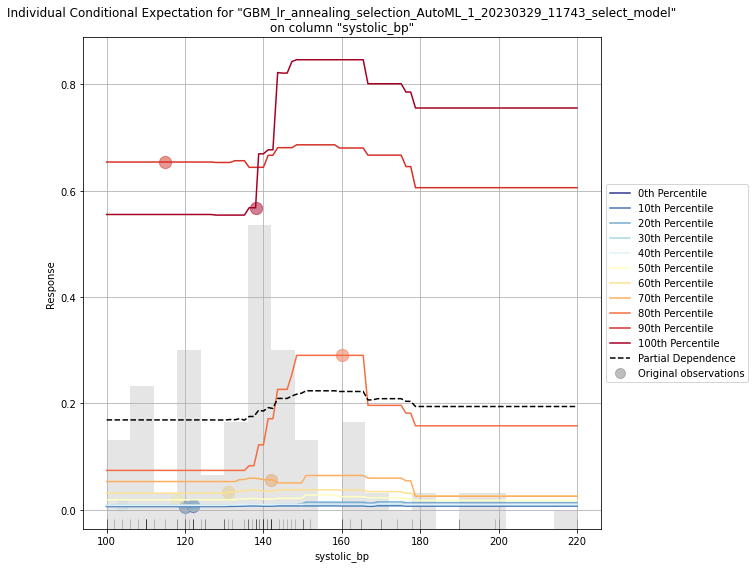

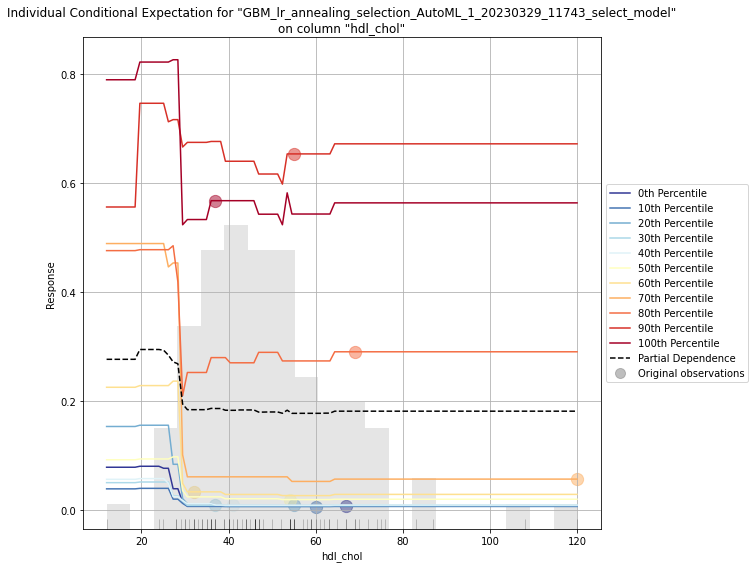

In [ ]:
explain_model = aml.explain(frame = df1_test, figsize = (10,8))

# **Interpreting Best Model from AutoML**

# Residual Analysis
Here, the residuals are visible as striped lines, which is an effect of using an integer number as the response value rather than a real value. The graph below also shows that residuals have a normal distribution. Remainders denote the absence of heteroscedasticity in the residuals.

# Variable Importance
We can see from the variable importance plot that the plot duplicates the outcomes from the aforementioned linear model and tree-based model. For clarity, the variable importance has been scaled from 0 to 1.

# SHAP Summary
From the SHAP summary diagram, we can interpret a few conclusions -

Glucose is the most significant component, followed by Cholestrol, and so on. The other factors are given according to their significance in generating the forecast. Gender is therefore the least important predictor in our model.

The feature's influence on the prediction, whether positive or negative, is shown by its location on the SHAP value axis. In other words, the impact of a data point increases with the distance between it and the shap value of 0.0. As we can see, glucose has the greatest influence in the prediction of diabetes. The dot's color denotes the influence of the value on the outcome (Red - High, Blue - Low). For example, a patient with a high glucose content will be diabetic.

# Partial Dependence Plot(PDP)

The marginal impact of a feature on the target is depicted by a partial dependence graphic (prediction of diabetes in our dataset). It is accomplished by maintaining the values of all other variables constant while modifying one variable's value to determine its PDP.

For Interpretation purposes, let us pick up the two most important variables - Glucose and Cholestrol.

1. The mean reaction increases glucose levels, as can be seen when the other variables are held constant and the glucose level is marginally changed. This could be taken to mean that the diabetes may depend on the glucose in this range. 
2. In a similar way, we can see the mean response of increasing between the cholesterol range when the other variables are held constant and a little adjustment in cholesterol is made. So, it can be inferred that this range determines the prediction of diabetes.

It is simple to calculate partial dependence plots: If we compel all data points to assume a certain feature value, the partial dependence function at that feature value represents the average prediction.

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

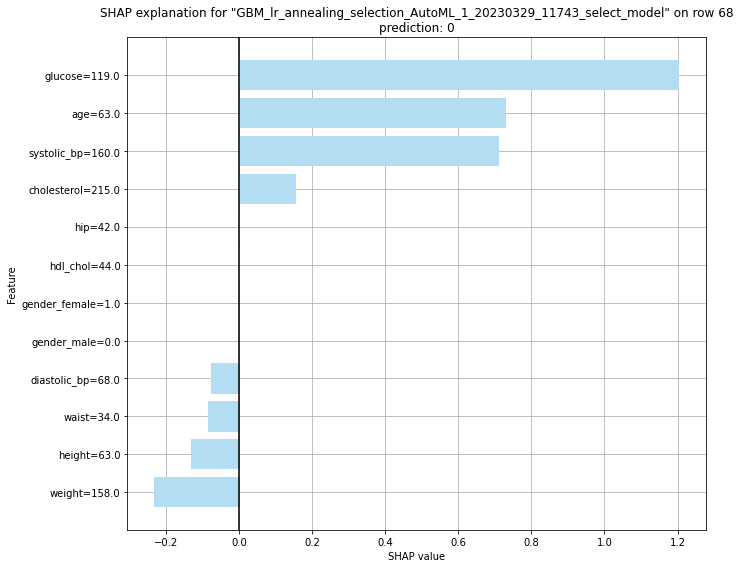

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = df1_test, row_index = 68, figsize = (10,8), exclude_explanations = "leaderboard")

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

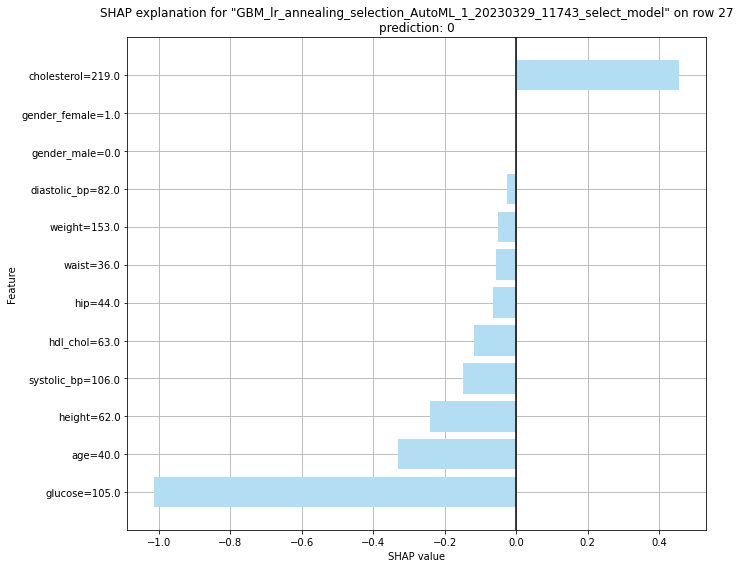

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = df1_test, row_index = 27, figsize = (10,8), exclude_explanations = "leaderboard")

In [ ]:
#Training the dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=0, shuffle=False)

Permutation explainer: 352it [00:35,  8.58it/s]


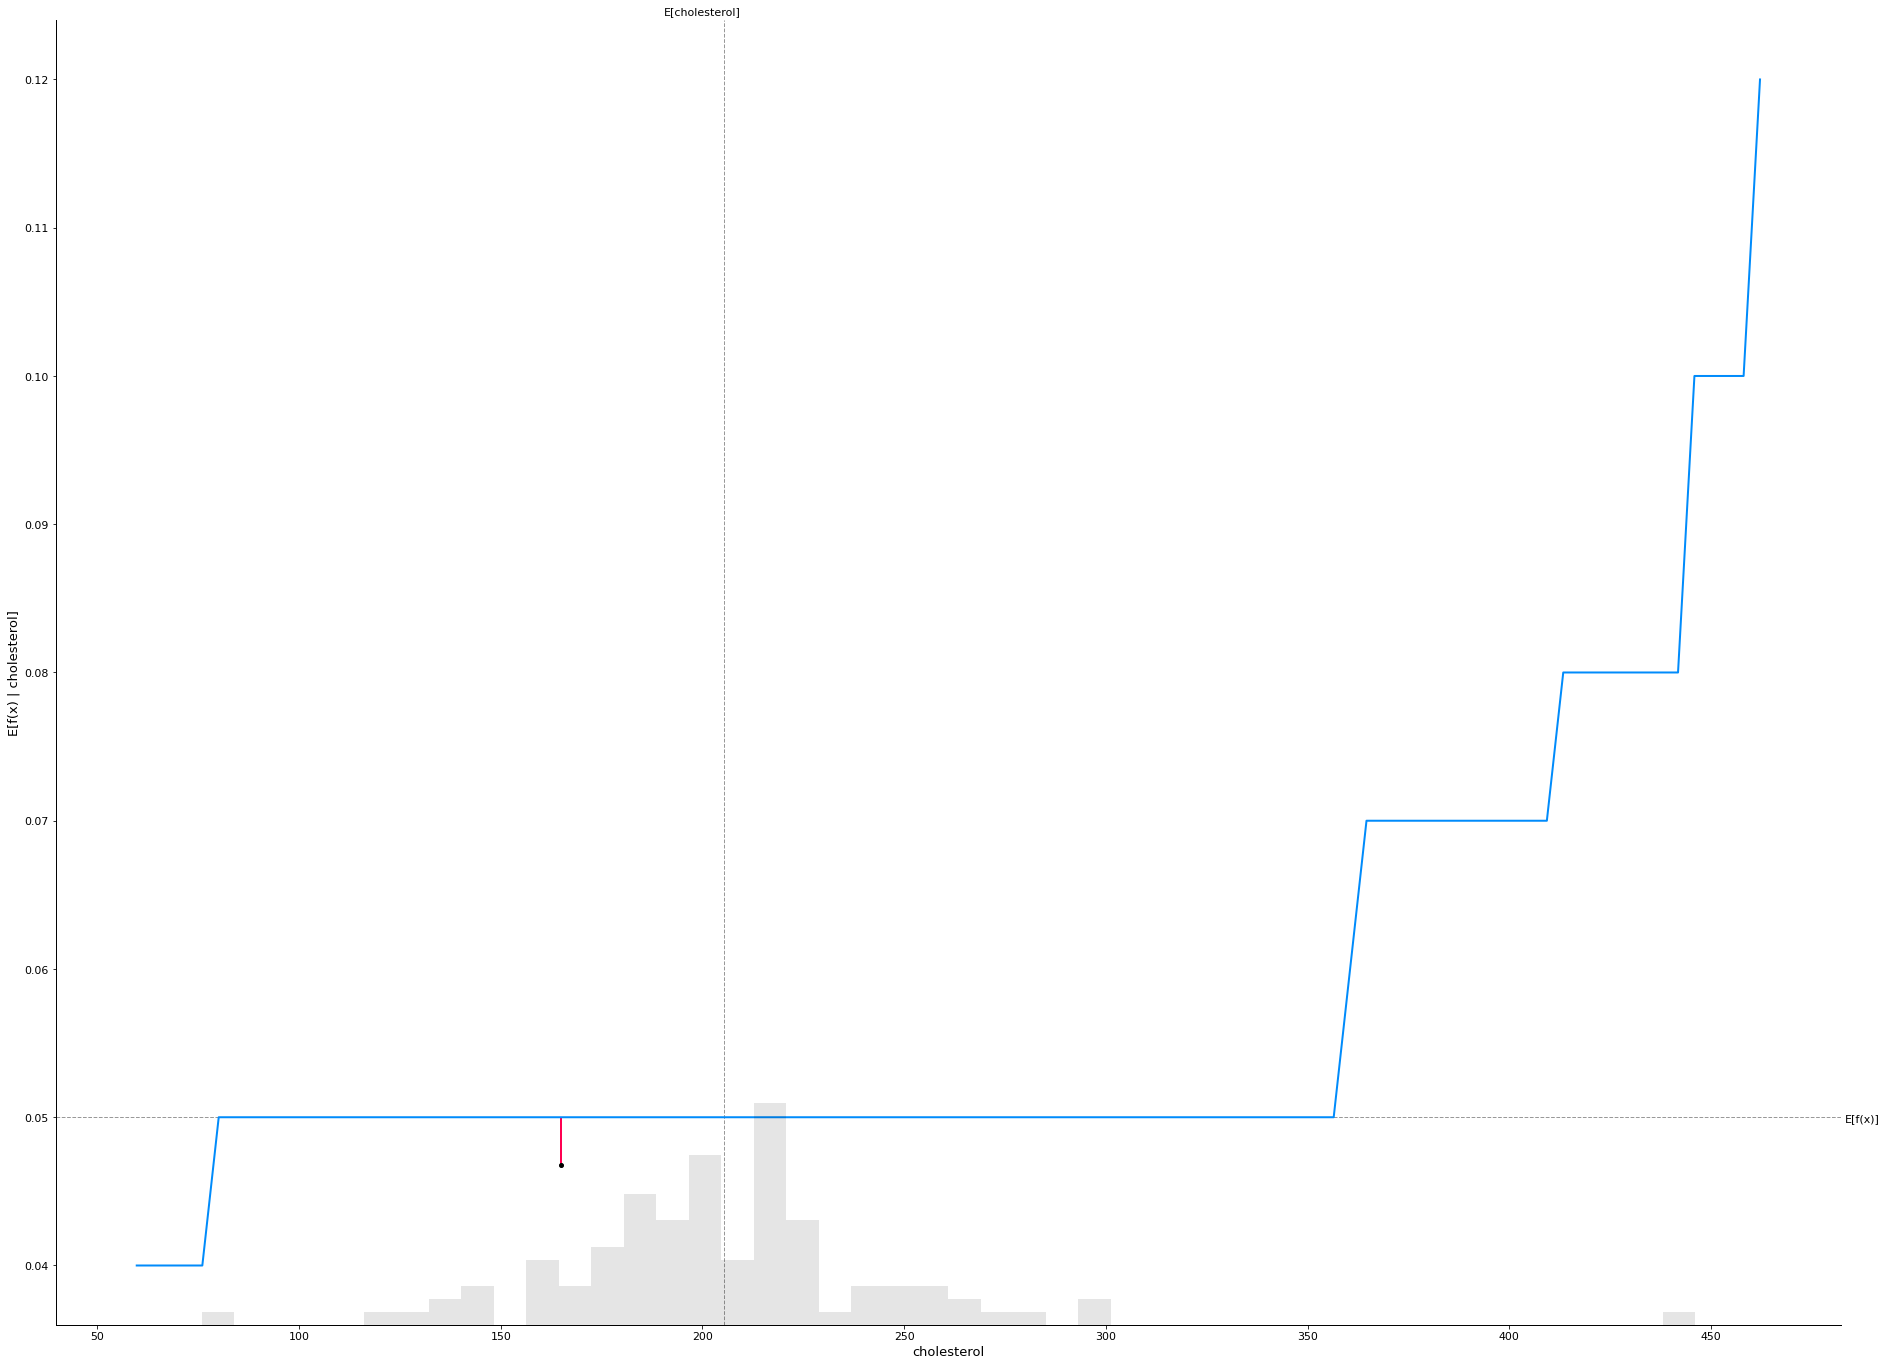

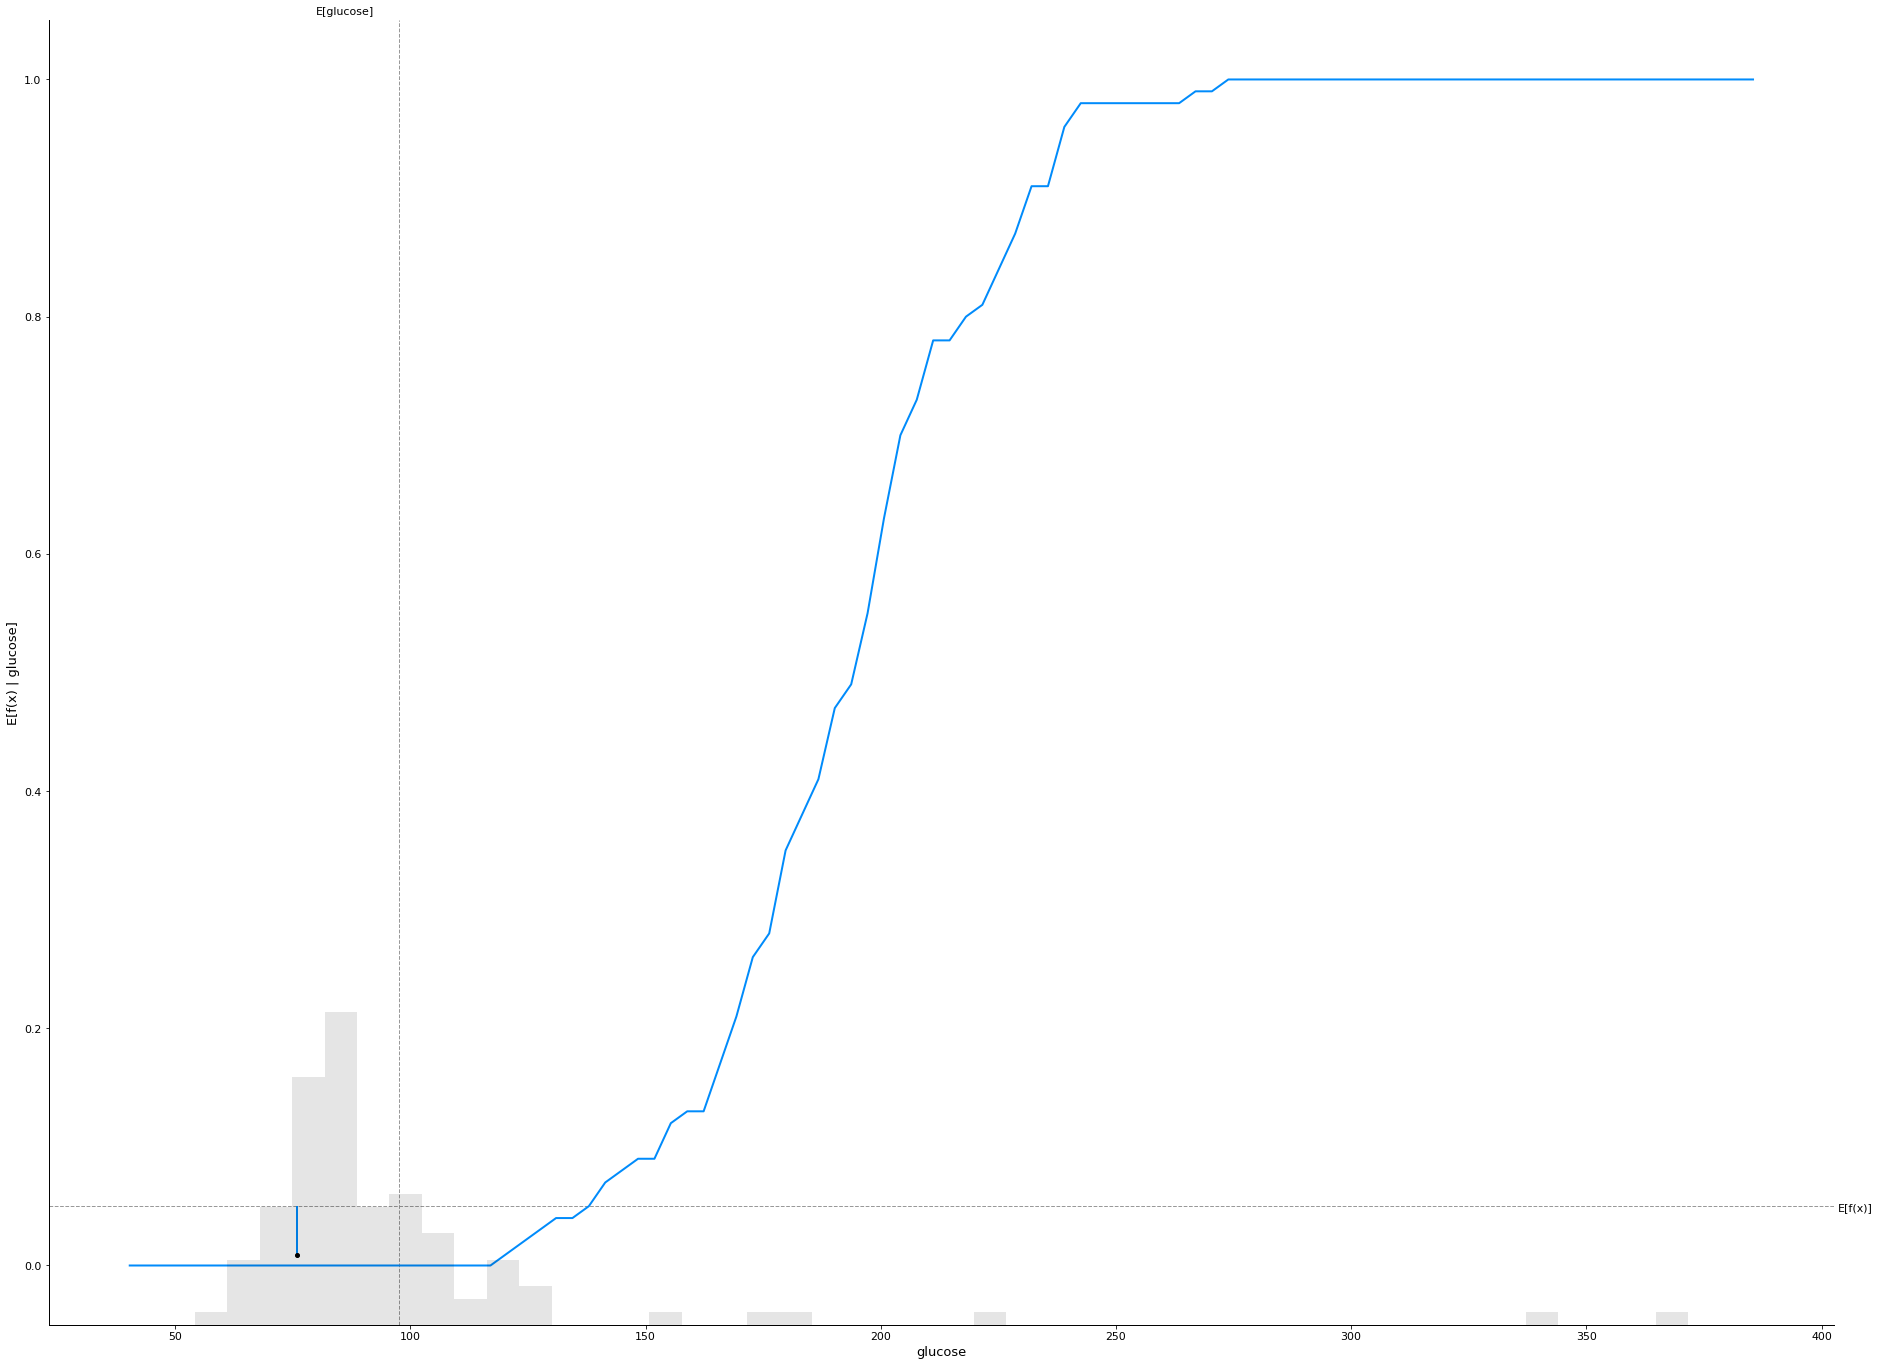

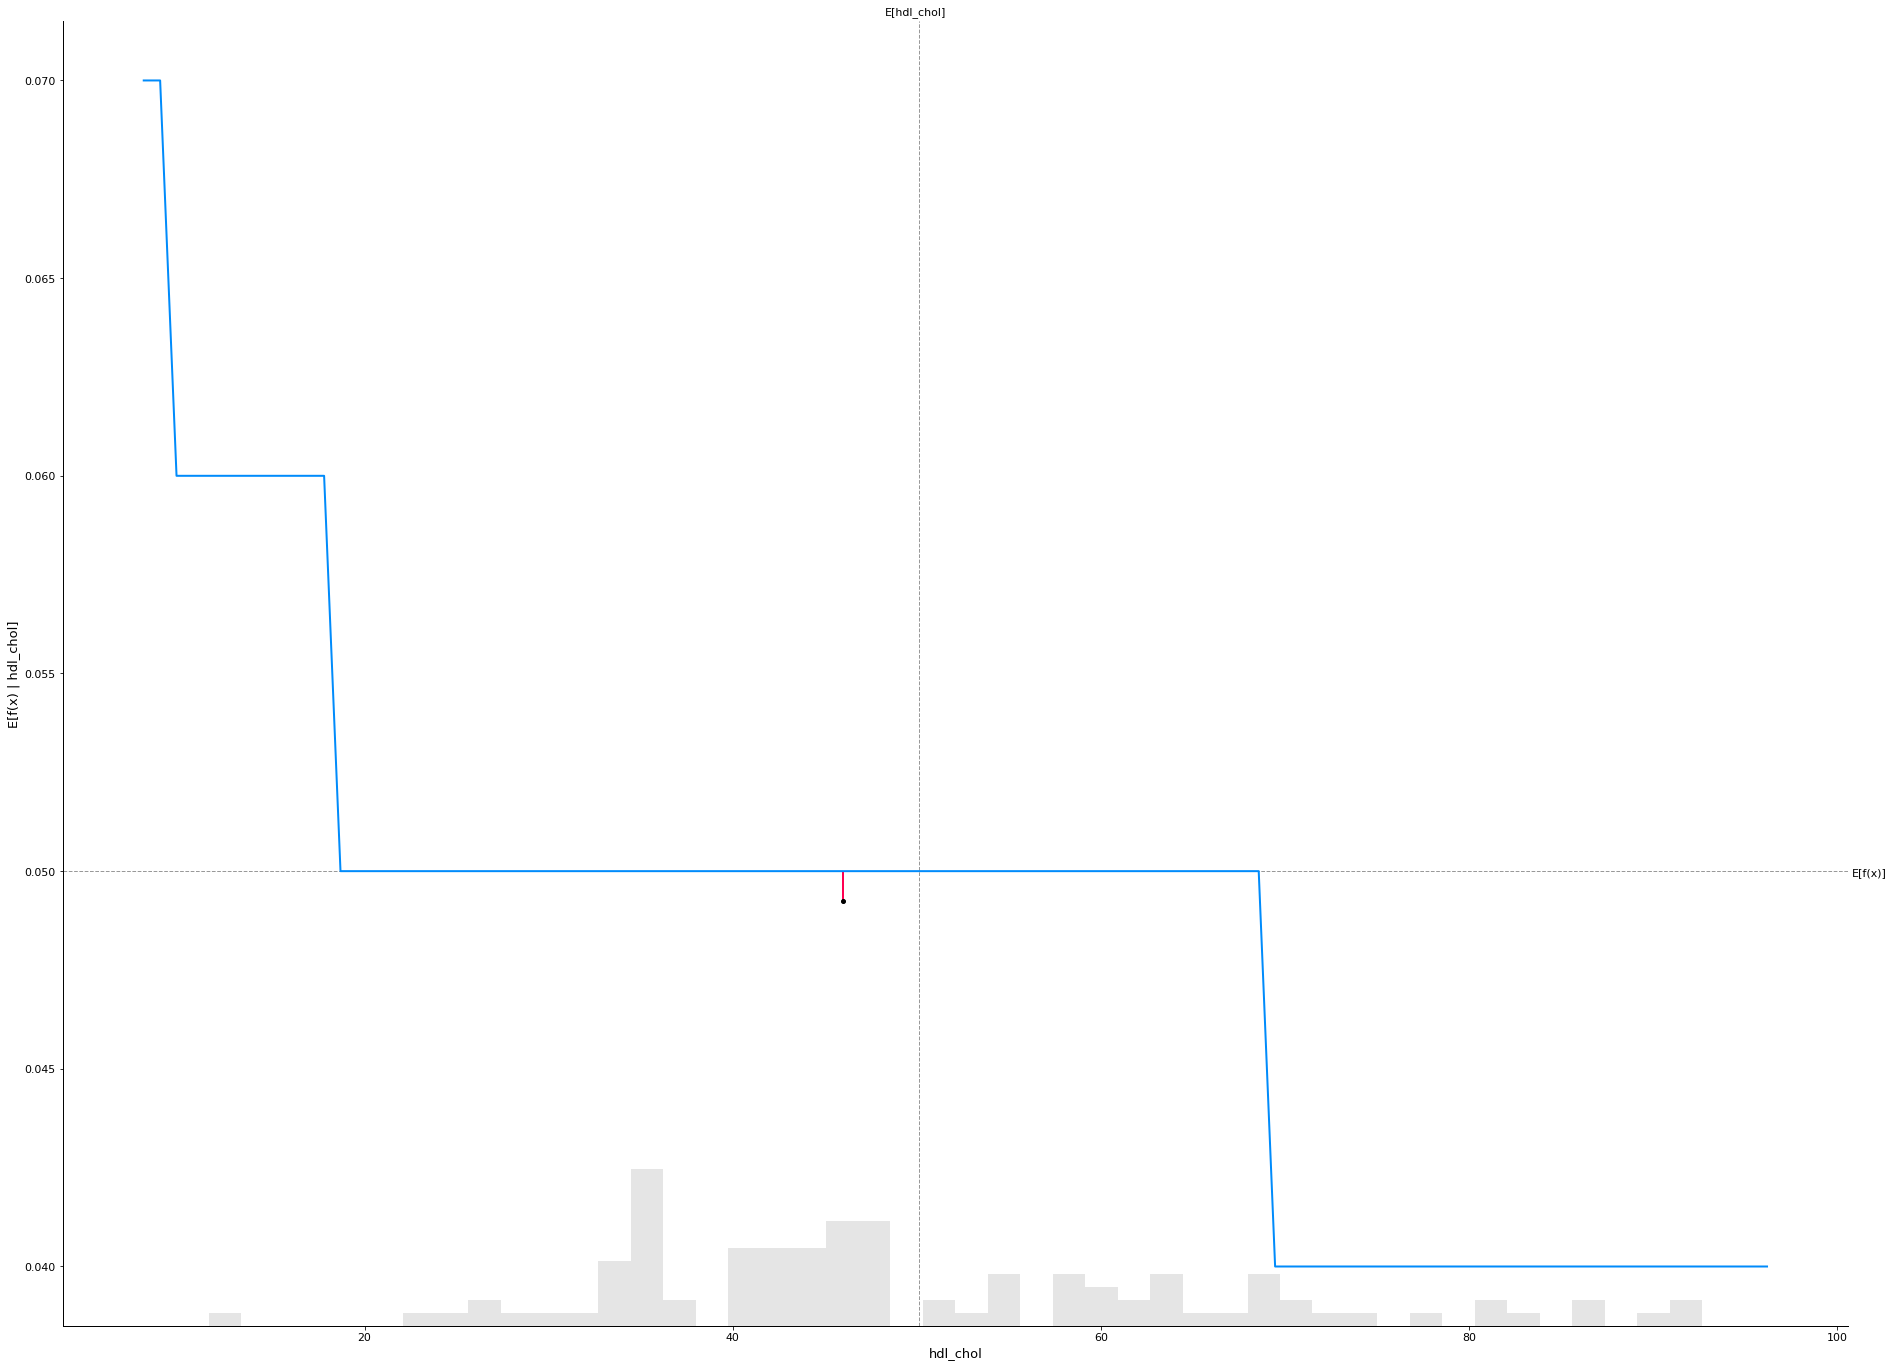

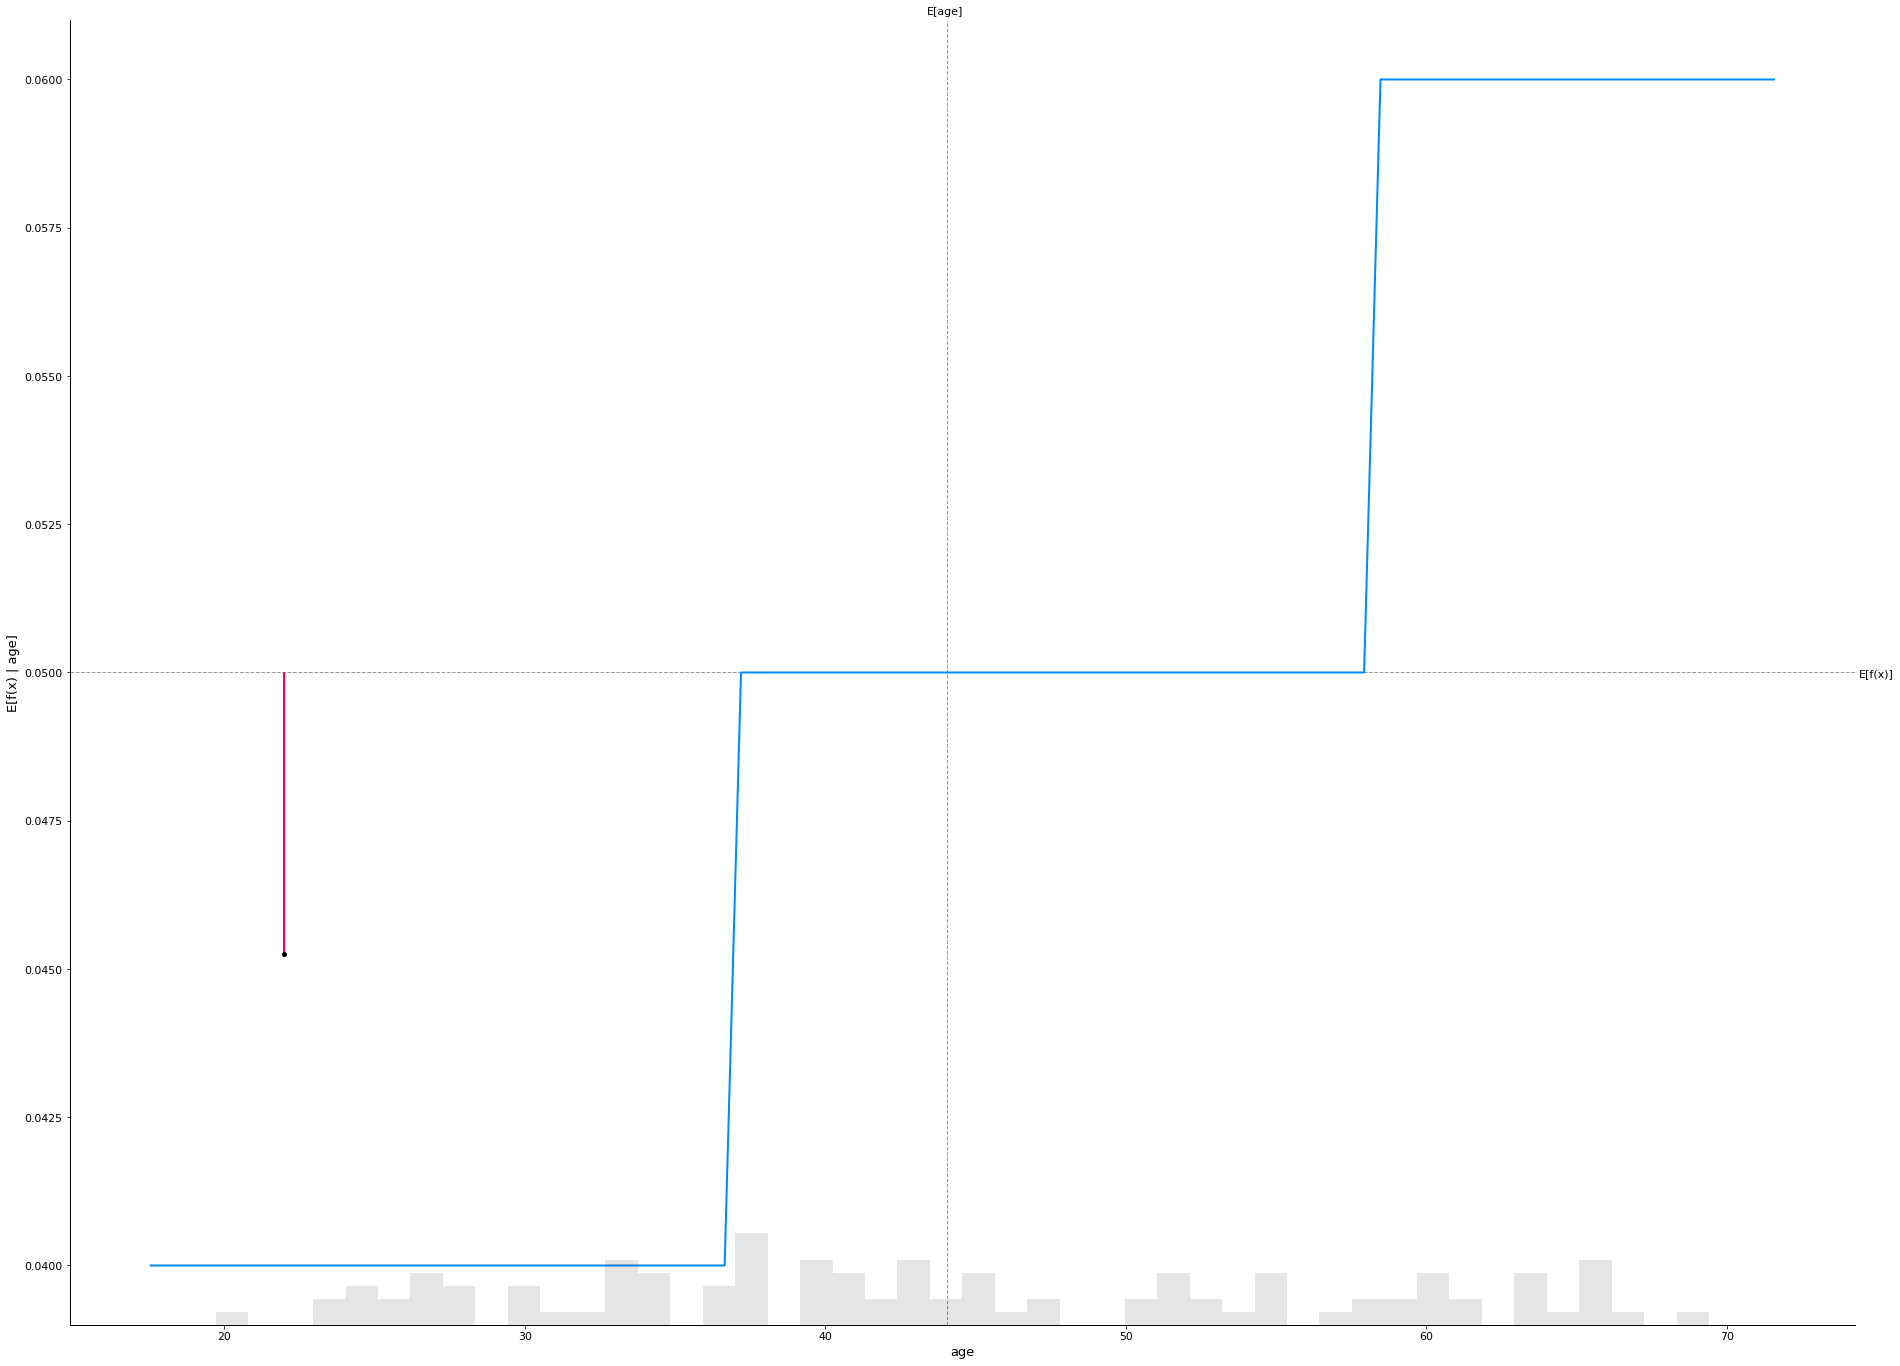

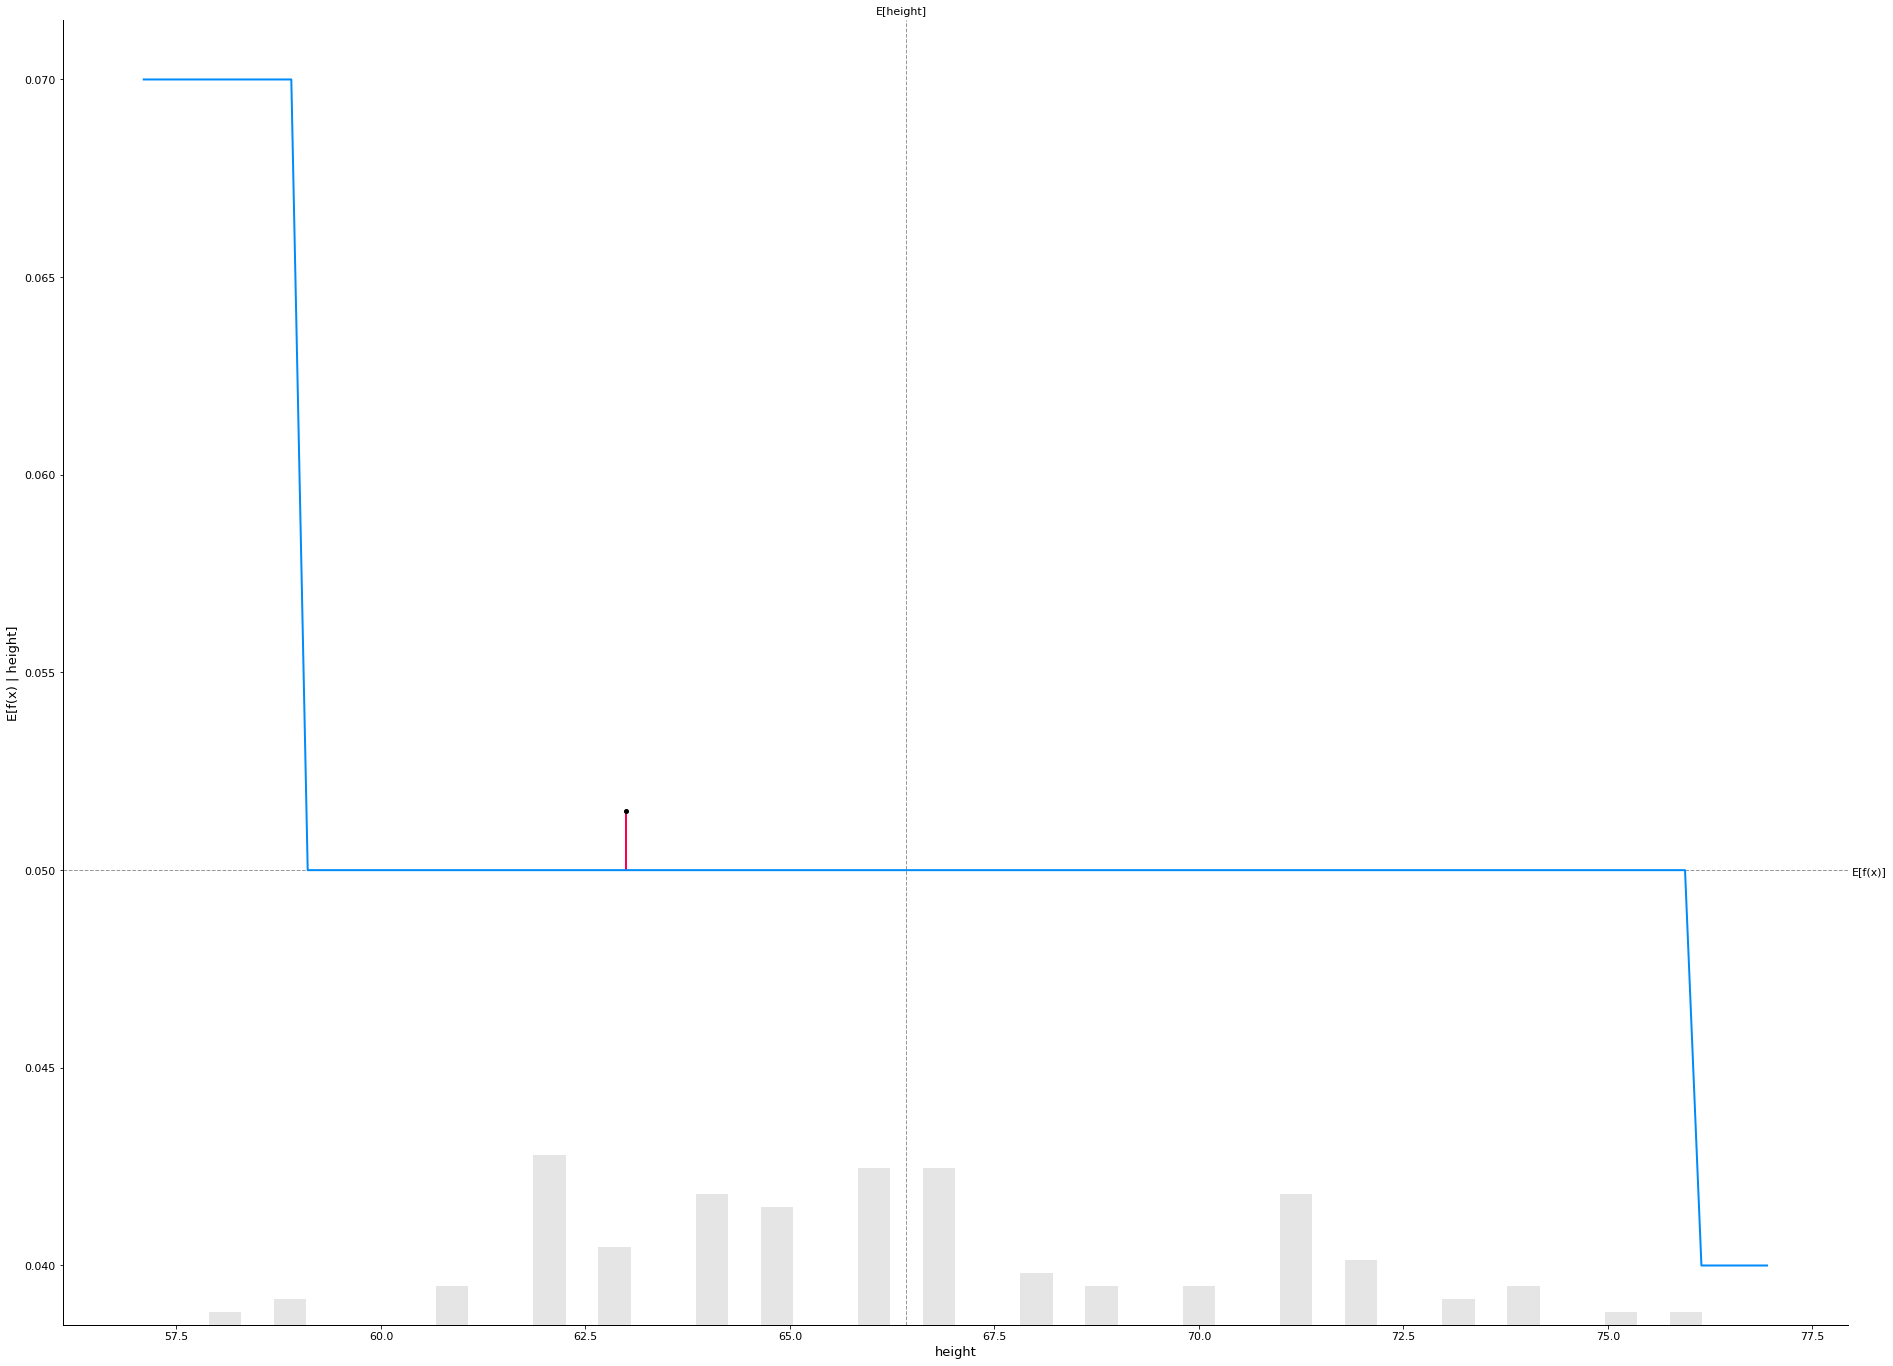

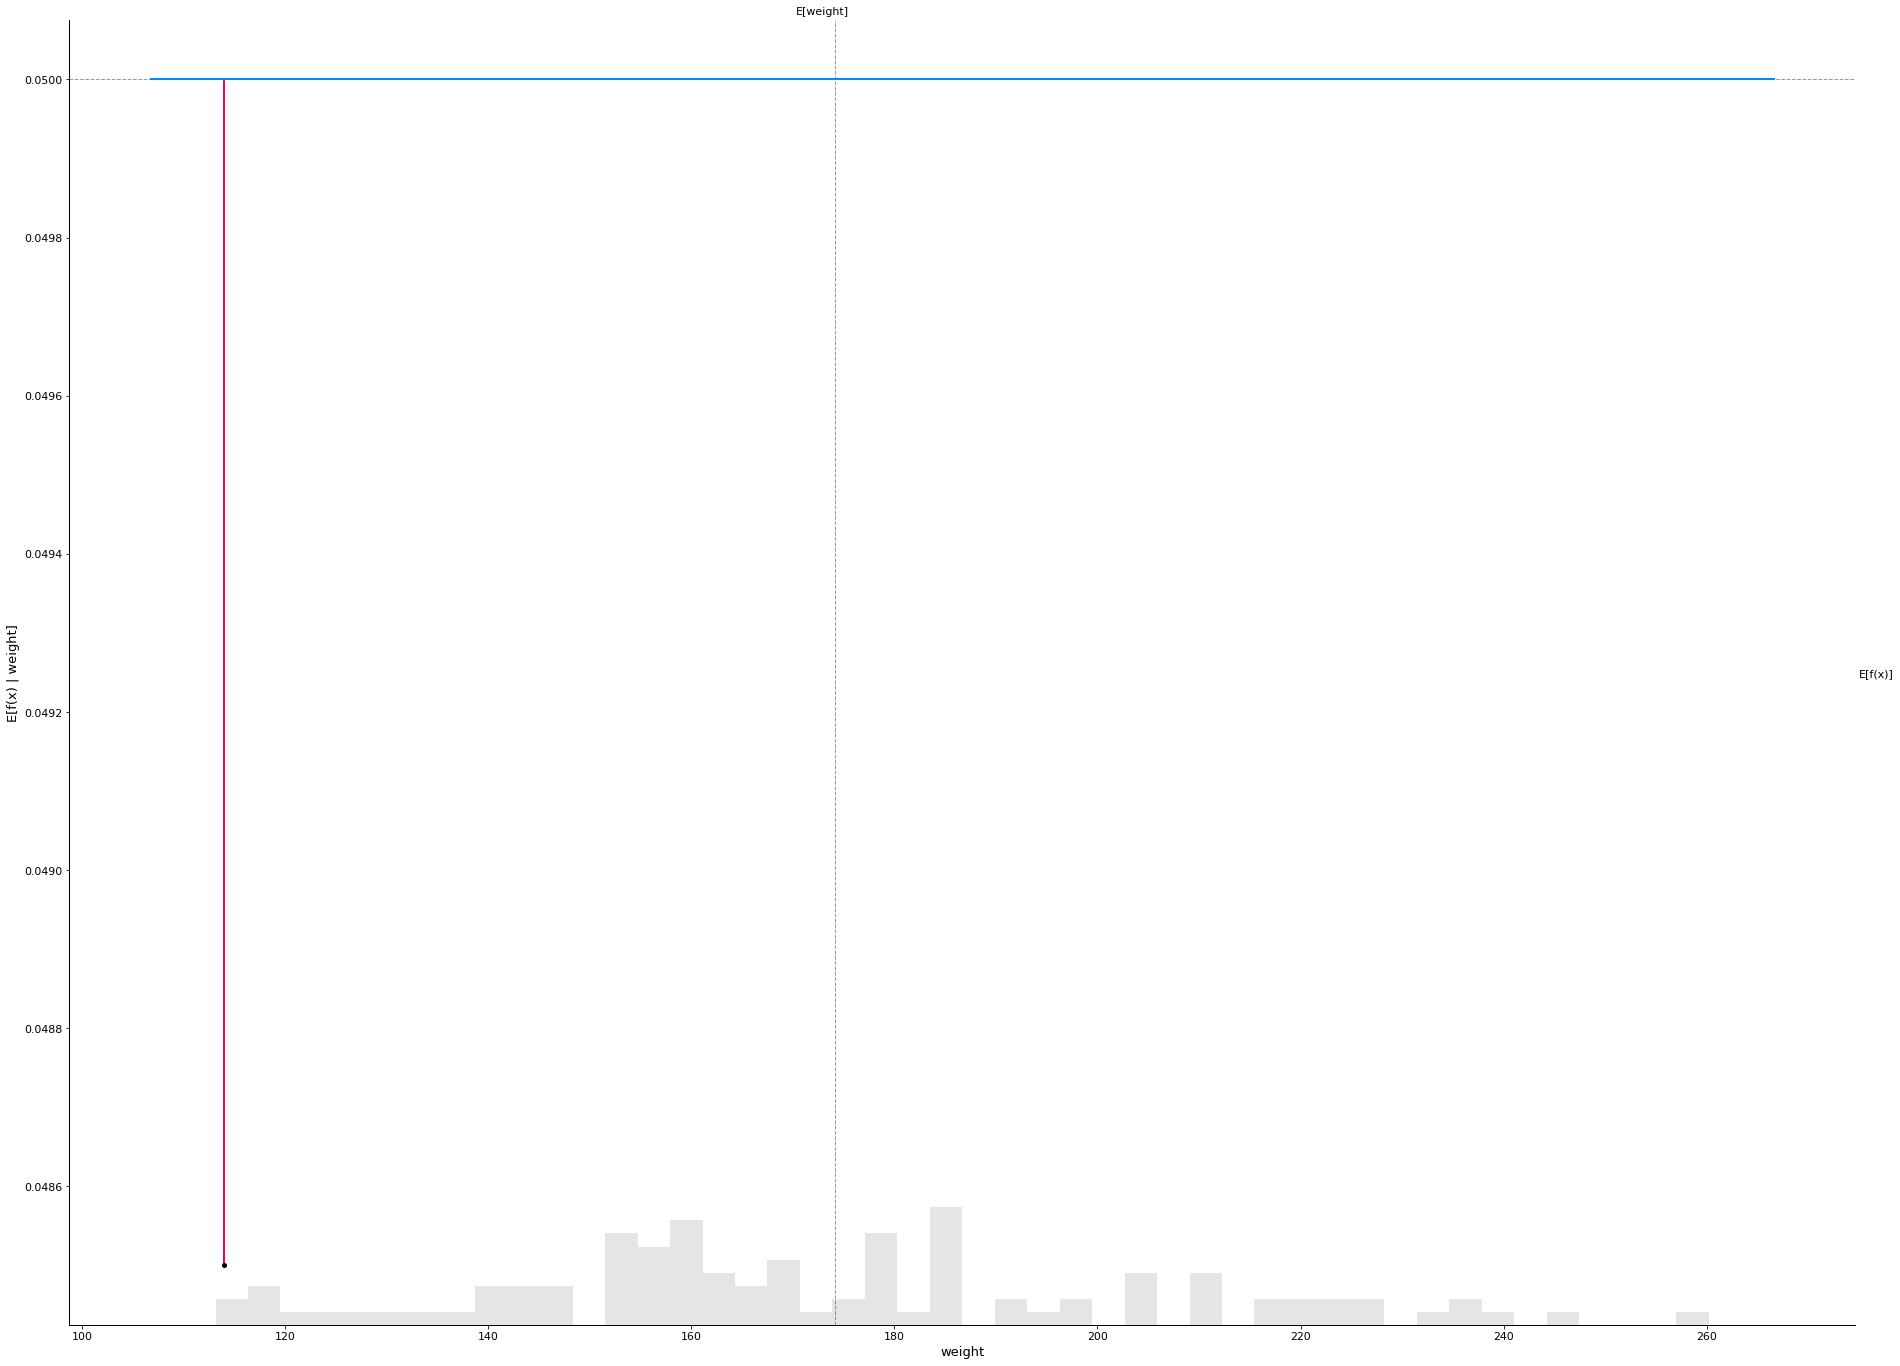

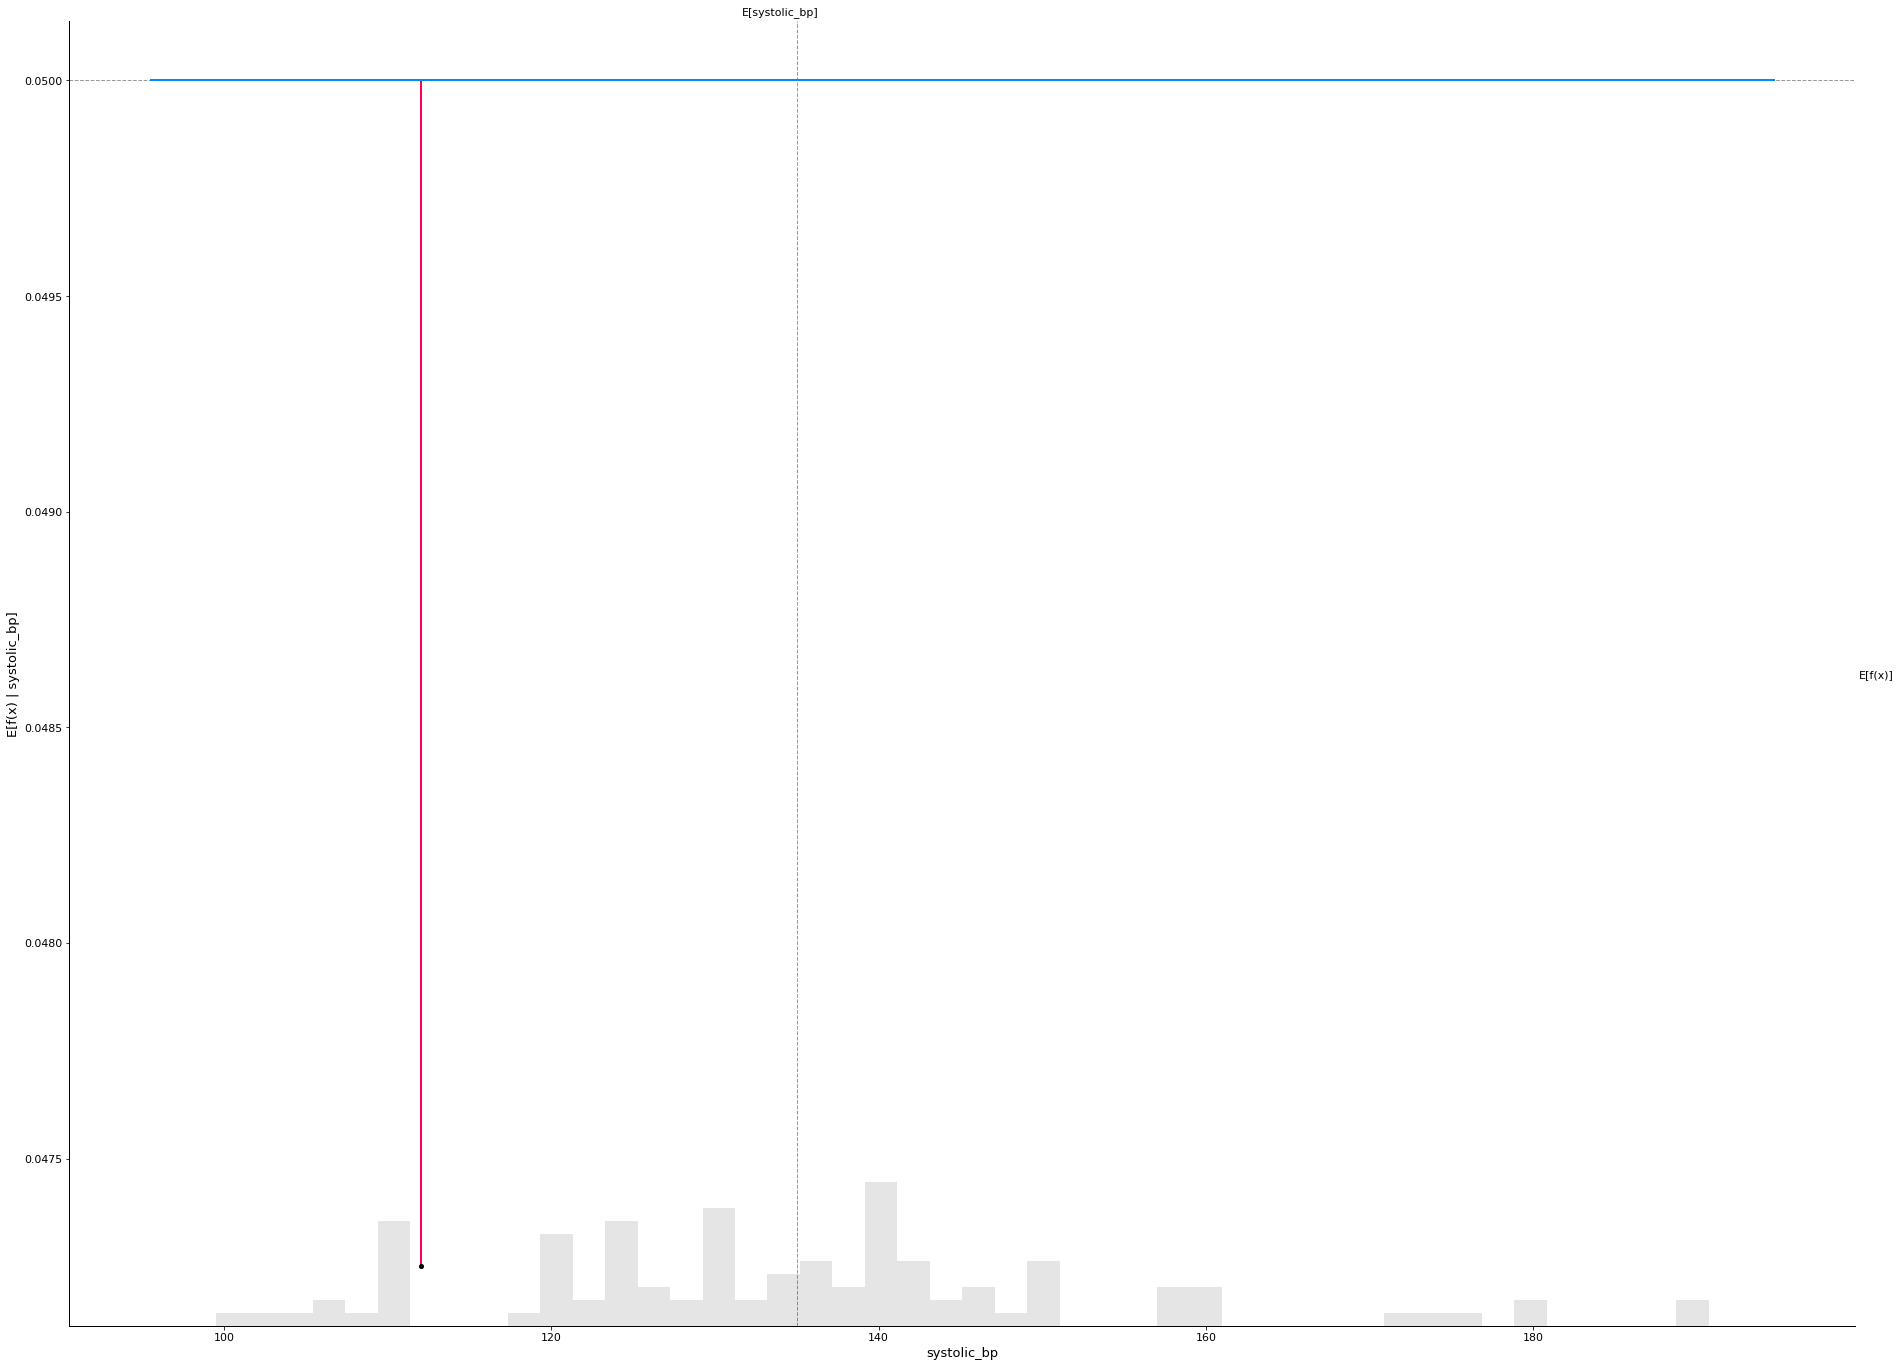

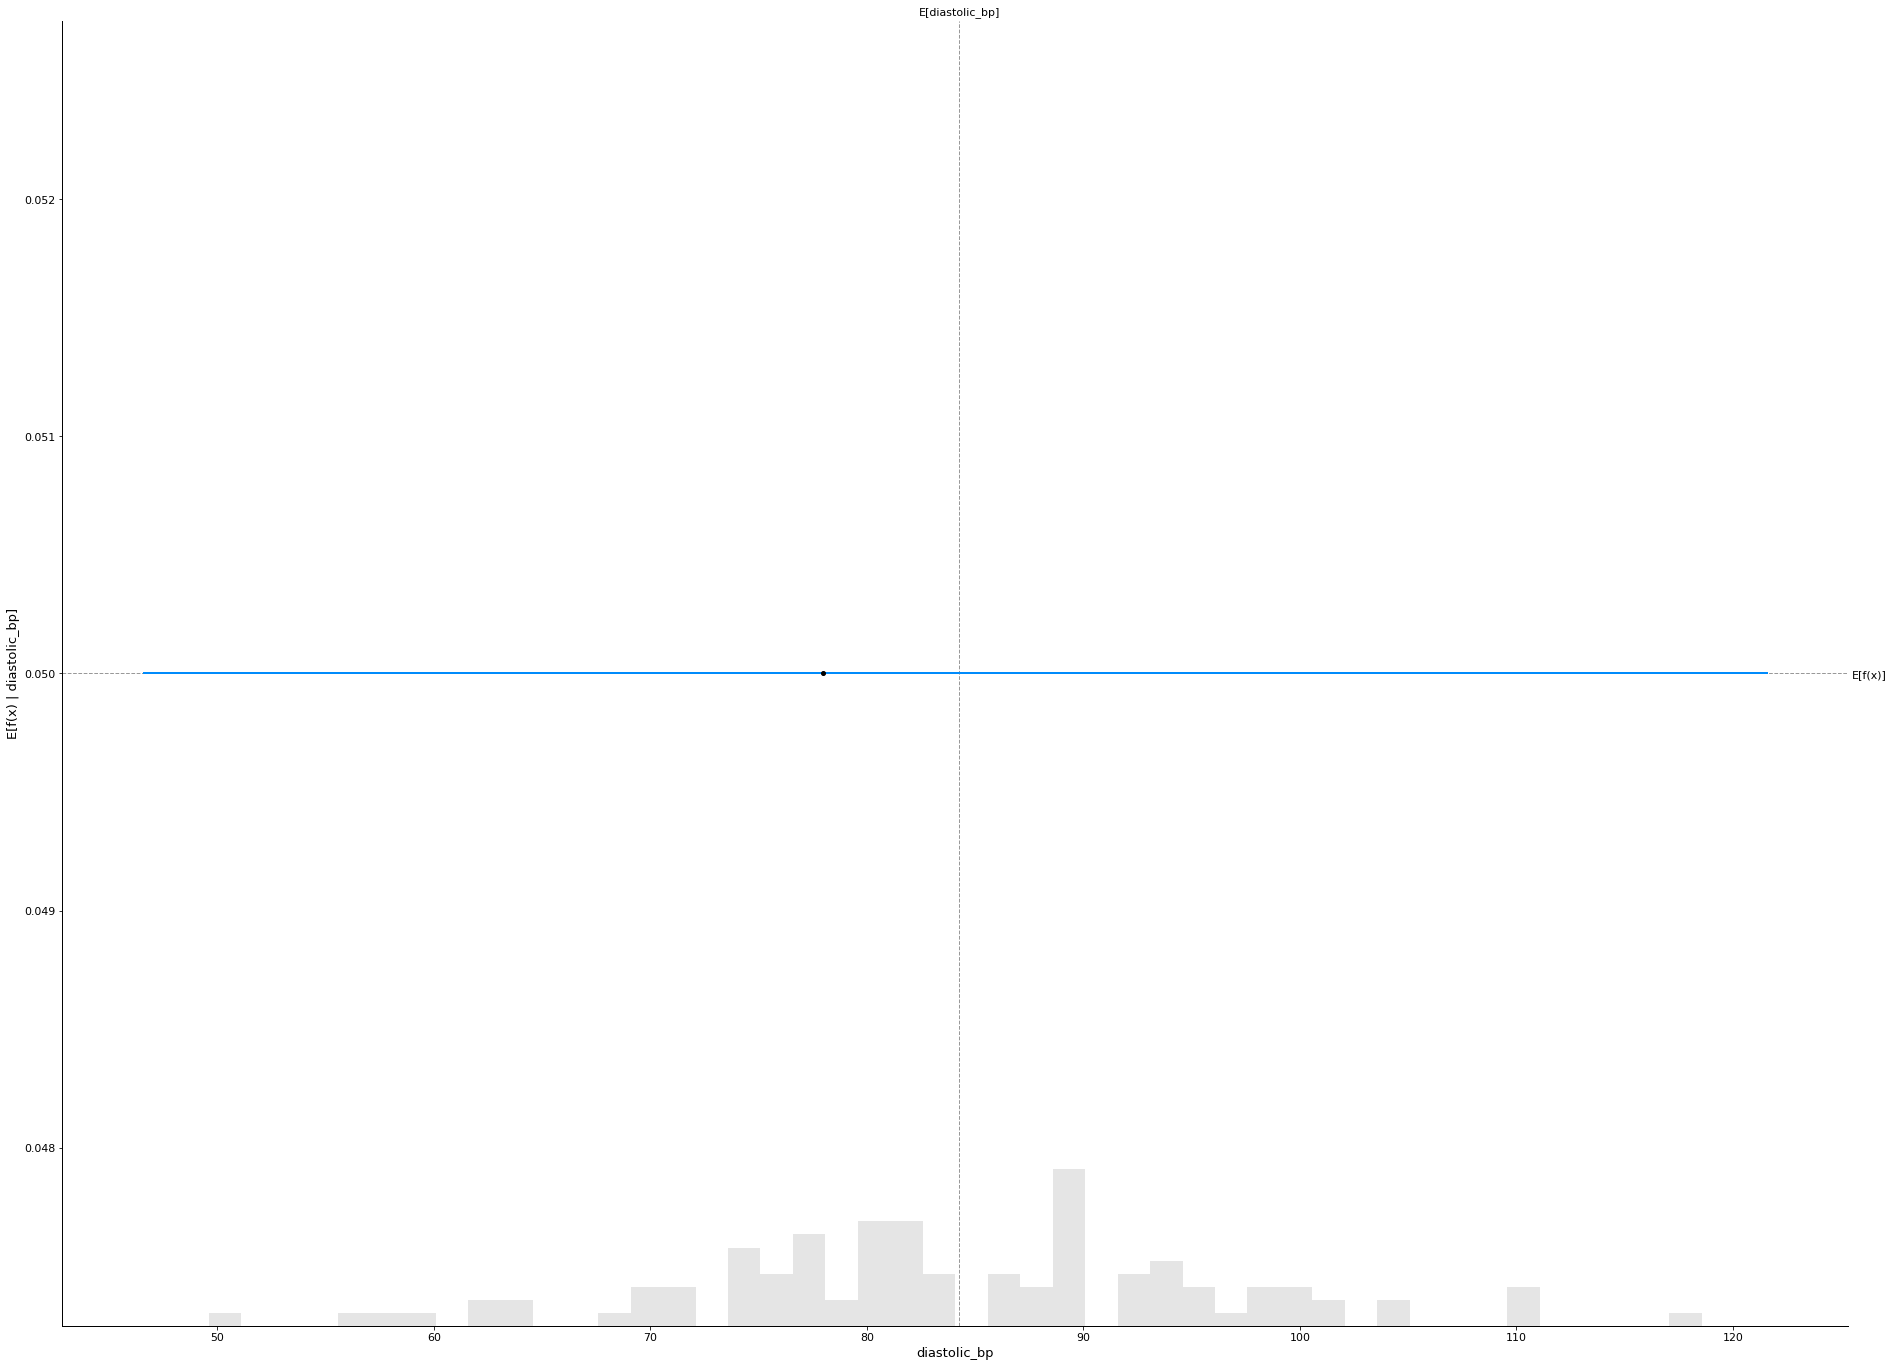

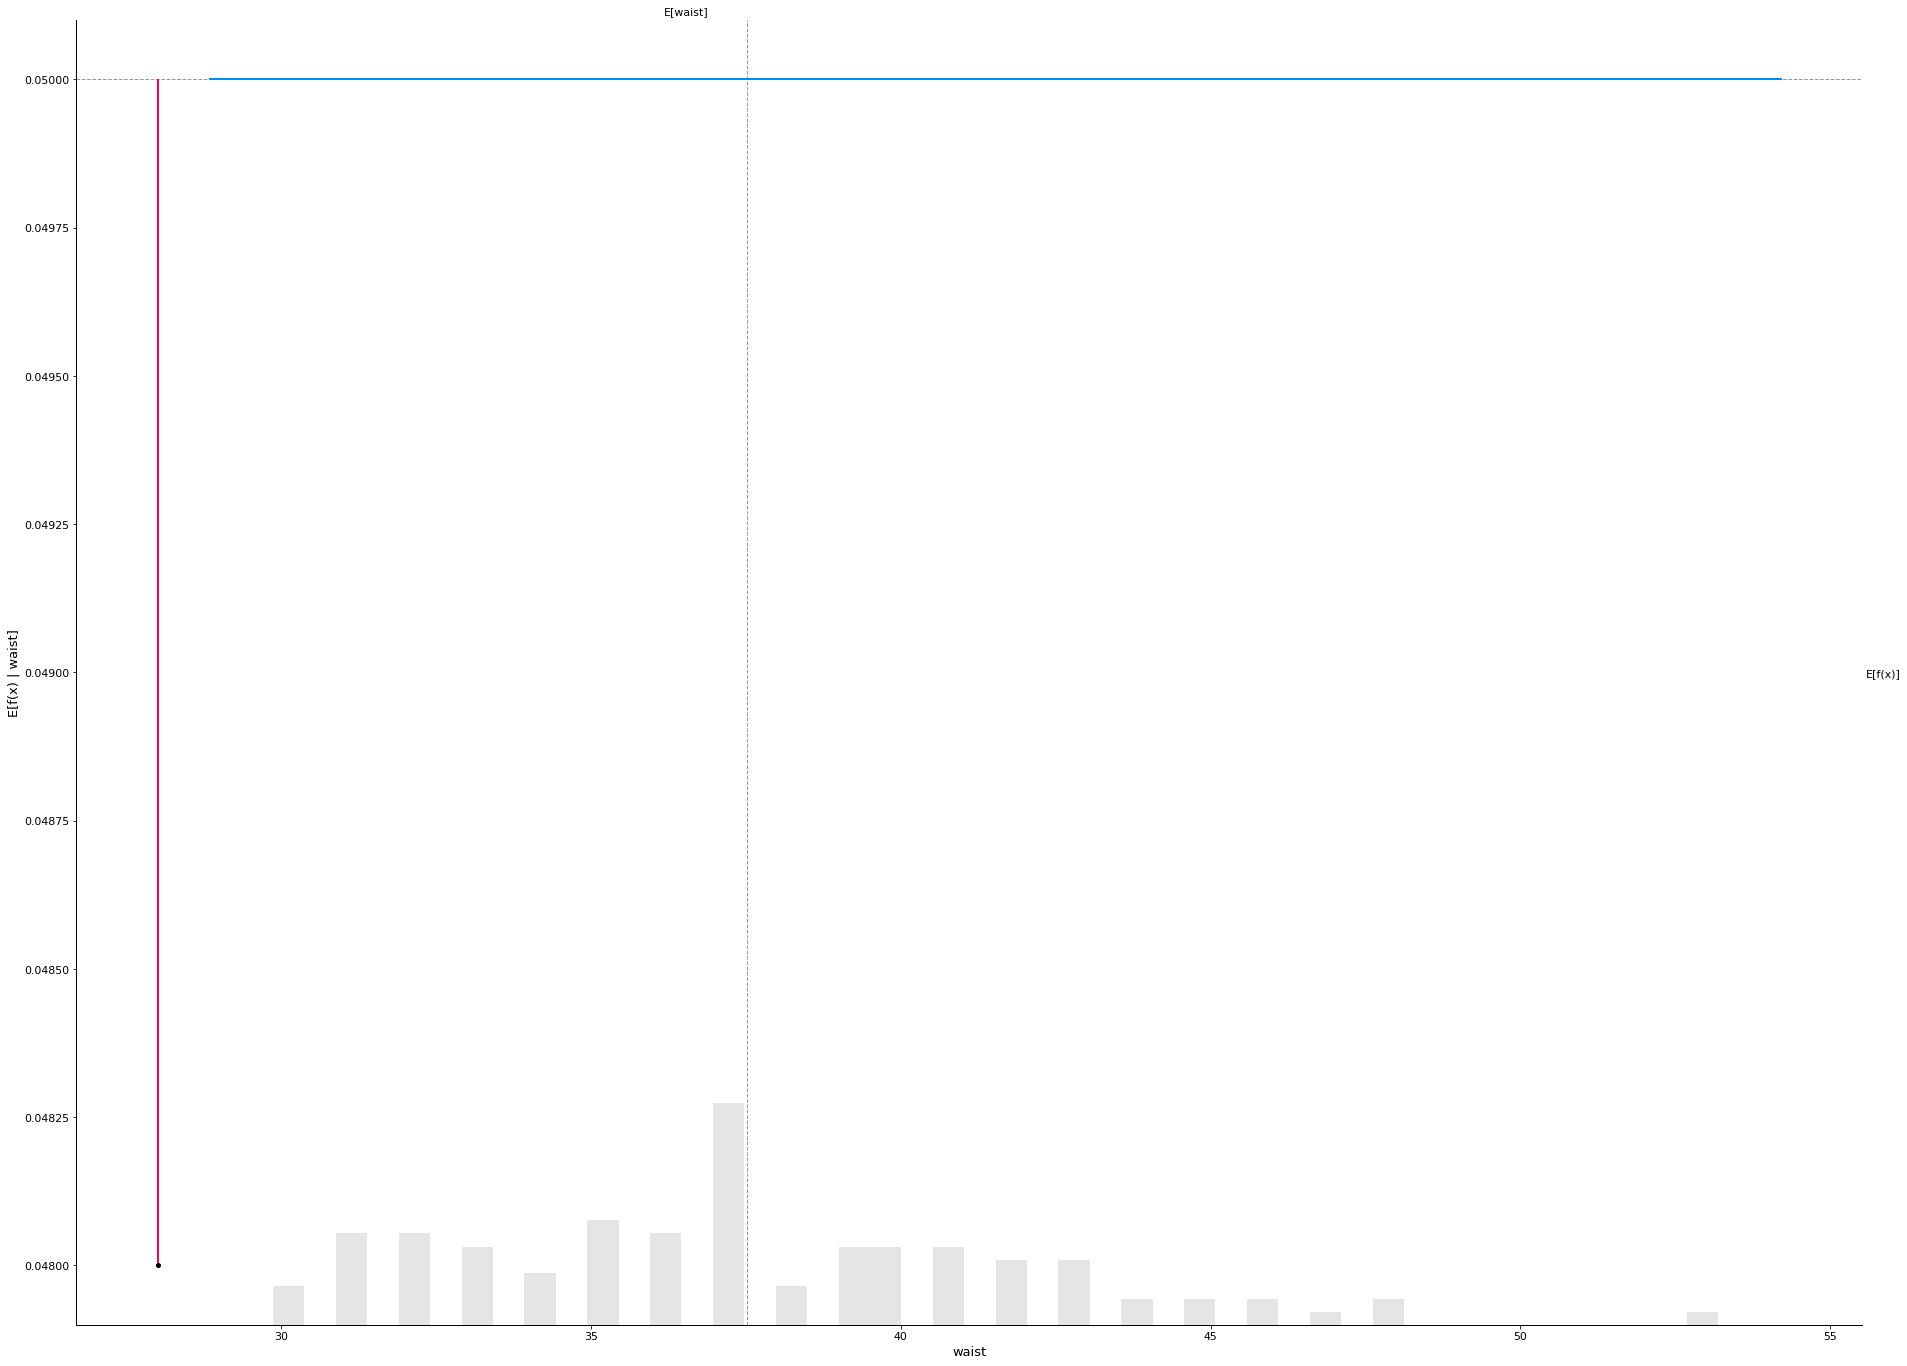

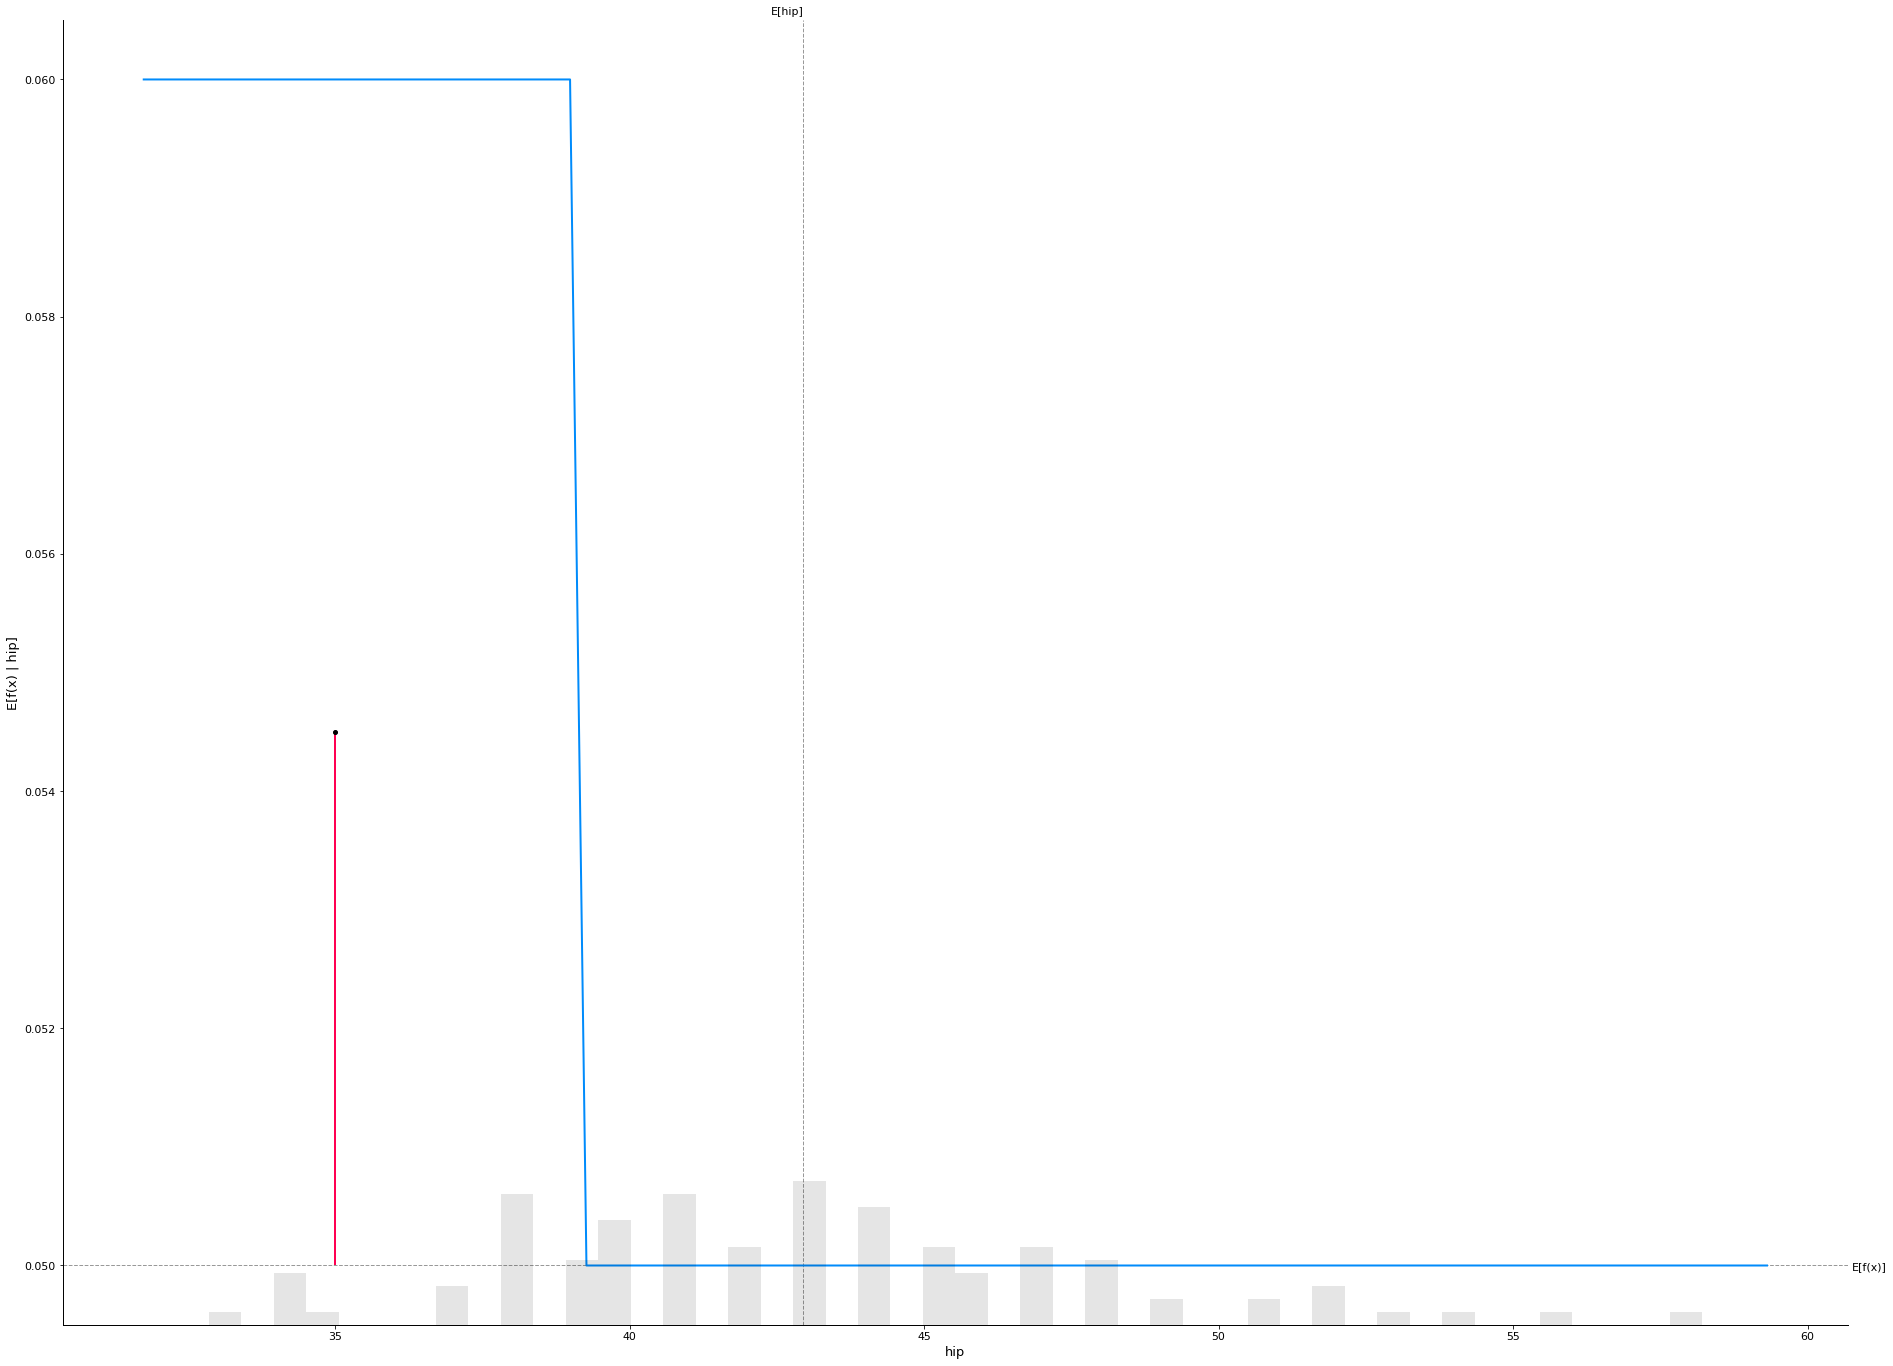

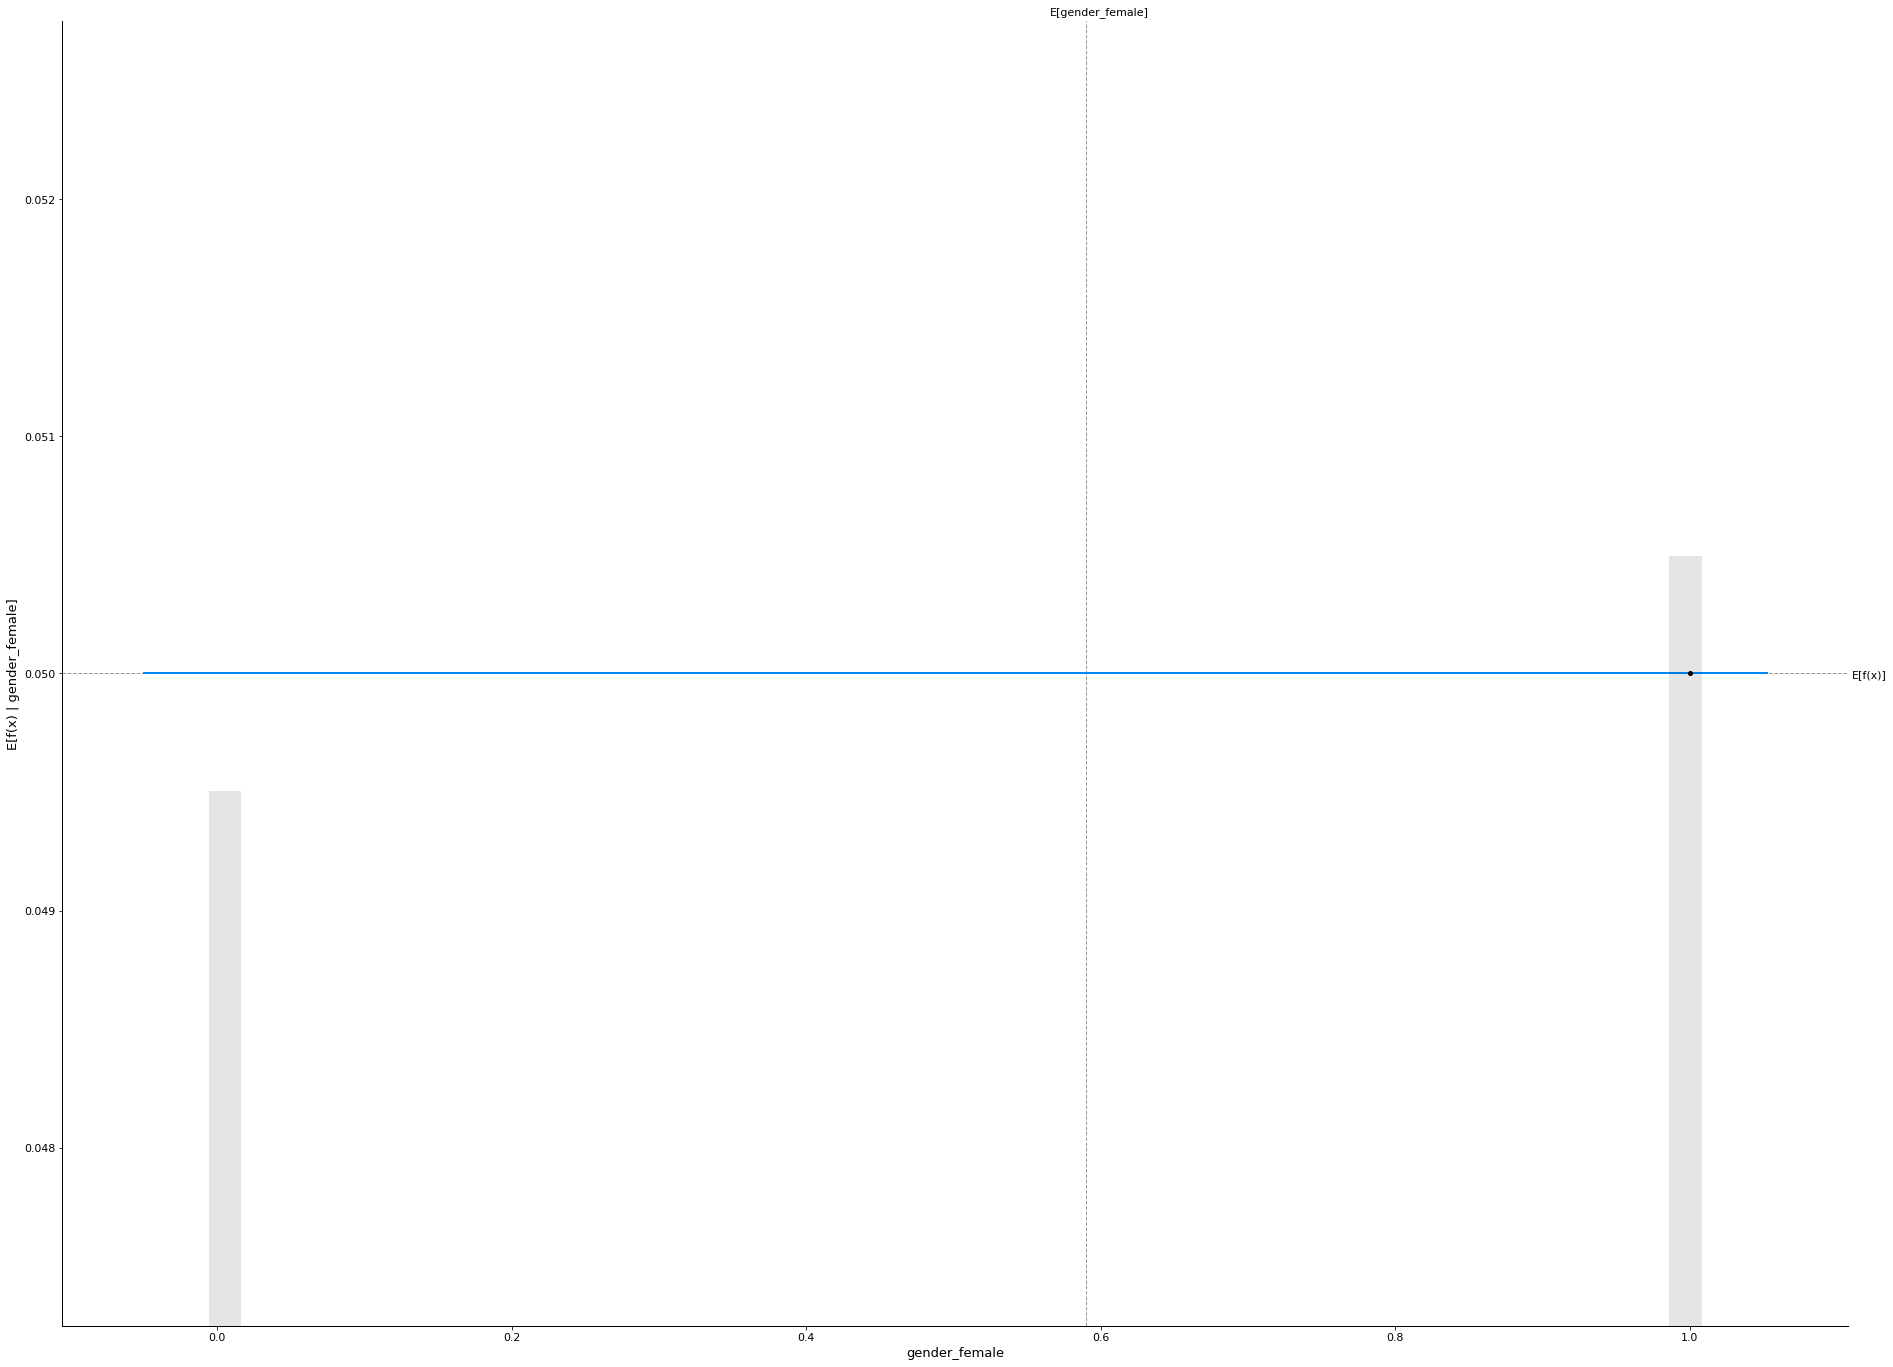

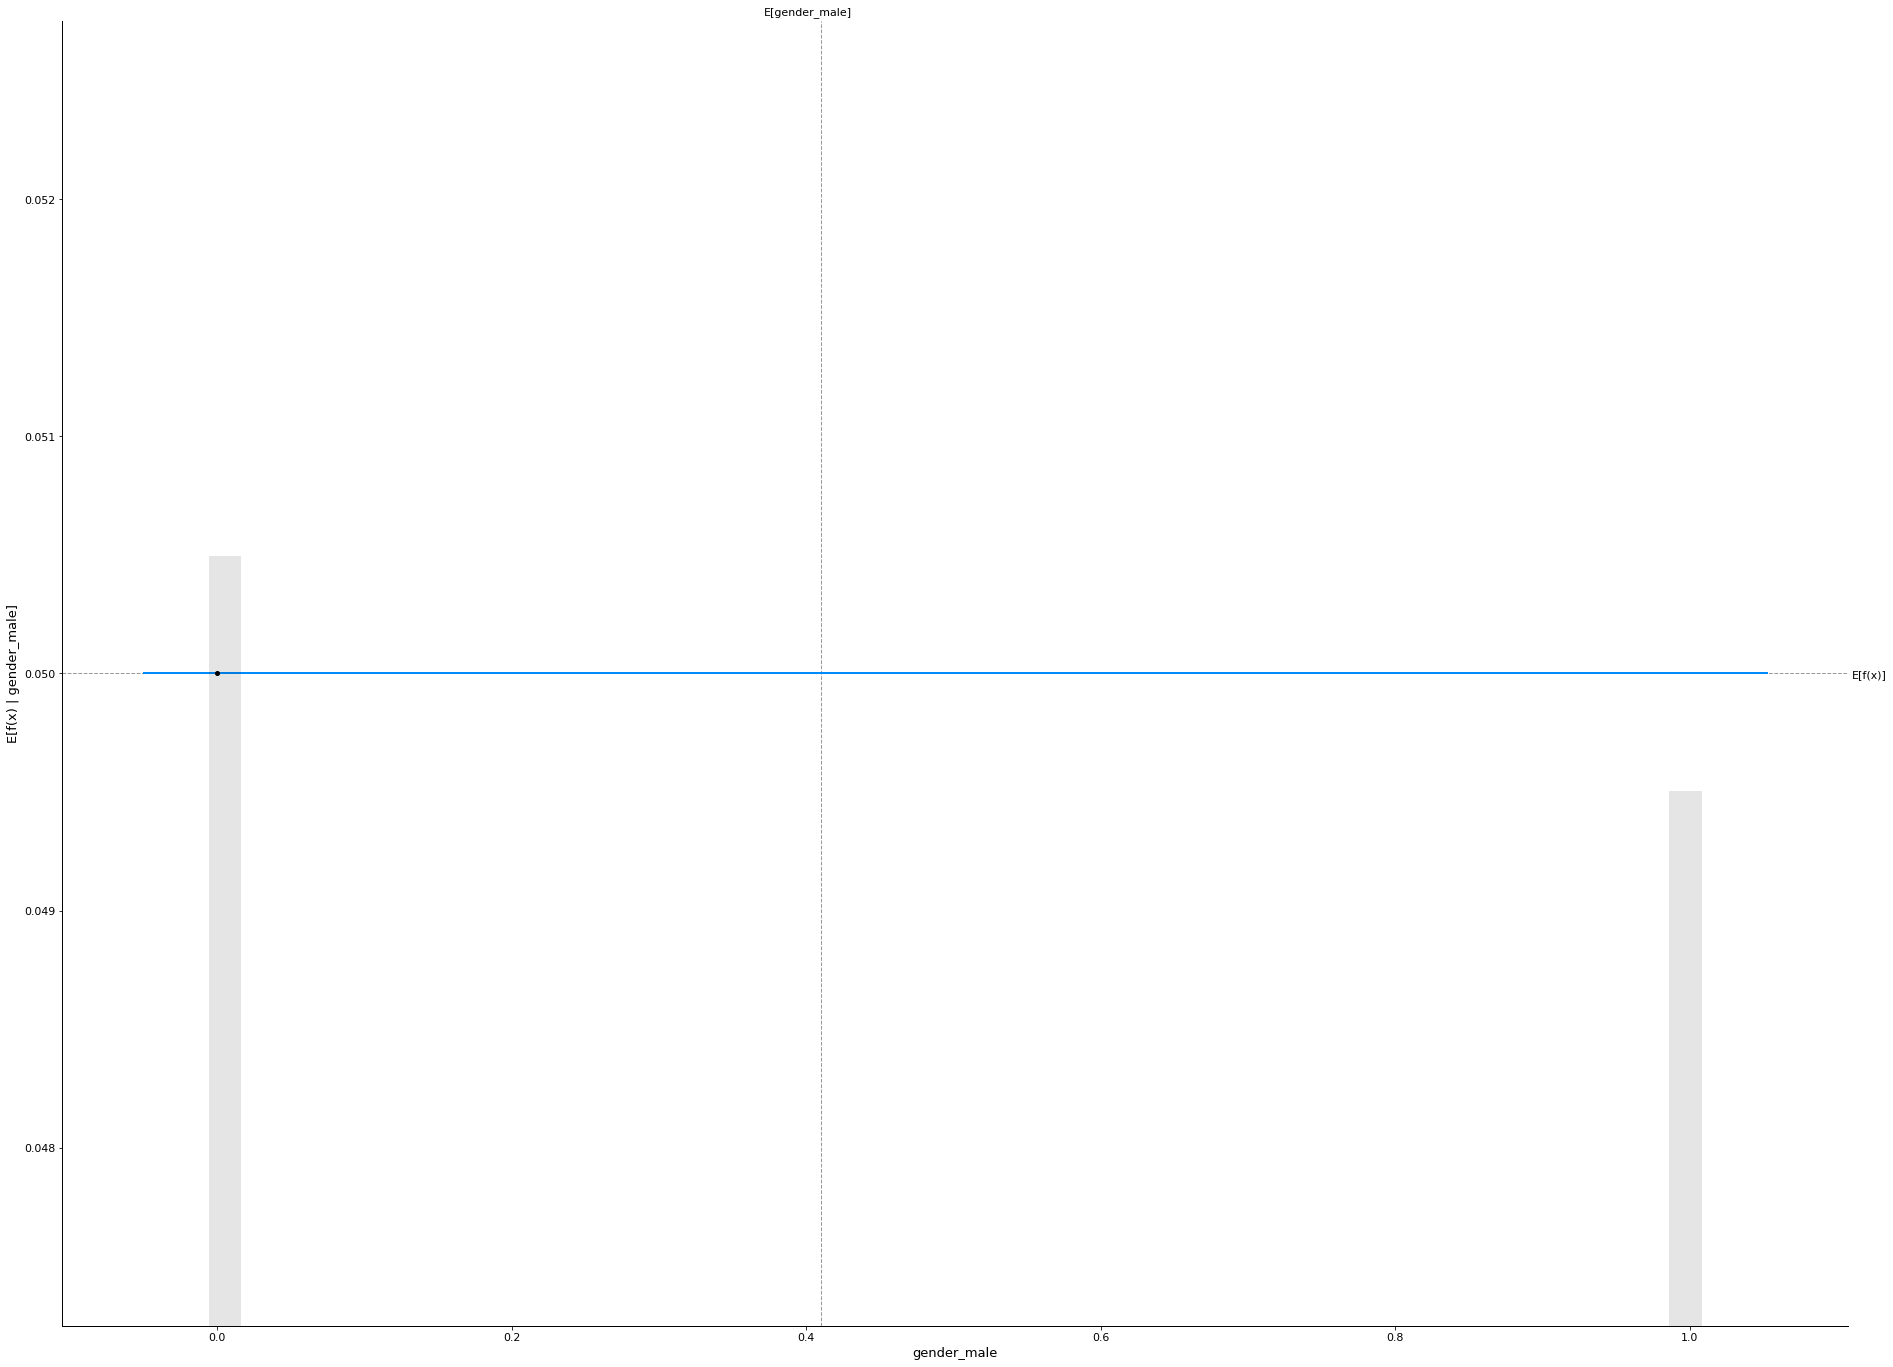

In [ ]:
# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(regr.predict, X_train_100)
linear_shap_values = linear_explainer(X1_train)
for i in X1_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        regr.predict,
        X_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

Permutation explainer: 352it [00:39,  6.84it/s]


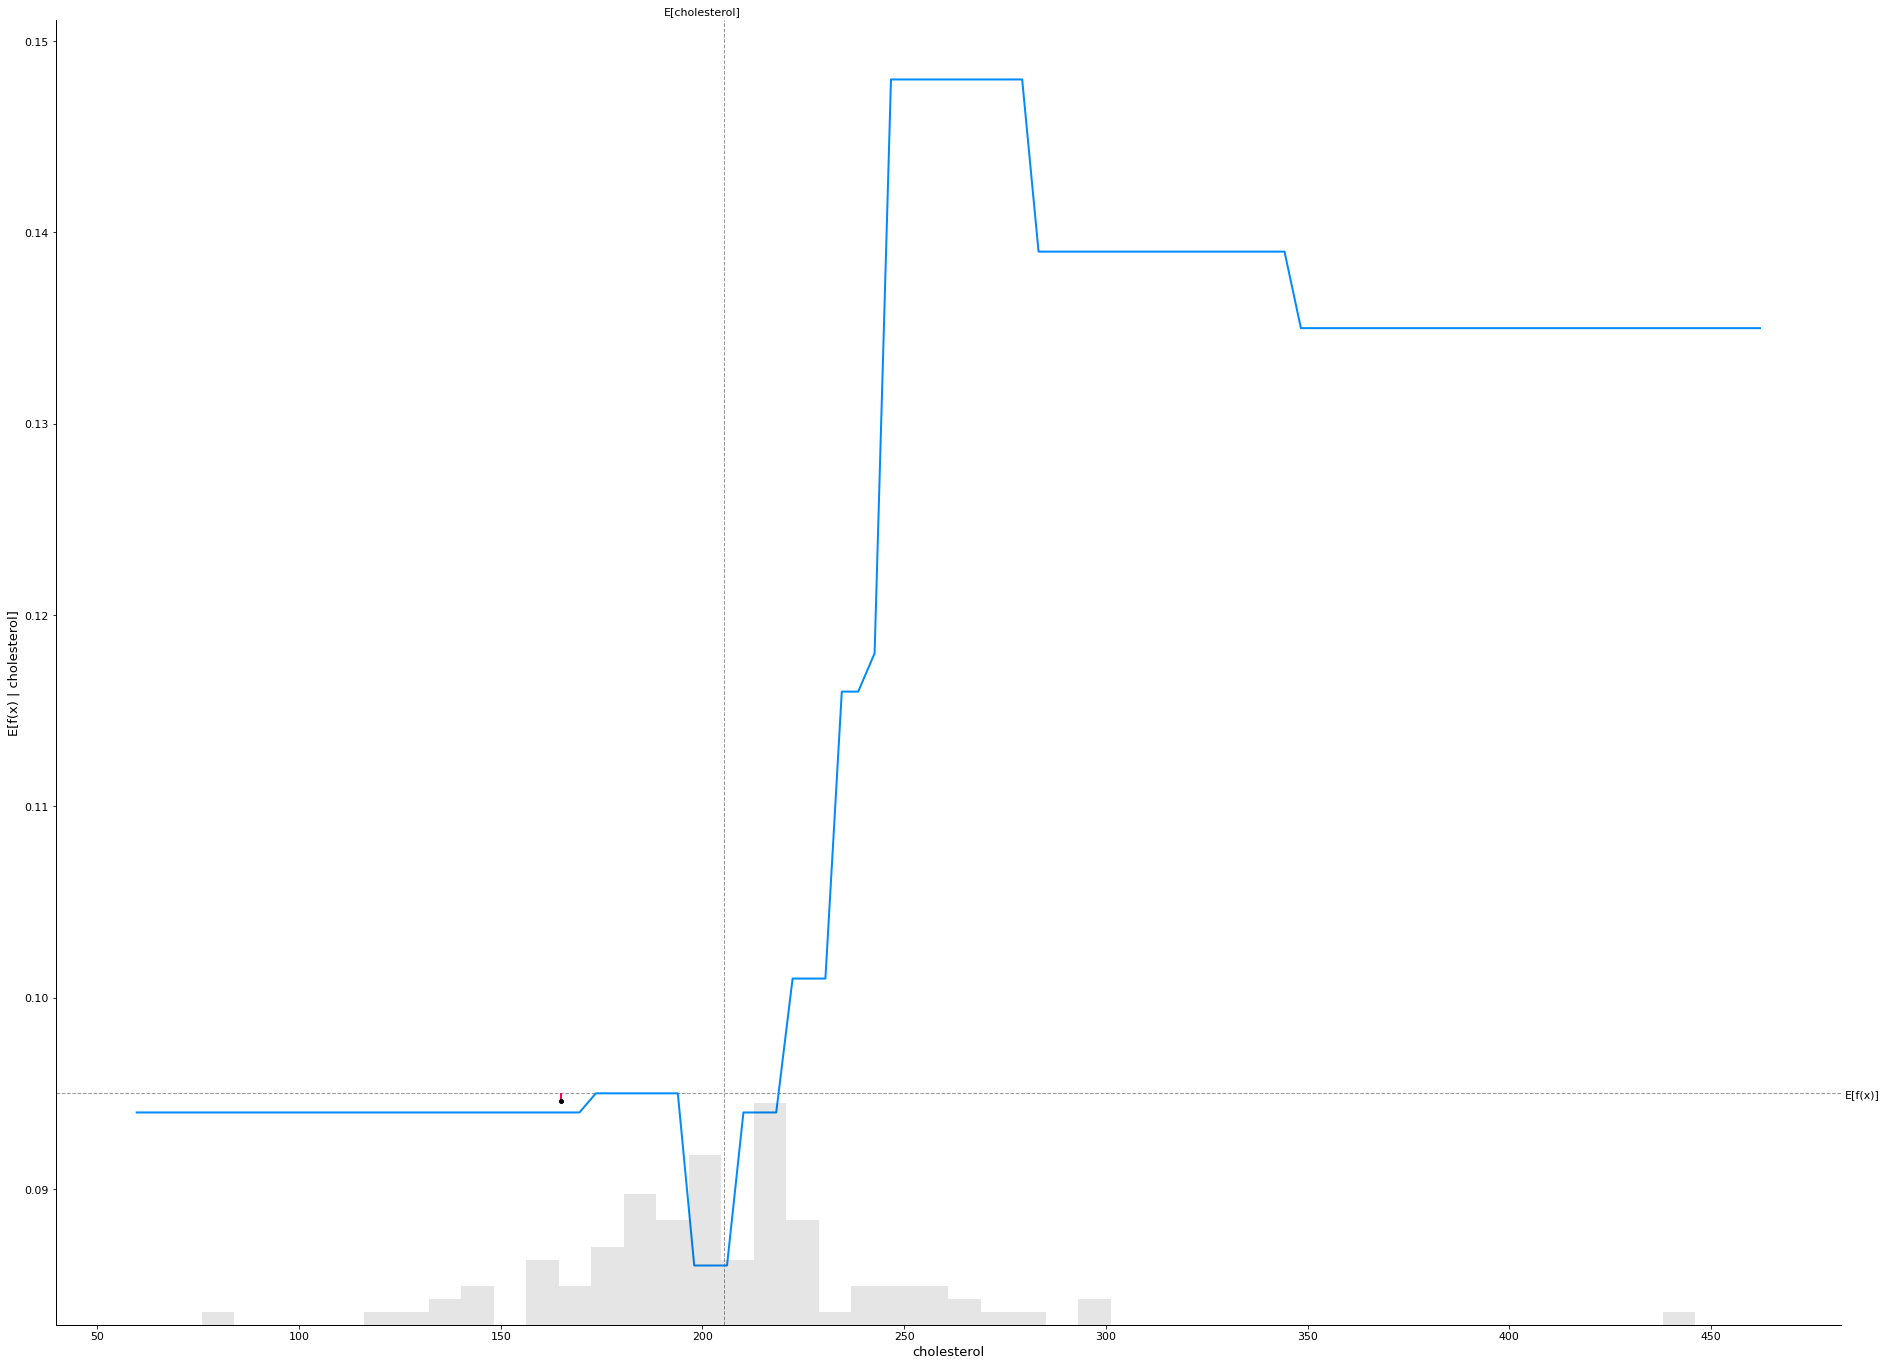

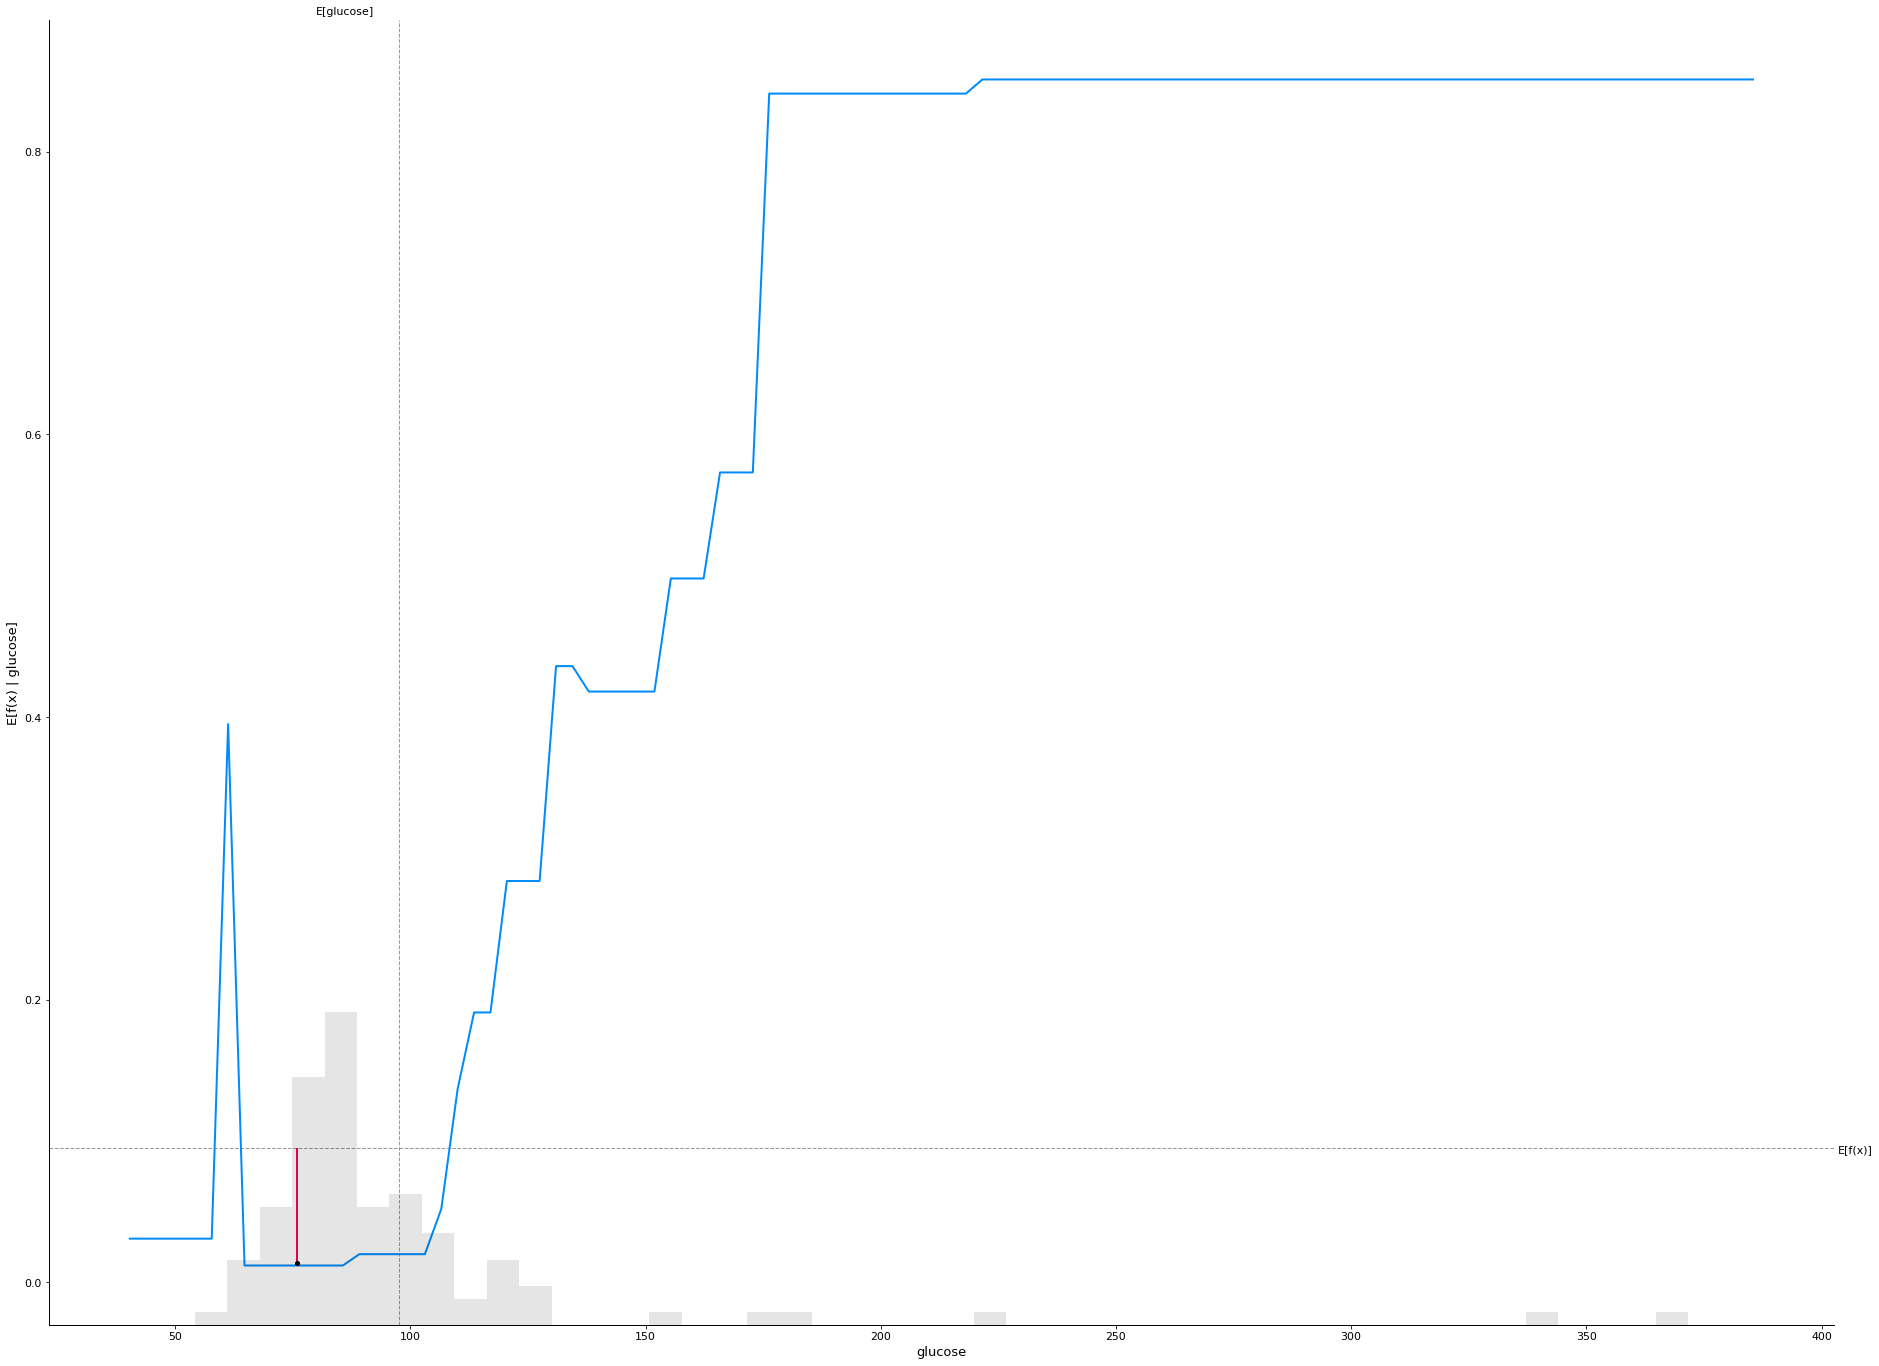

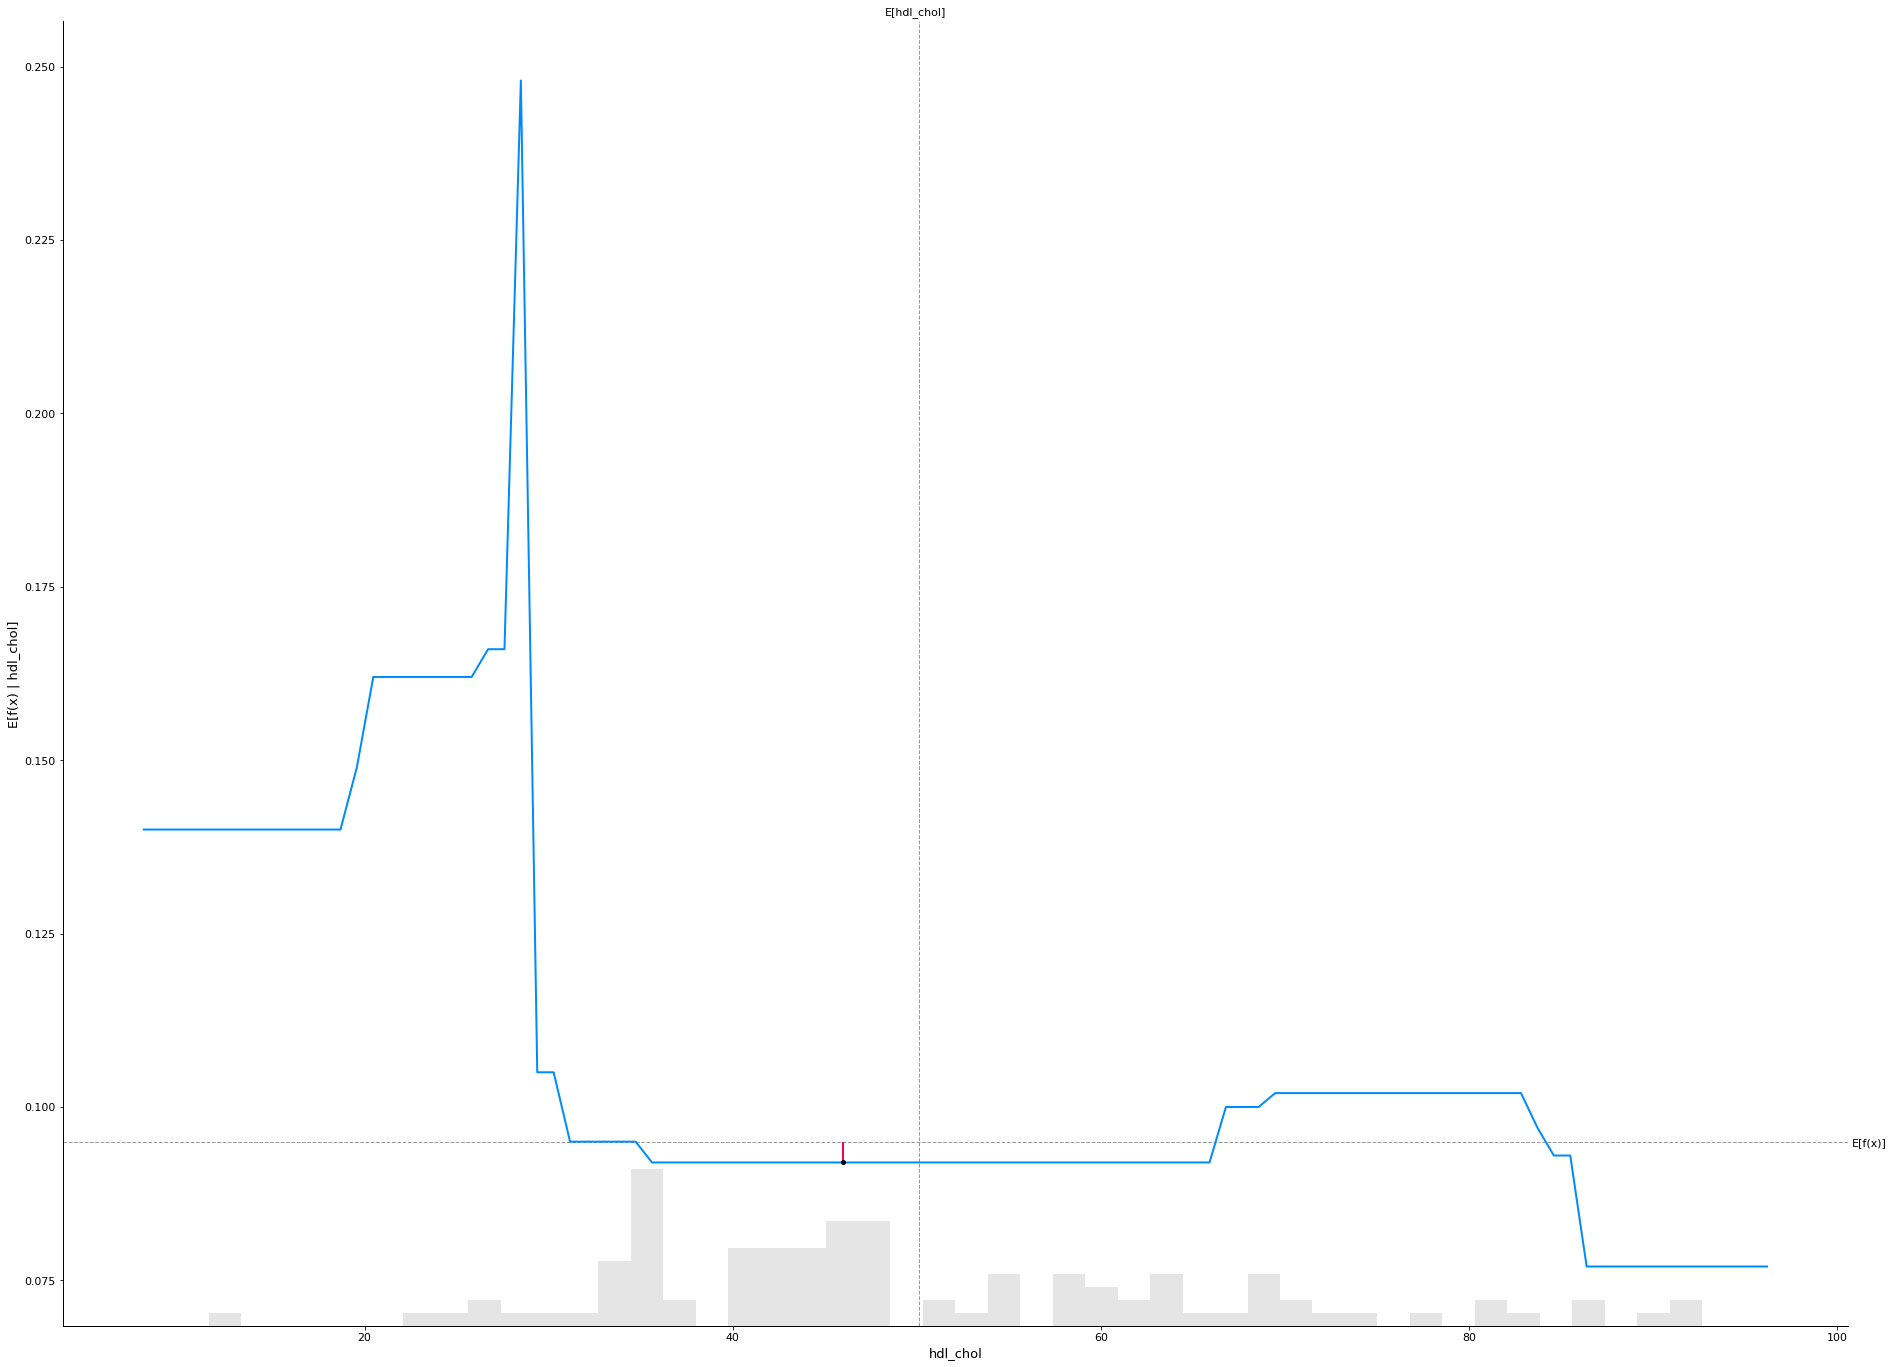

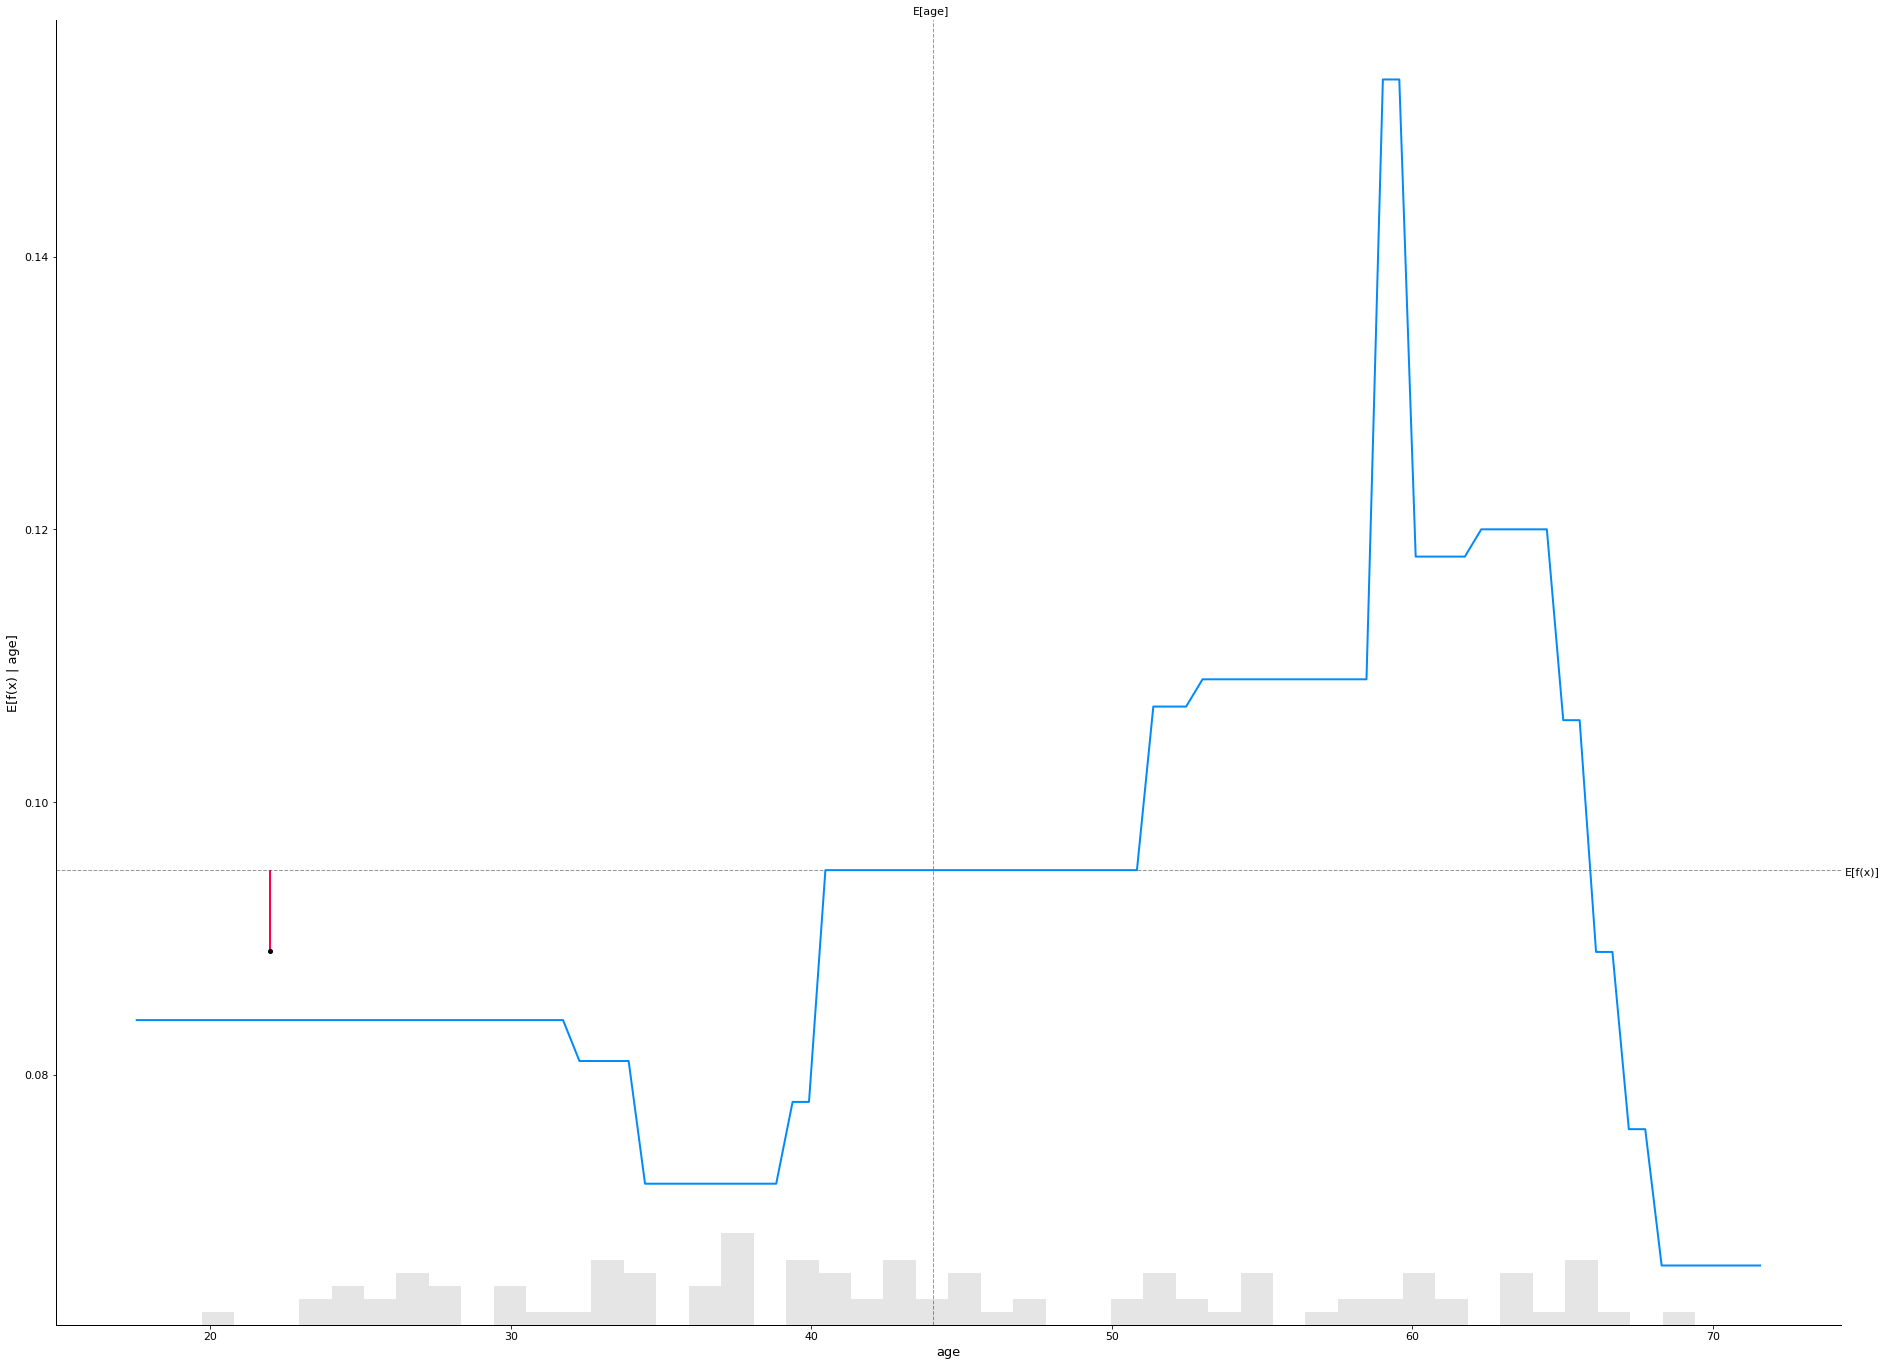

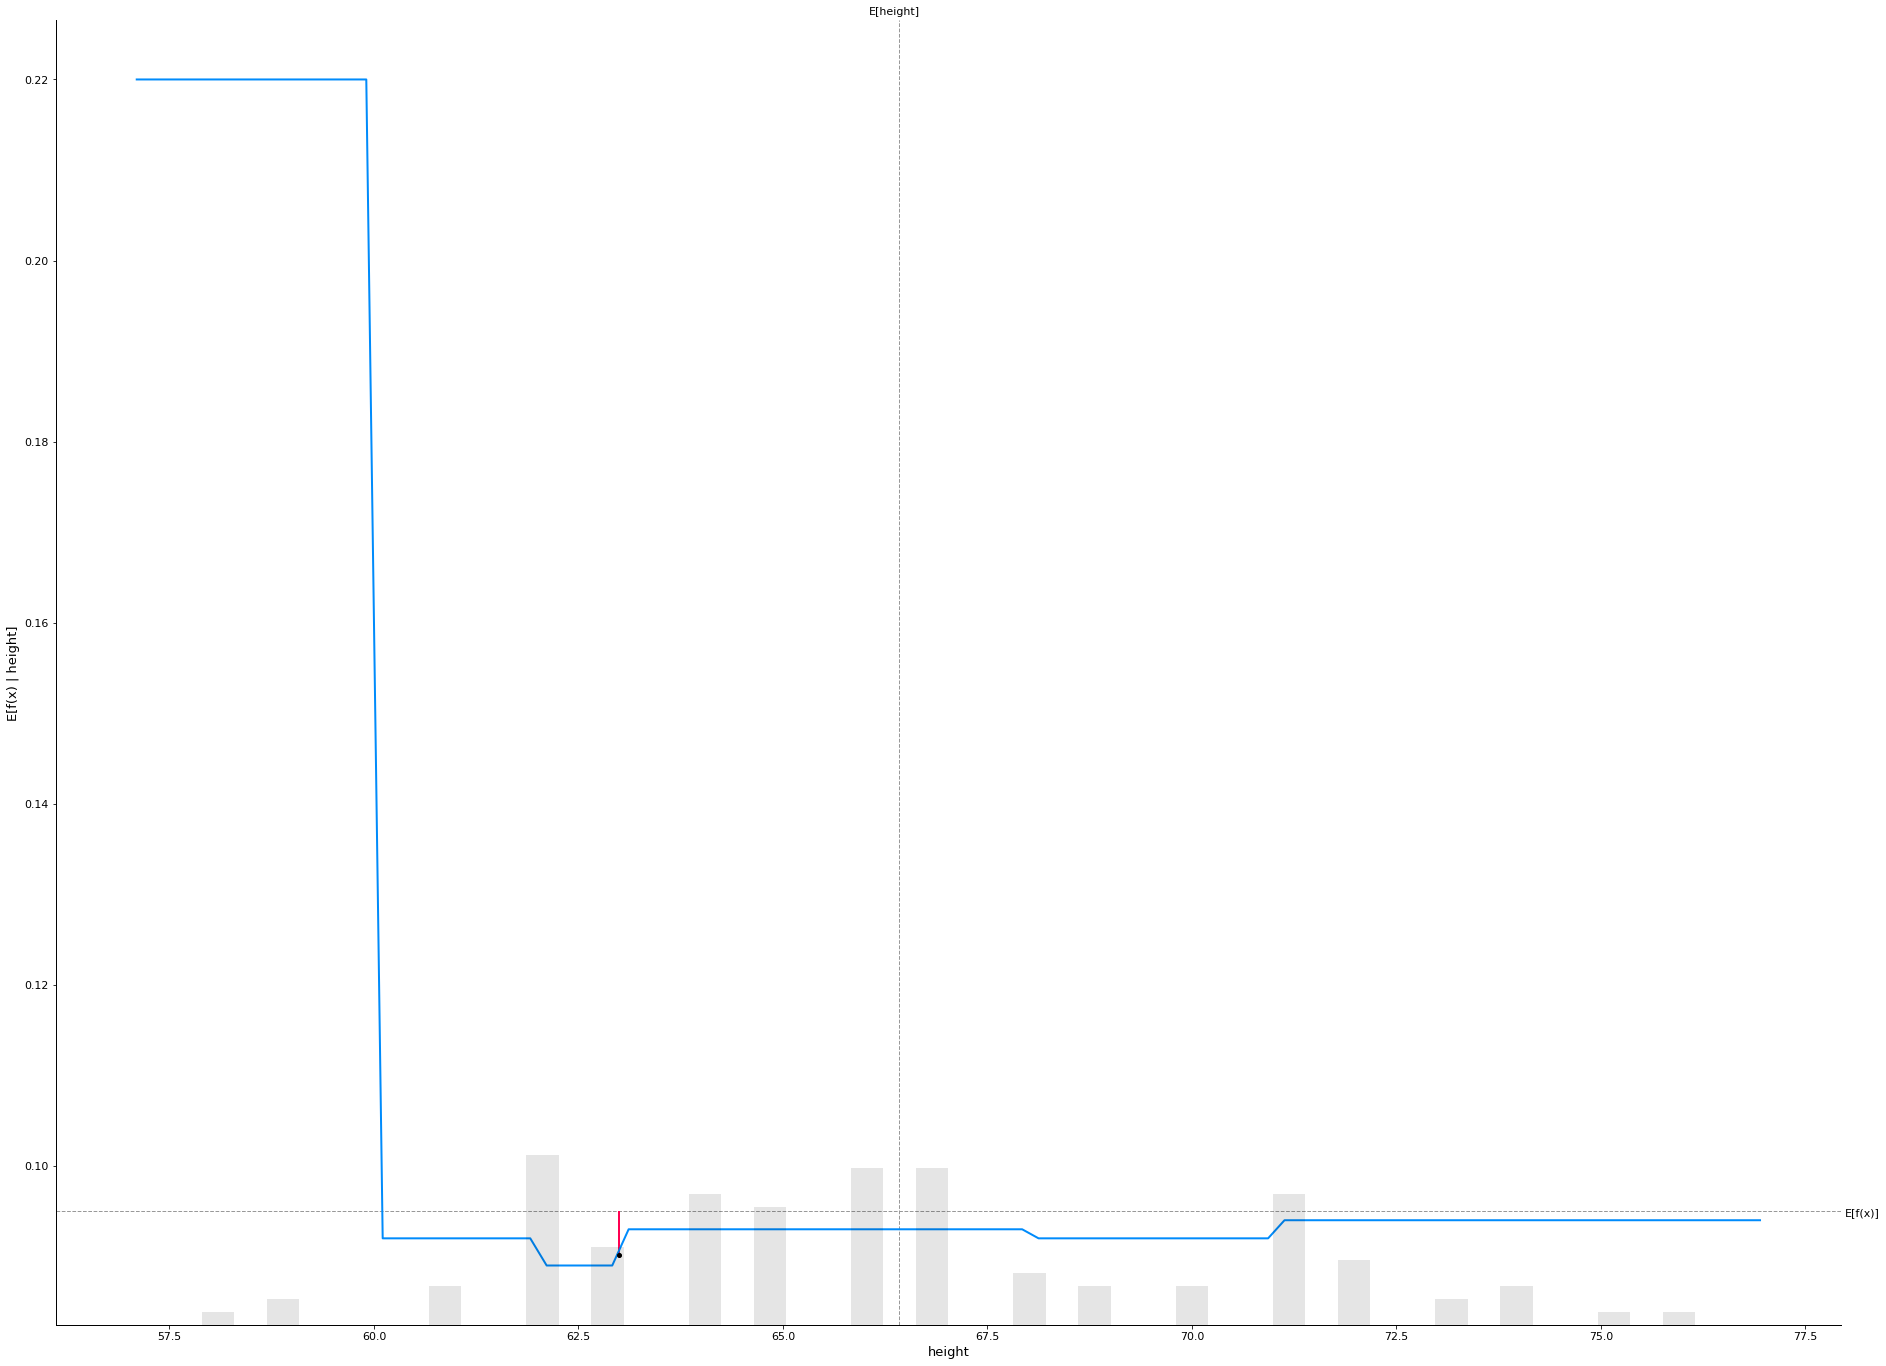

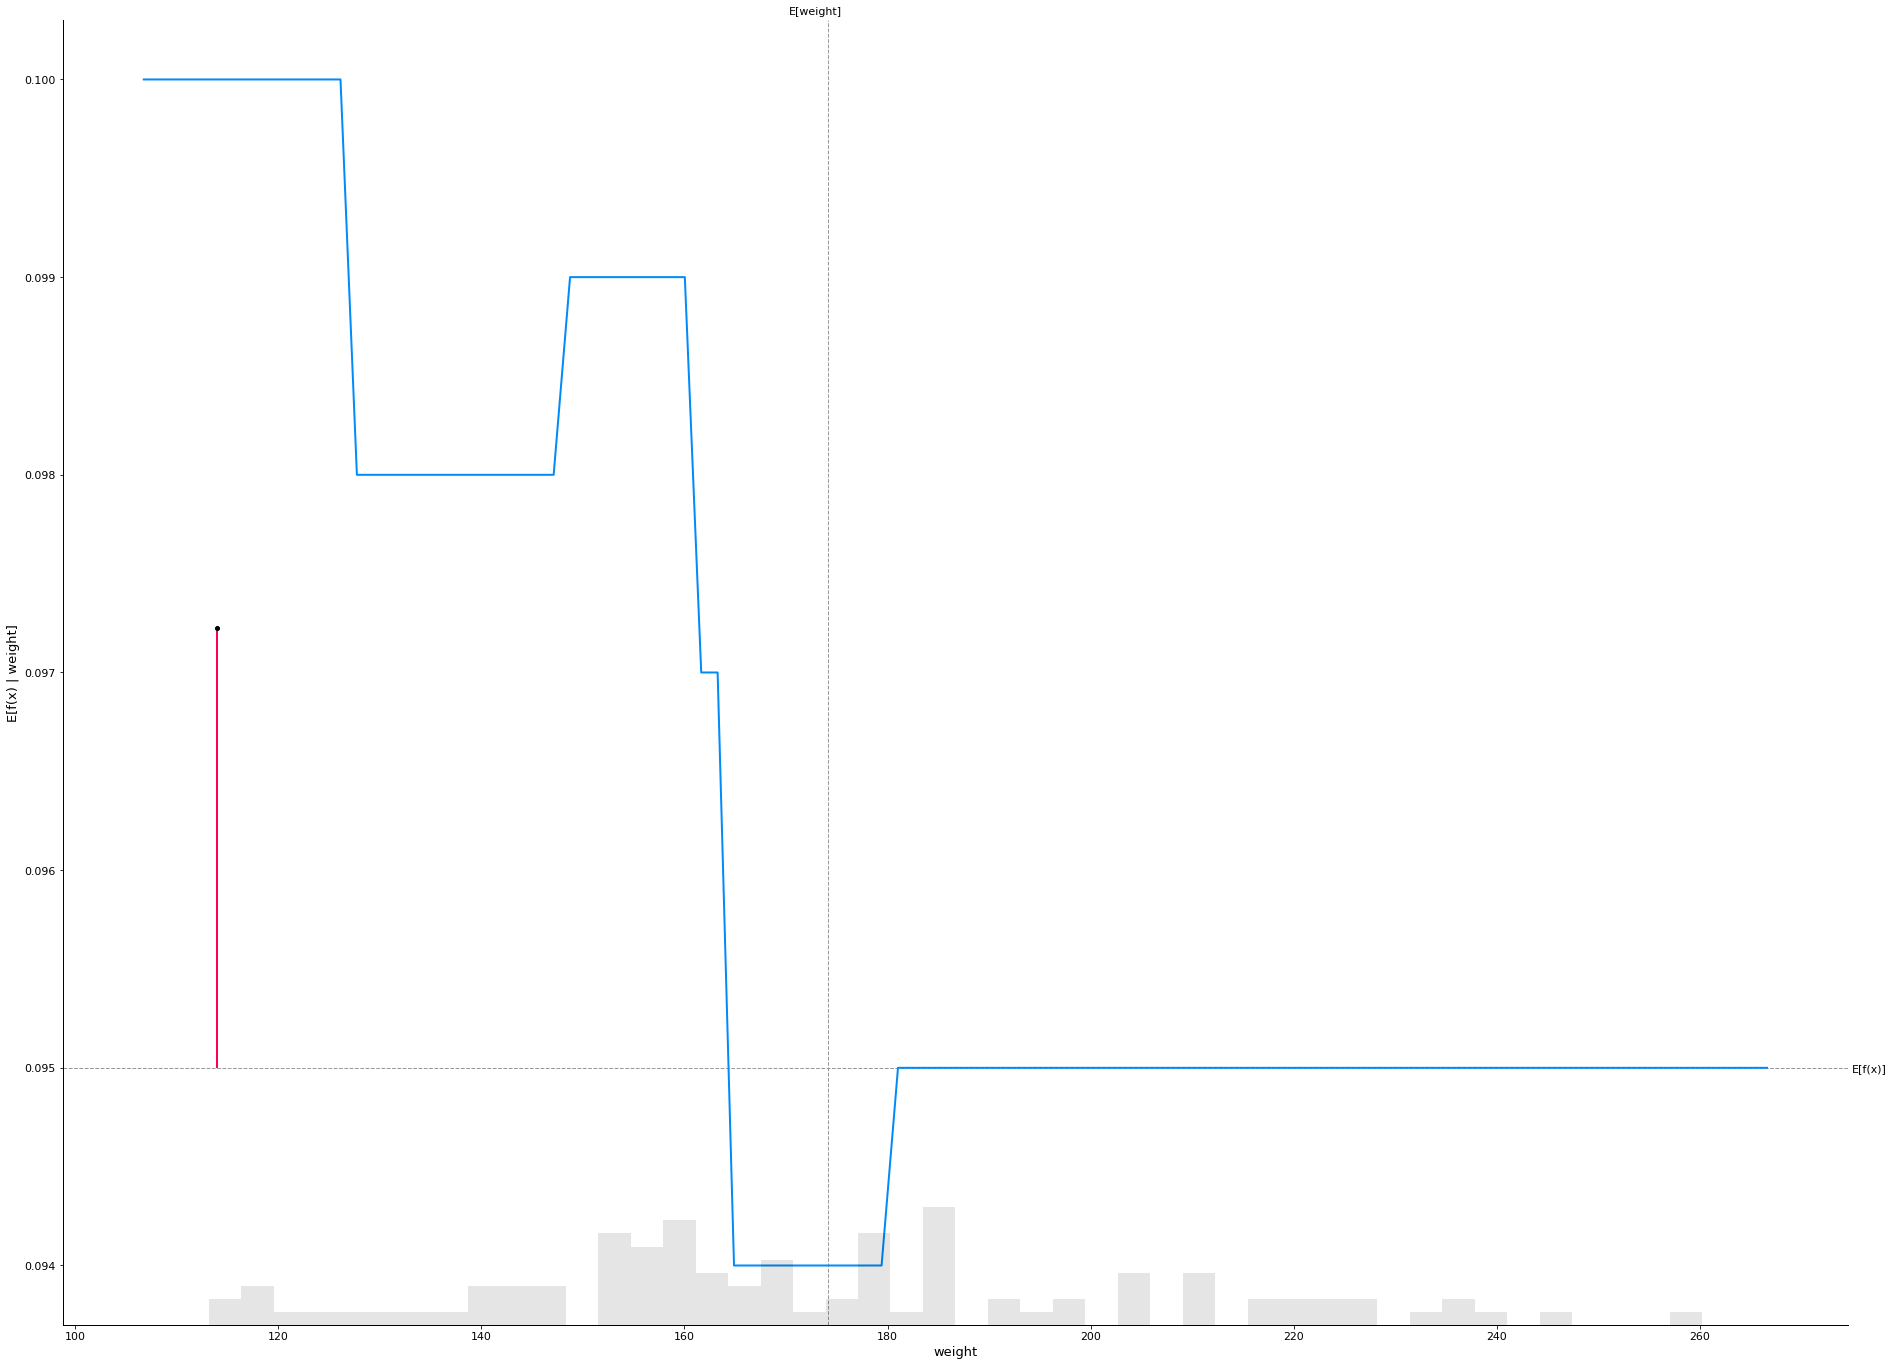

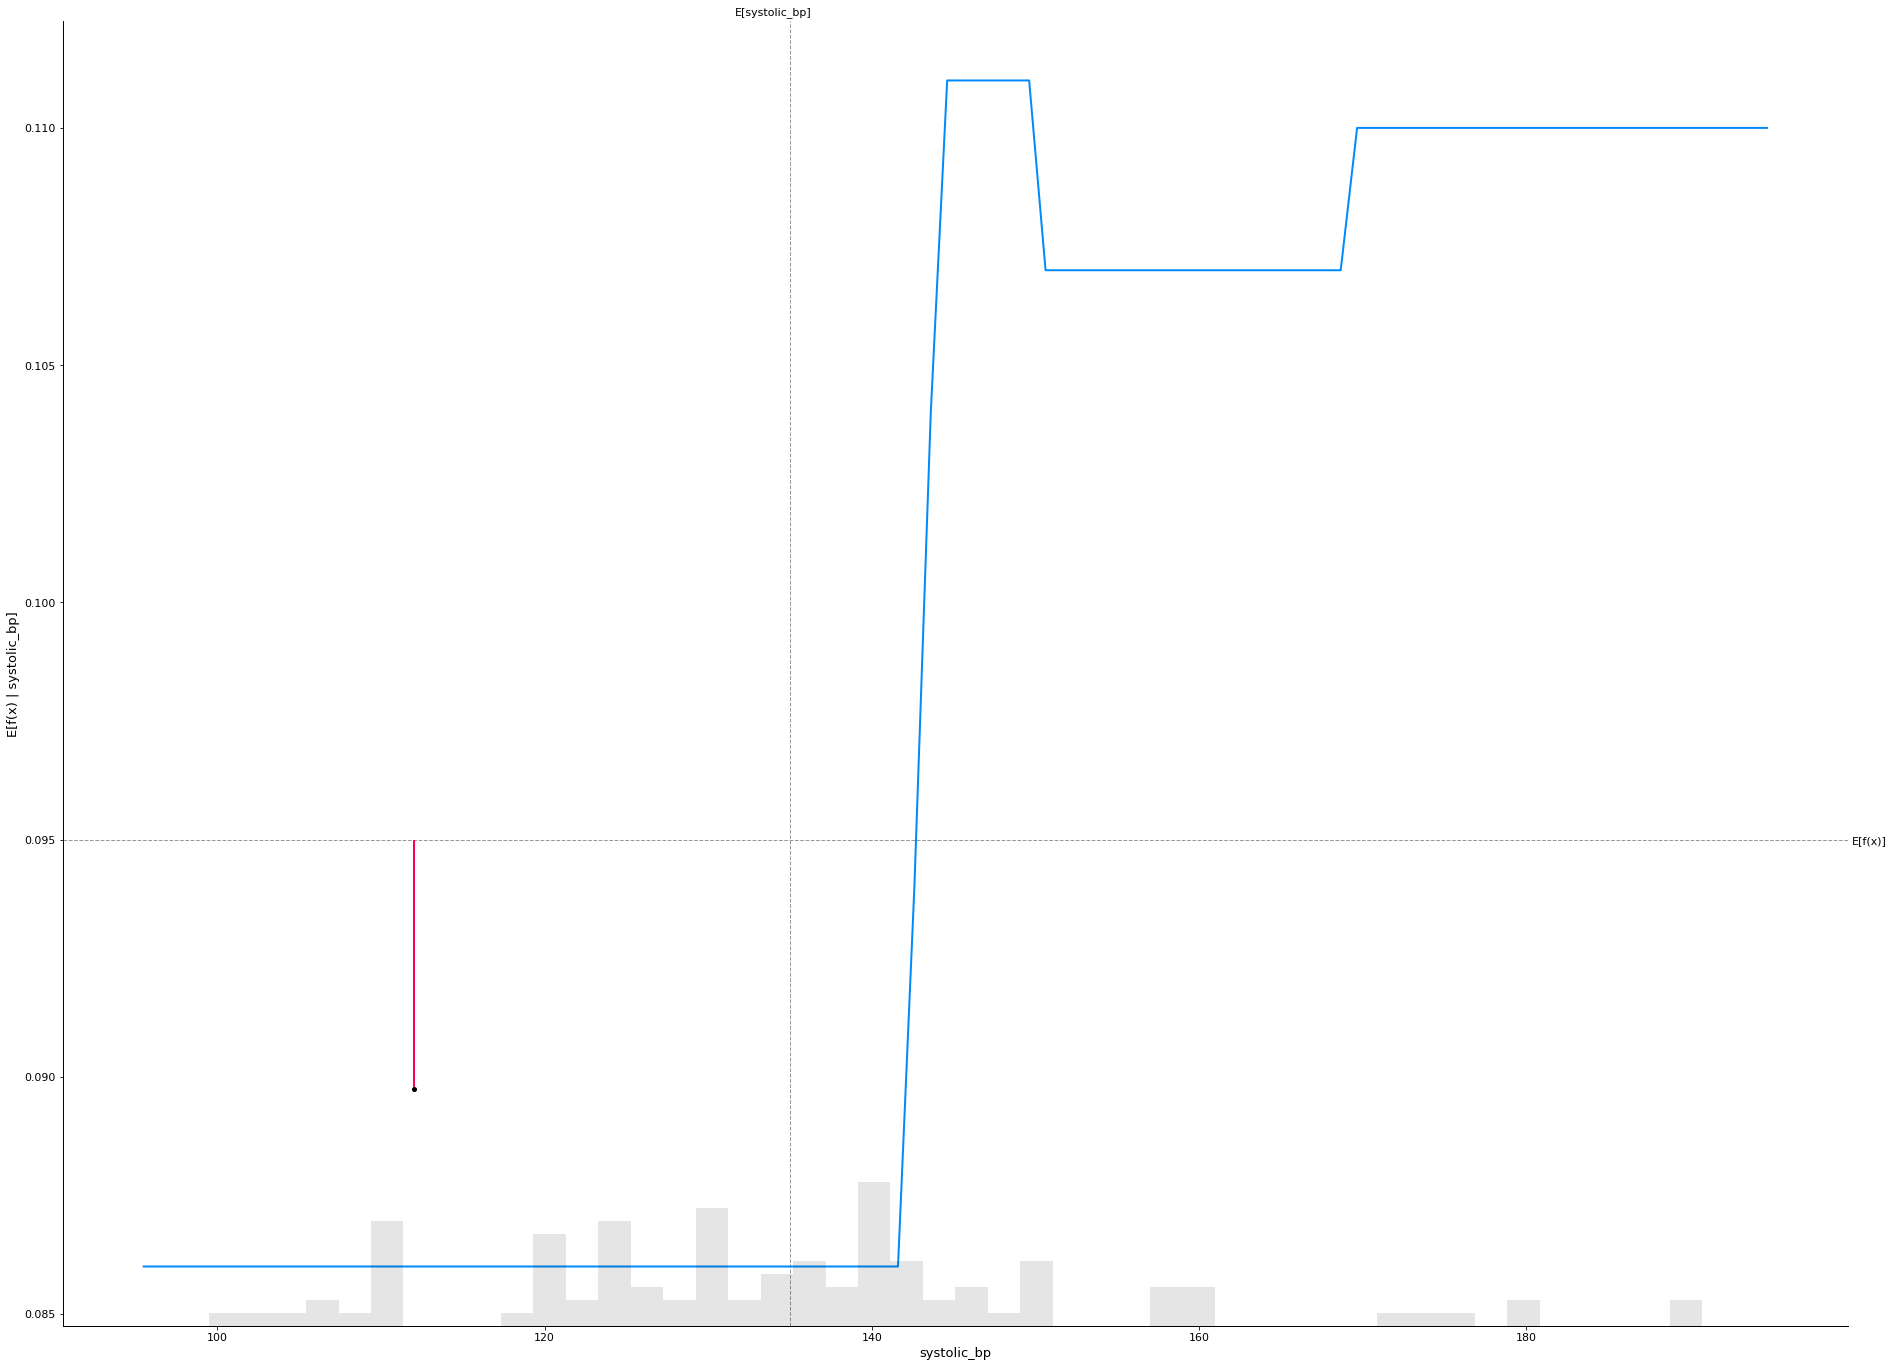

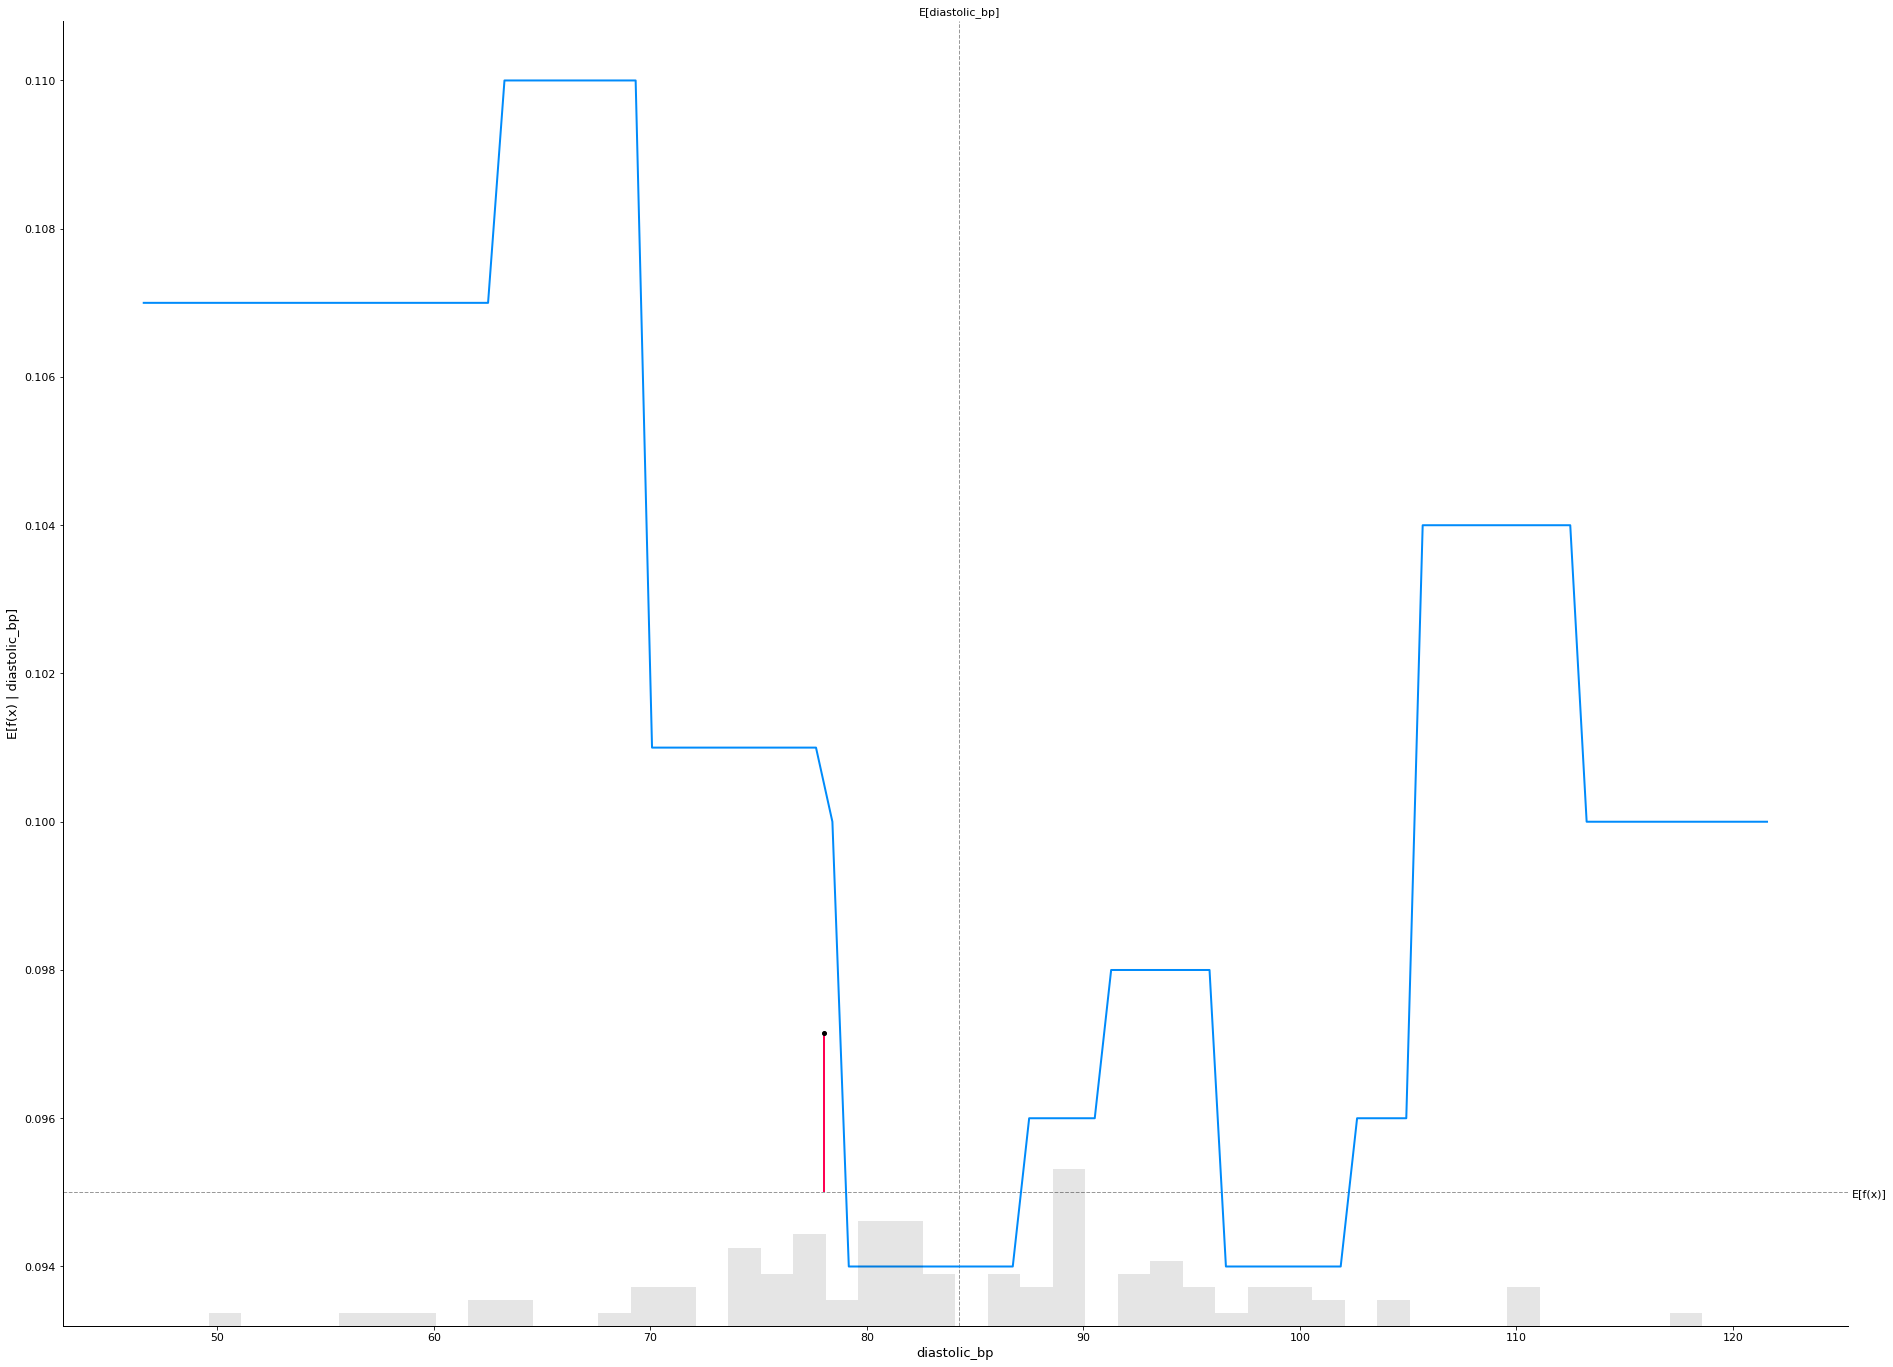

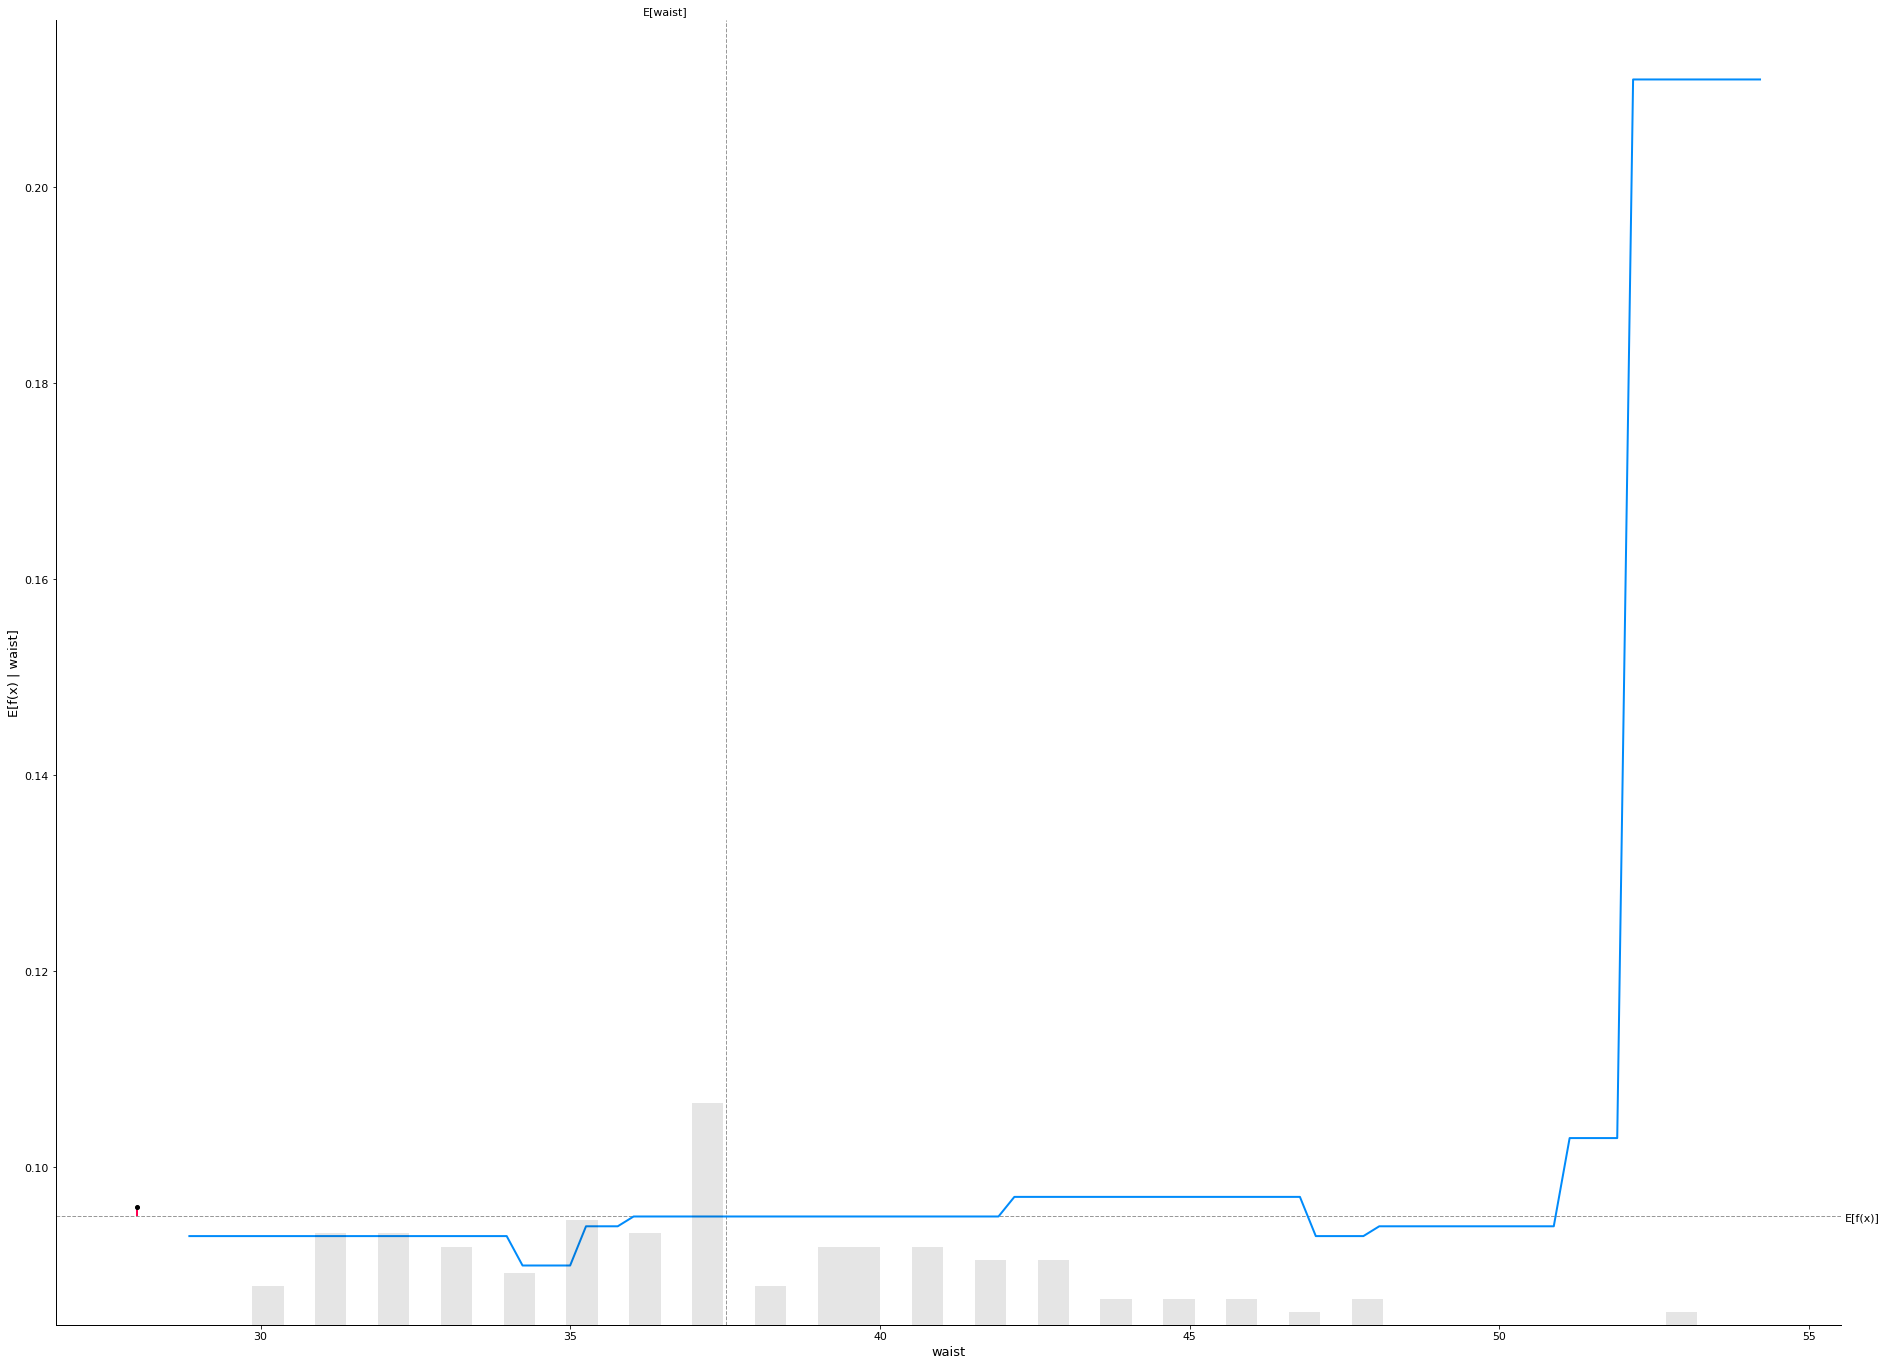

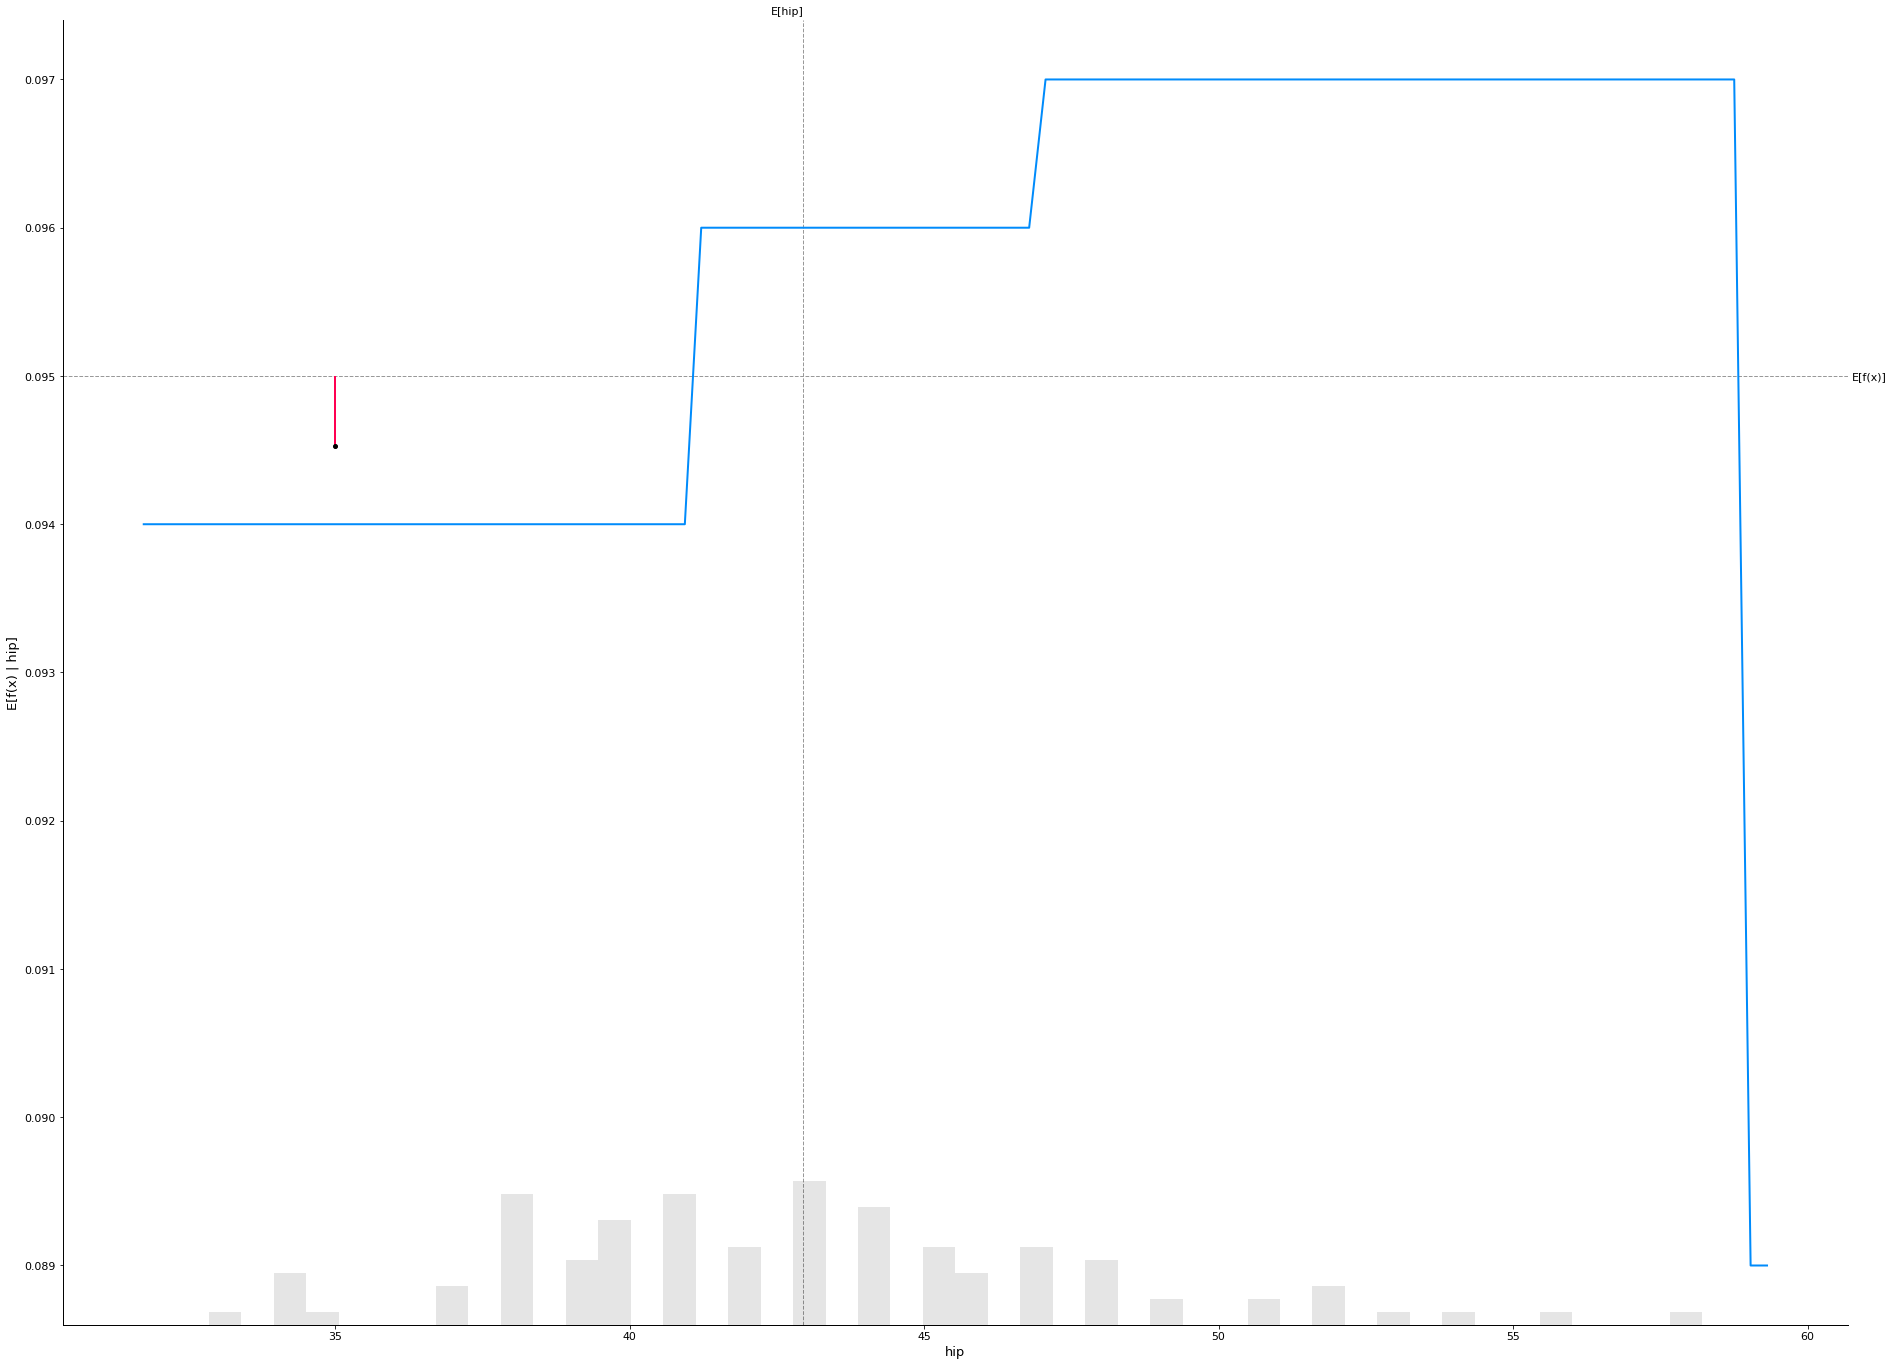

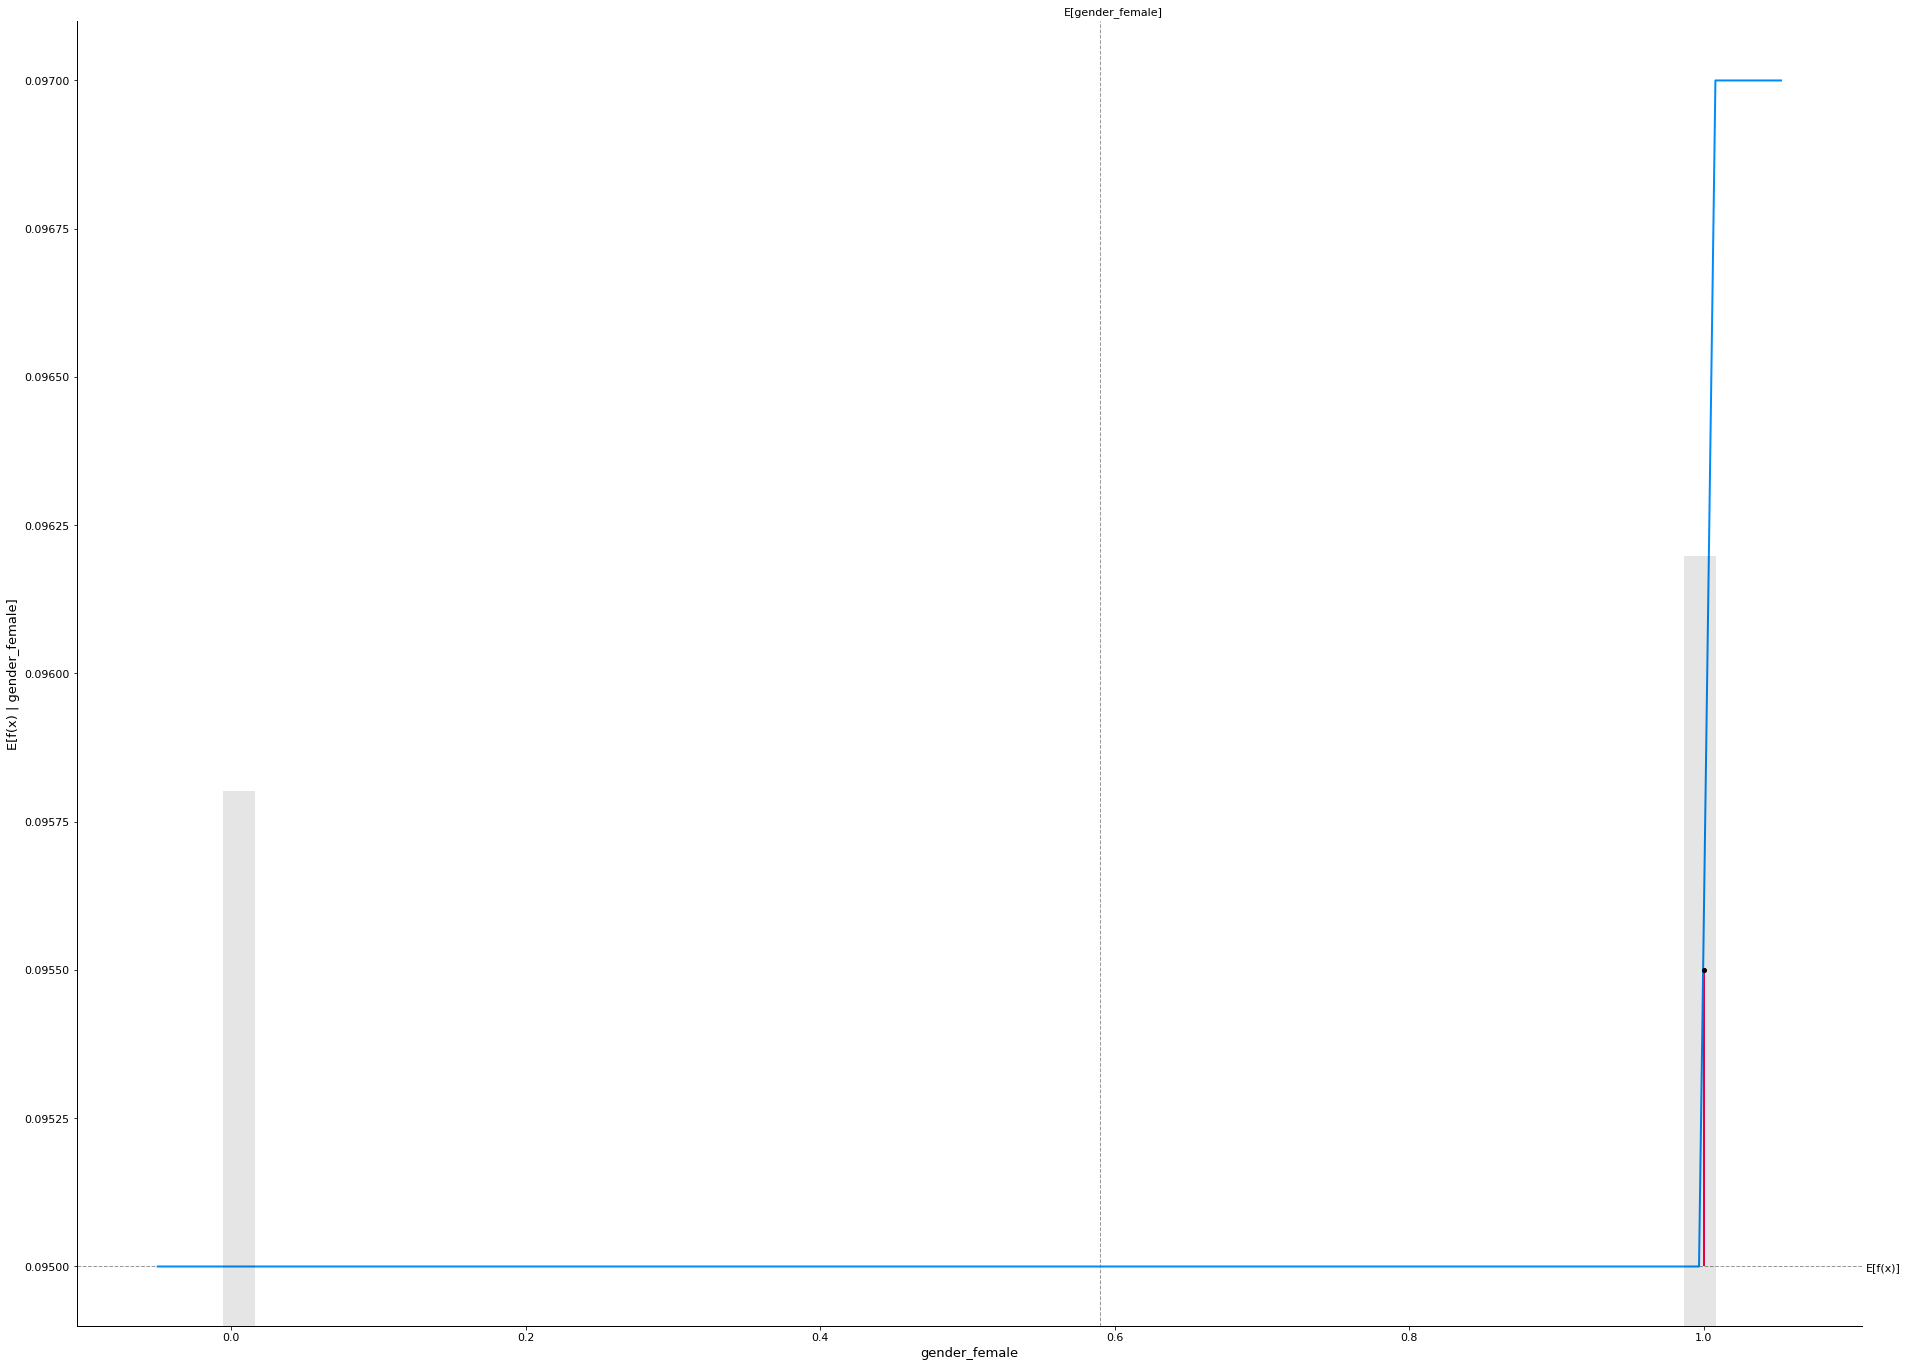

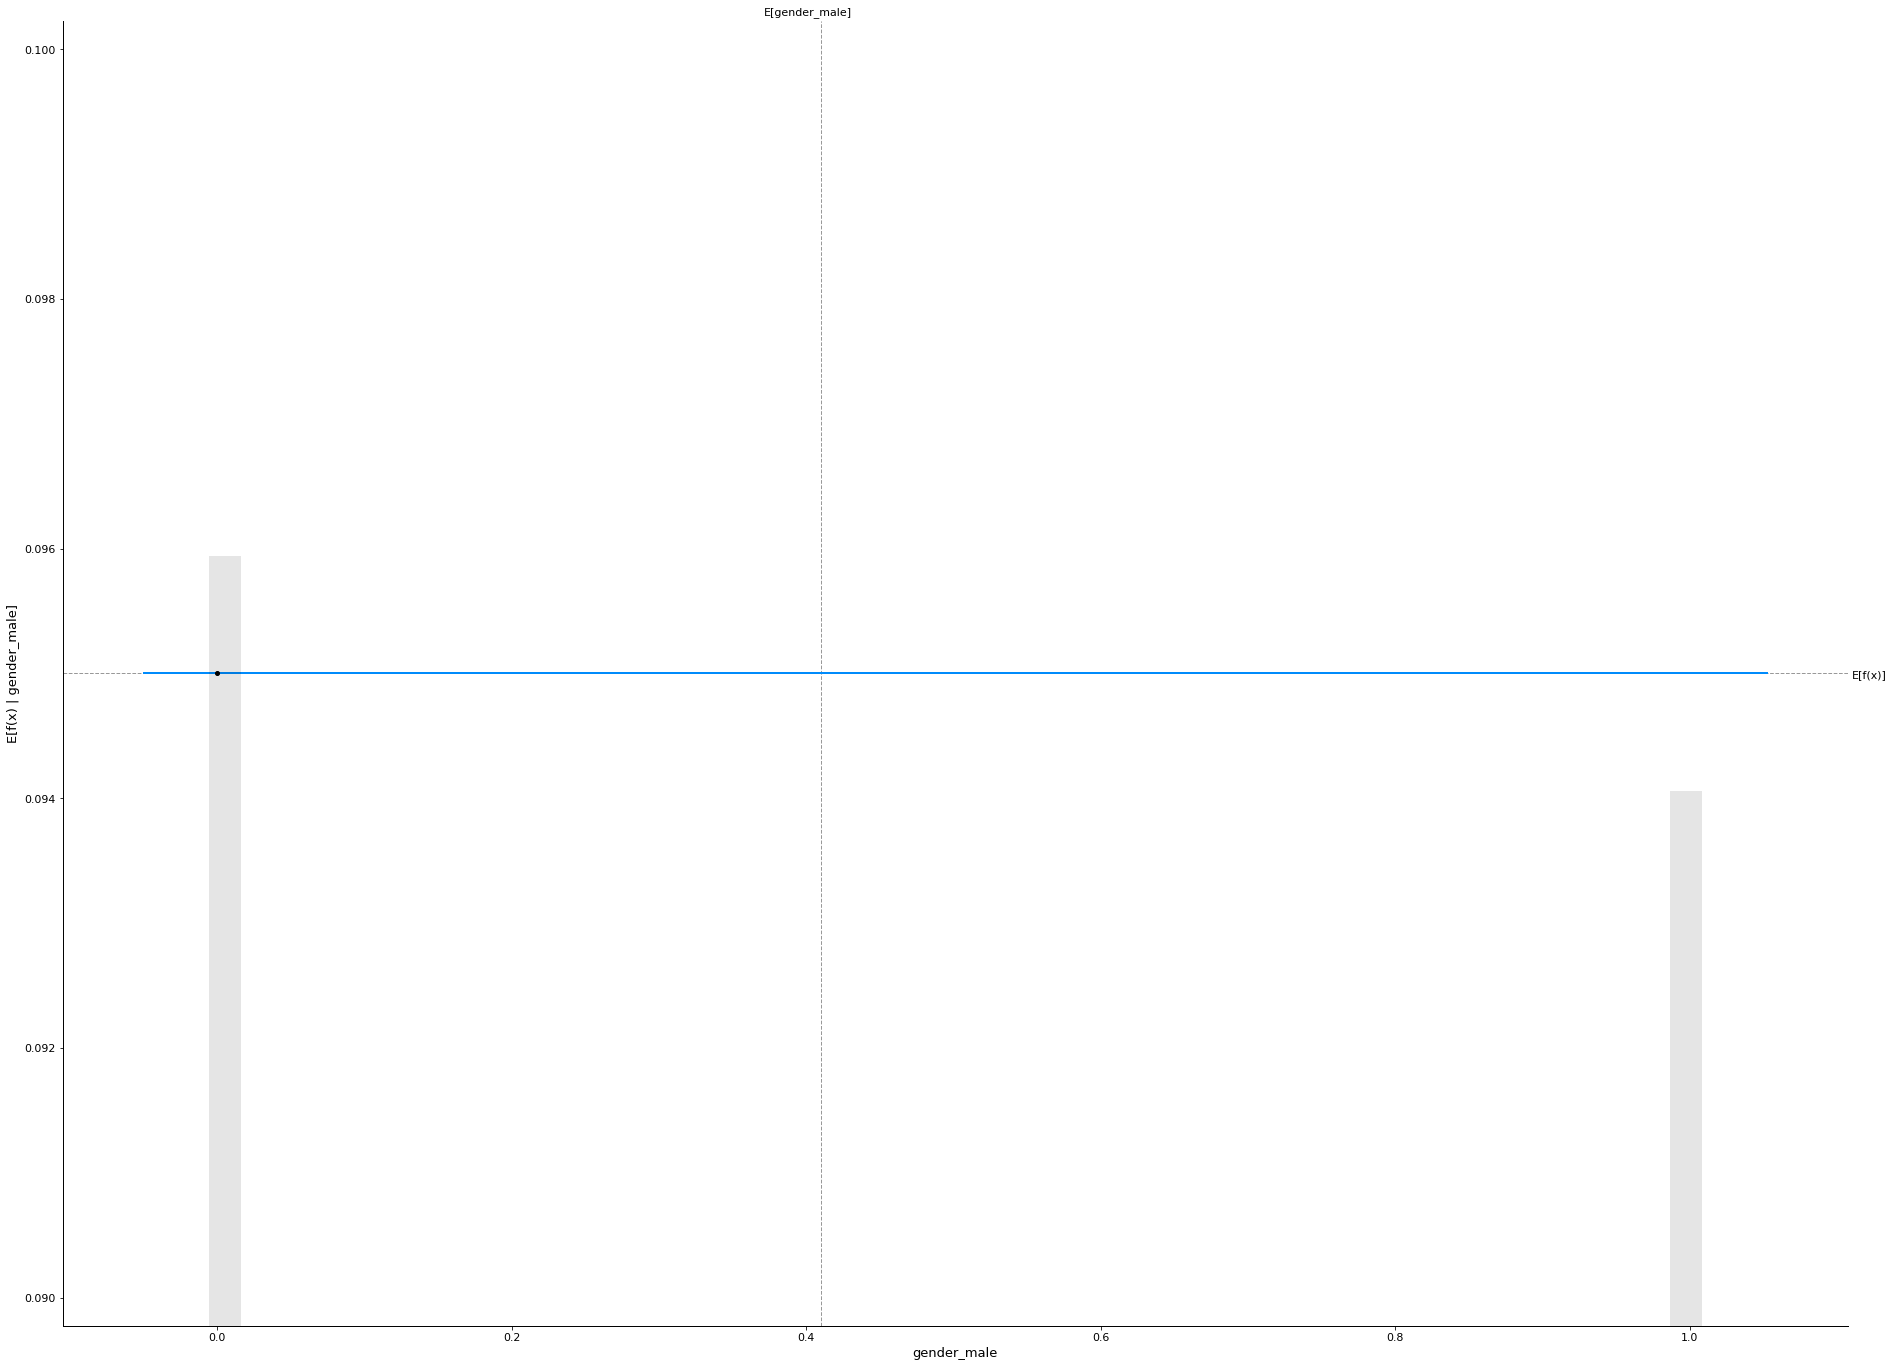

In [ ]:
# SHAP explanation of a Tree based Model
tree_explainer = shap.Explainer(rf_model.predict, X_train_100)
tree_shap_values = tree_explainer(X1_train)
for i in X1_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        rf_model.predict,
        X_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

# **SHAP Analysis for Linear Model and Tree Based Model**

Here, the output is on the y-axis as we vary the feature, and the x-axis represents the feature. The gray histogram represents the dataset's variable distribution, and the cross formed by E[Feature] and E[f(x)] represents the anticipated values.

Let us take a feature of Cholesterol:

1. For the Linear model the cross is made at approx E[f(x)] 0.05
2. For the Tree Based model the cross is made at approx E[f(x)] 0.093

When we provide a sample as an input (sample ind = 18) to examine the result, the red line on the plot appears. We may visualize the deviation between the model output and the expected value by charting this.

In [ ]:
X1_output_linear = X1_test.copy()
X1_output_linear.loc[:, "predict"] = np.round(
    regr.predict(X1_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X1_output_tree = X1_test.copy()
X1_output_tree.loc[:, "predict"] = np.round(
    rf_model.predict(X1_output_tree), 2
)  # Attaching the output of tree based model to test dataframe
     

In [ ]:
# Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(rf_model)
shap_values_Model = explainerModel.shap_values(X1_output_tree)


def shap_plot_tree(j):
    p = shap.force_plot(
        explainerModel.expected_value, shap_values_Model[j], X1_output_tree.iloc[[j]]
    )
    return p

In [ ]:
shap.initjs()  # Initializing JavaScript module
shap_plot_tree(18)  # SHAP force plot for sample 18

# **Explaining the Force Plot**

An example of a SHAP plot is a force plot, which shows the contributions made by each characteristic to the final forecast for a given sample.

The final graph displays a horizontal bar chart with the corresponding SHAP values on the x-axis and the feature names on the y-axis. Each bar is either blue or red, depending on whether the feature value changed the outcome anticipated or not. The size of the feature's contribution to the forecast is indicated by the length of the bar.

The force plot, in general, aids in our understanding of how each feature affects the output of the model and how the model derives its final prediction for the given input sample.

# **Interpreting SHAP Feature Importance Plot for Linear and Tree-based model**

It's easy to understand the concept underlying SHAP feature importance: Features with high absolute Shapley values are significant. We average the absolute Shapley values for each feature throughout the data because we want to determine global relevance. The features are then sorted and plotted in decreasing order of relevance.

The plots listed below are

1. The significance of SHAP features for a linear model
2. Importance of SHAP characteristic for tree-based model

There is a difference in feature importance for both models, as seen below in the charts.

While systolic_bp is the second-most important feature in our tree-based model when we take the average of SHAP values into account to determine feature importance, age is the second-most important feature in the linear model.

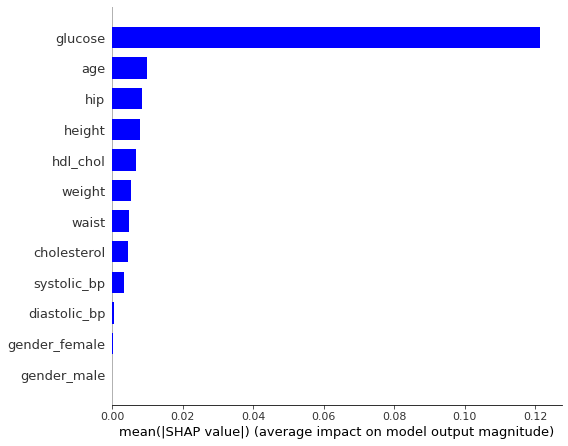

In [ ]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, X1_train, plot_type="bar", color="blue")

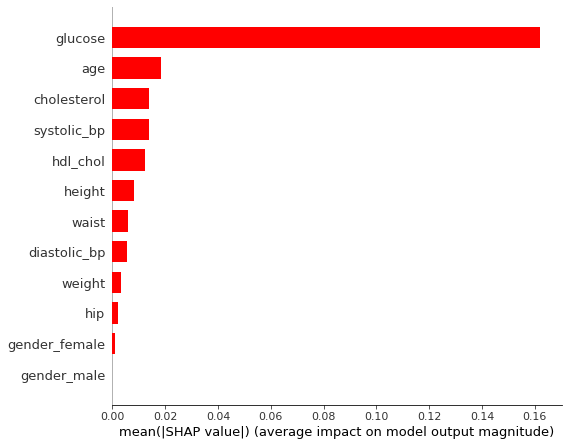

In [ ]:
# SHAP variable importance for a Tree based Model
shap.summary_plot(tree_shap_values, X1_train, plot_type="bar", color="red")

# **Interpreting Waterfall SHAP Visualization**

Let's consider the same sample (sample_ind = 18)

1. Note that the waterfall model's value for Cholesterol matches the partial dependence graphic from SHAP. It states that the model output was f(x) = -0 while the expected output for this sample was f(x) = 0.05. Given that the difference is only 0.05, we were really close to figuring it out. The waterfall model describes how we arrived at the desired result and what contributions certain components made. According to the graph below, cholesterol has the made no effect on the prediction of diabetes in this particular case.

2. With the tree-based model, we simply observe that the amount of the influence made by different attributes differs from what we had in a linear model, where the output we got was 0 and the expected output was 0.093. Here, only two features—glucose and systolic_bp decide the output of the tree-based model.

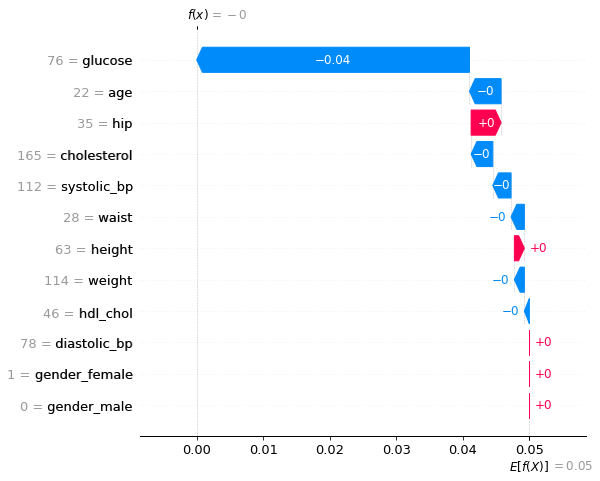

In [ ]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

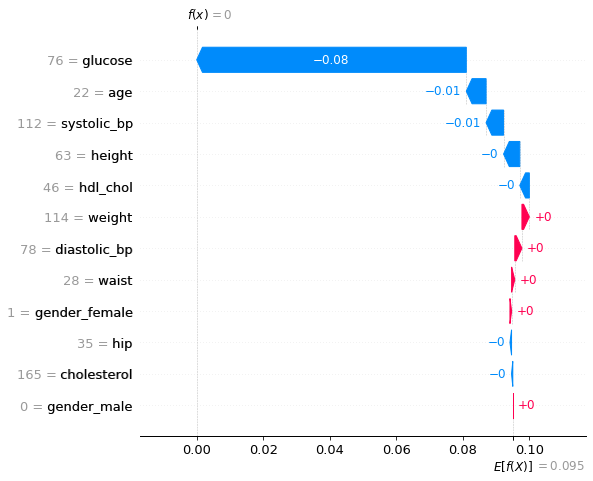

In [ ]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

## **Interpret the summary plot for the Linear and Tree-based model**

Here, the features are ranked from most important to least important. This is among the simplest methods for determining how an ML model's attributes are affecting the target and to what degree.

1. Each red and blue dot indicates a characteristic of a diabetes.
2. Red denotes higher numbers, whereas blue denotes lower values.
3. A diabetes feature has a positive impact if it is on the right side of the y-axis, and a negative impact if it is on the left side of the axis.
4. The distance a dot is from the axis, the more of an influence it has. The intensity is represented by the position of the dot on the x-axis.

This visualization is quite helpful for understanding how our model is operating.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


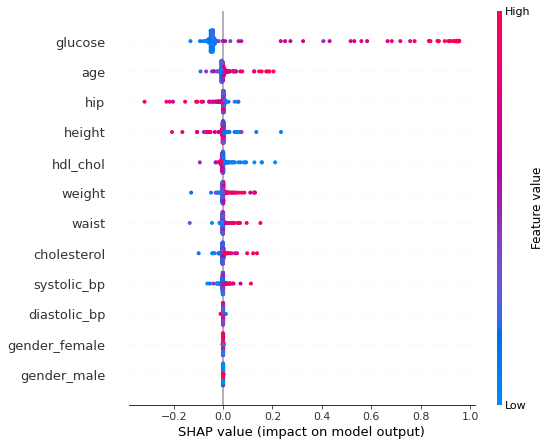

In [ ]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, X1_train)

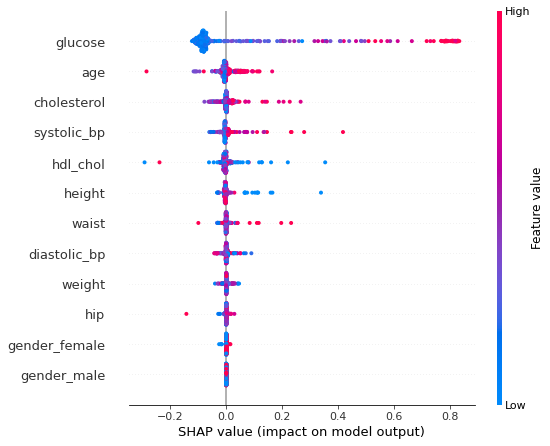

In [ ]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, X1_train)

# **Understanding the linear and tree-based SHAP dependency plots**

The SHAP dependence plot displays the small impact one or two features have on a machine learning model's anticipated result. It indicates if there is a linear, monotonic, or complicated relationship between the target and a feature. Let's analyze the SHAP dependence graphic to interpret the linear and tree-based models. Each patient in our dataset is represented by a dot in this set of graphs.

1. As can be seen, there is non linear relationship between the linear model feature and its SHAP value. Glucose particularly follows a sigmoidal curve with upward steeping slope.

2. The relationship between a feature's SHAP value and its tree-based model is no longer linear. Now that they are taking the interaction effects into account, we can observe that the SHAP dependence plot no longer exactly matches the partial dependence plot. We lose all the high order interactions (ands and ors) in the model that our model may be doing if we look at the PDP.

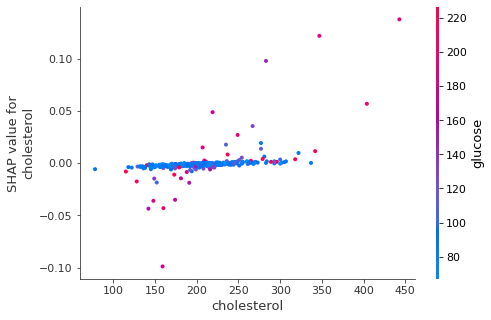

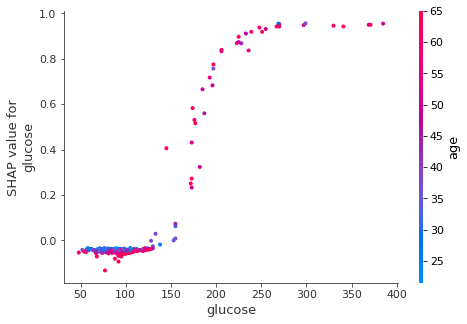

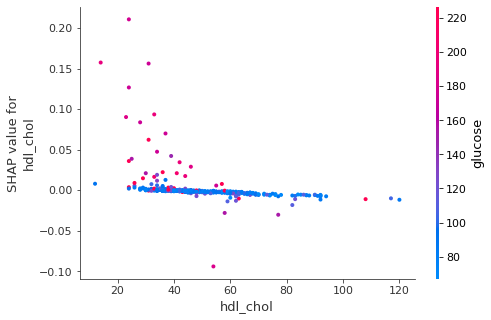

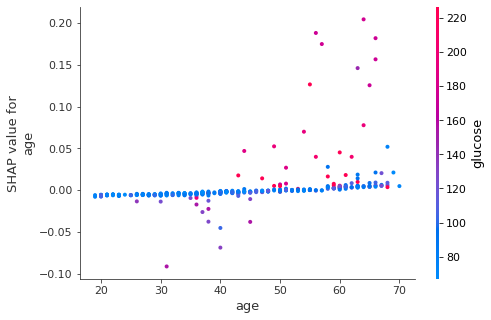

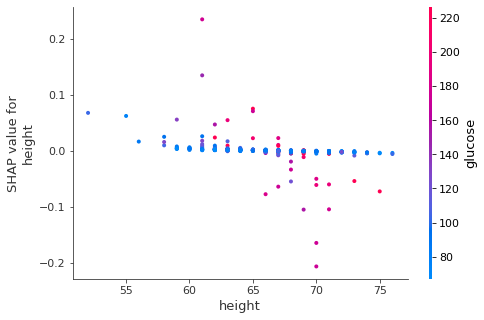

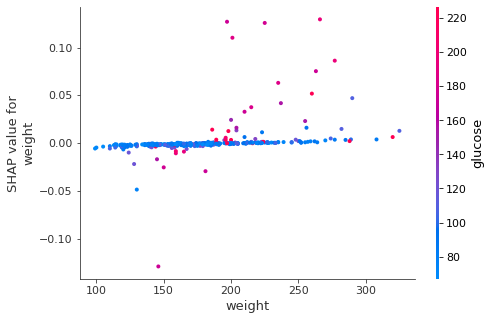

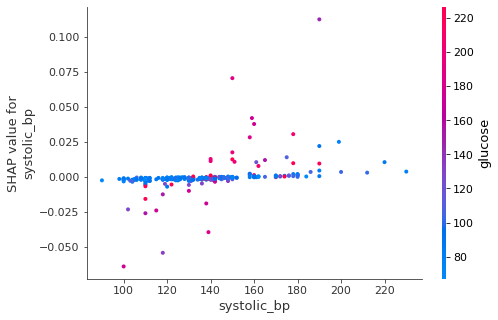

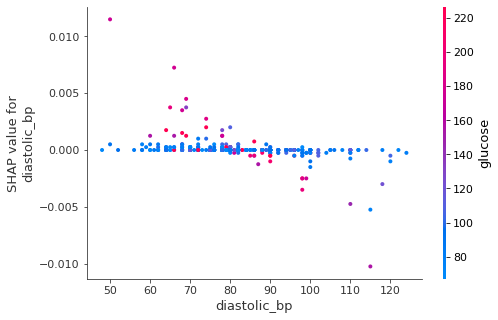

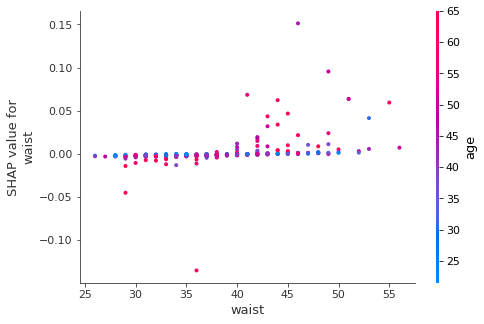

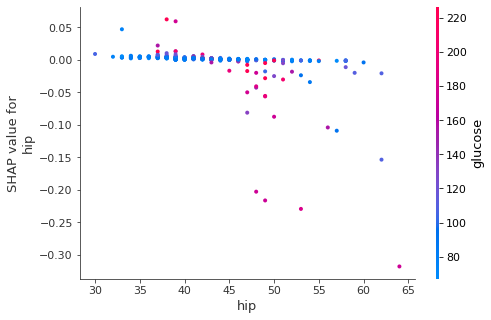

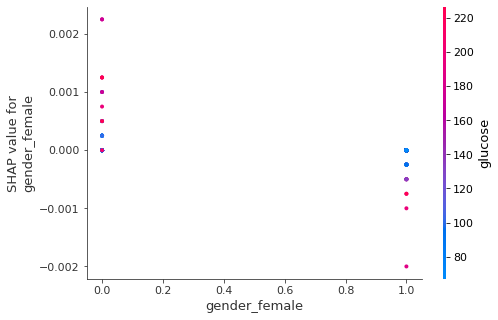

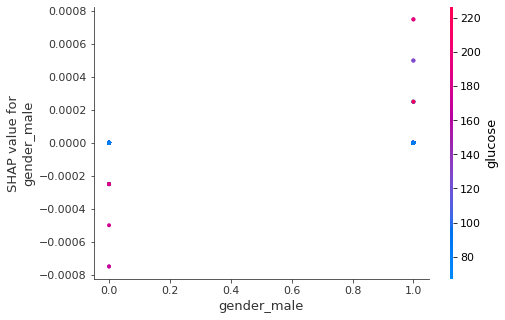

In [ ]:
# SHAP partial dependence plot for linear model
for i in X1_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, X1_train)

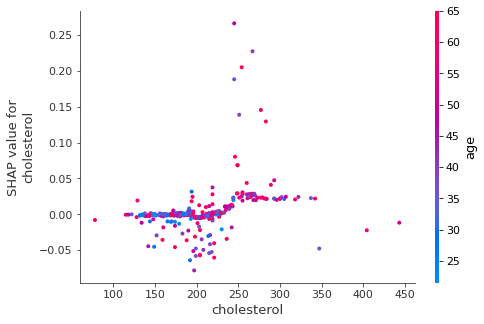

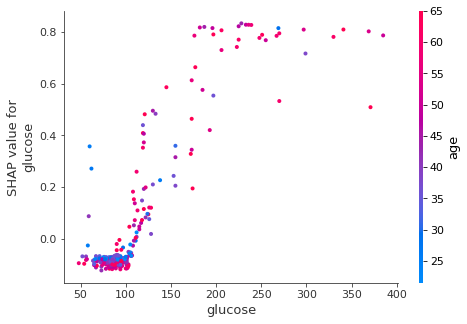

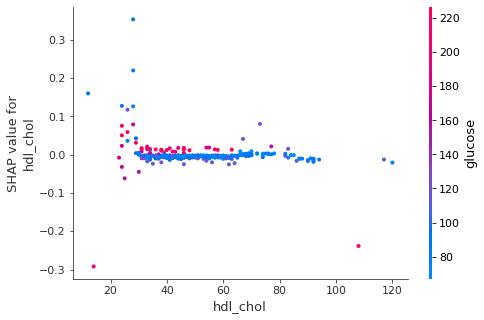

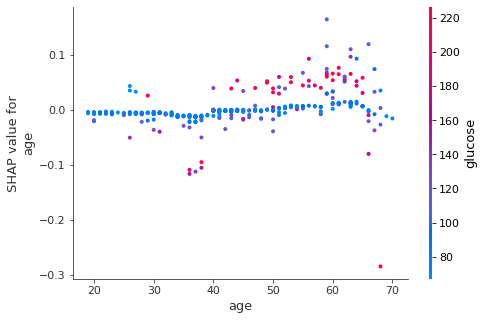

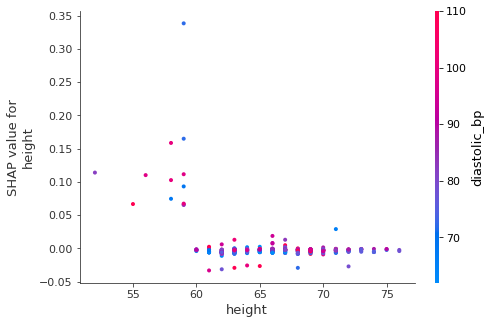

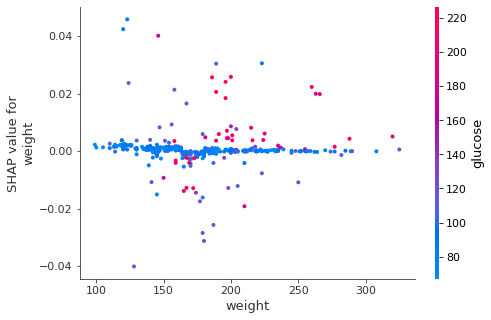

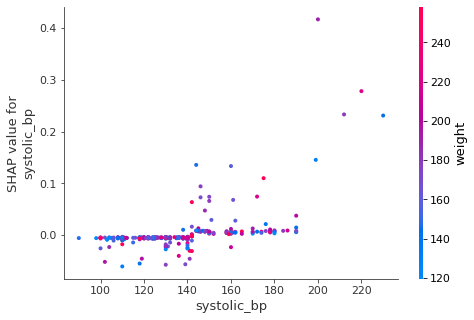

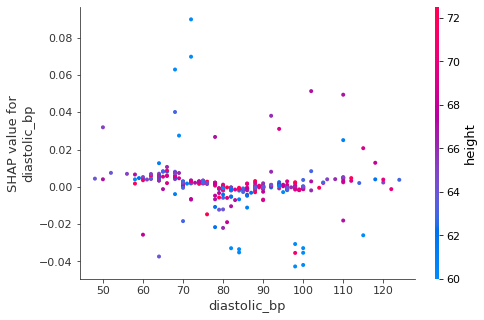

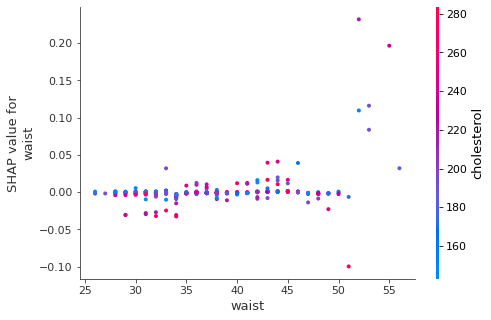

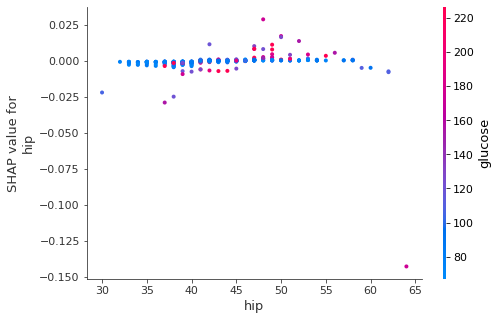

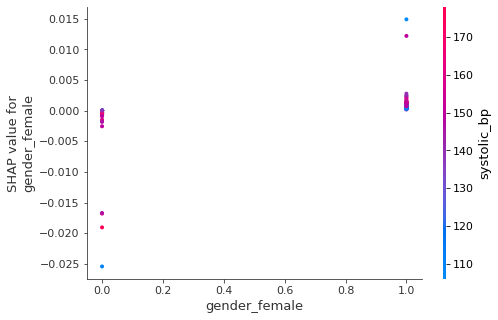

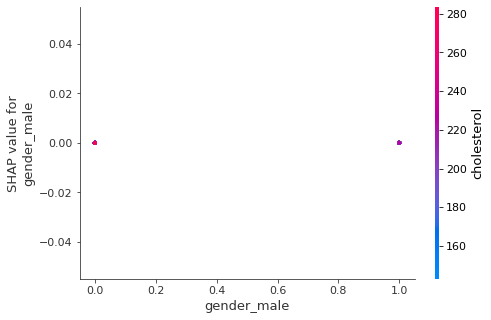

In [ ]:
# SHAP partial dependence plot for a tree based model
for i in X1_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, X1_train)

# **Heatmap Visualization for Linear and Tree-based model**

A summary of the complete dataset's effects on the target for each data point in each feature is shown in this visualization (Diabetes).

Here, the X-axis represents instances of that feature, while the Y-axis is features.
3. The instance's color indicates whether it had a favorable or unfavorable impact. If the instance is red, then the effect was positive; if it is blue, then the effect was negative.
4. The intensity of the color and the intensity of the effect are inversely correlated. The more powerful the feature, the deeper the hue.

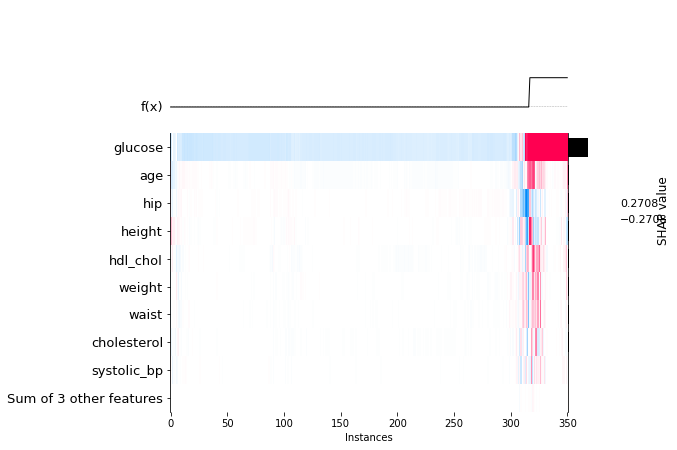

In [ ]:
shap.plots.heatmap(linear_shap_values)  # SHAP heatmap for a Linear Model

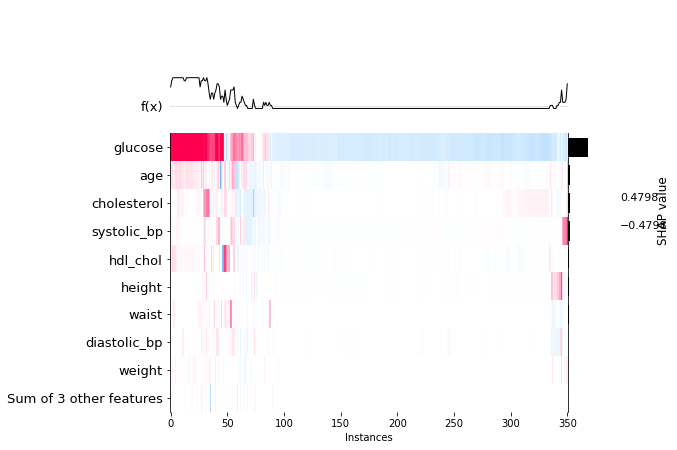

In [ ]:
shap.plots.heatmap(tree_shap_values)  # SHAP HeatMap of a Tree Based Model

# **LIME Analysis**

LIME creates a surrogate model, which involves simplifying a more complex model (such as a deep tree-based model) around the data points that are of interest before attempting to approximate the entire model using this simpler model. LIME creates a local model that allows it to interpret the entire Black-Box.

LIME is applicable to a variety of datasets since it performs well on tabular, text, and image datasets.

Let's try to understand what is going on by using LIME to interpret our linear model and tree-based model using sample data (sample index = 18). Please see the visualizations of both models below.

1. The minimum and maximum values predicted by the model are provided to us by LIME, as seen on the left. Thus, orange stands for something positive whereas blue for something negative.
2. Glucose, Systolic_bp, Cholesterol and hdl_chol had a negative impact on the linear model.
3. Glucose, Systolic_bp, Cholesterol, hdl_chol, gender_male, height and waist had a negative impact on the Tree Based model.

# **Linear Model**

In [ ]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X1_train), feature_names=X1_train.columns, mode="regression"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_X1_test = np.array(X1_test)
np_y1_test = np.array(y1_test)
print("Prediction : ", regr.predict(np_X1_test[0].reshape(1, -1)))
print("Actual :     ", np_y1_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_X1_test[idx], regr.predict, num_features=np_X1_test.shape[1]
)
lime_linear_explanation

Prediction :  [0]
Actual :      0


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


In [ ]:
# Display Results in Notebook
lime_linear_explanation.show_in_notebook()  

# **Tree Based Model**

In [ ]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X1_train), feature_names=X1_train.columns, mode="regression"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_X1_test = np.array(X1_test)
np_y1_test = np.array(y1_test)
print("Prediction : ", rf_model.predict(np_X1_test[0].reshape(1, -1)))
print("Actual :     ", np_y1_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_X1_test[idx], rf_model.predict, num_features=np_X1_test.shape[1]
)
lime_tree_explanation

Prediction :  [0.]
Actual :      0


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [ ]:
# Display Results in Notebook
lime_tree_explanation.show_in_notebook()  

# **PDP for Linear and Tree Based Models**

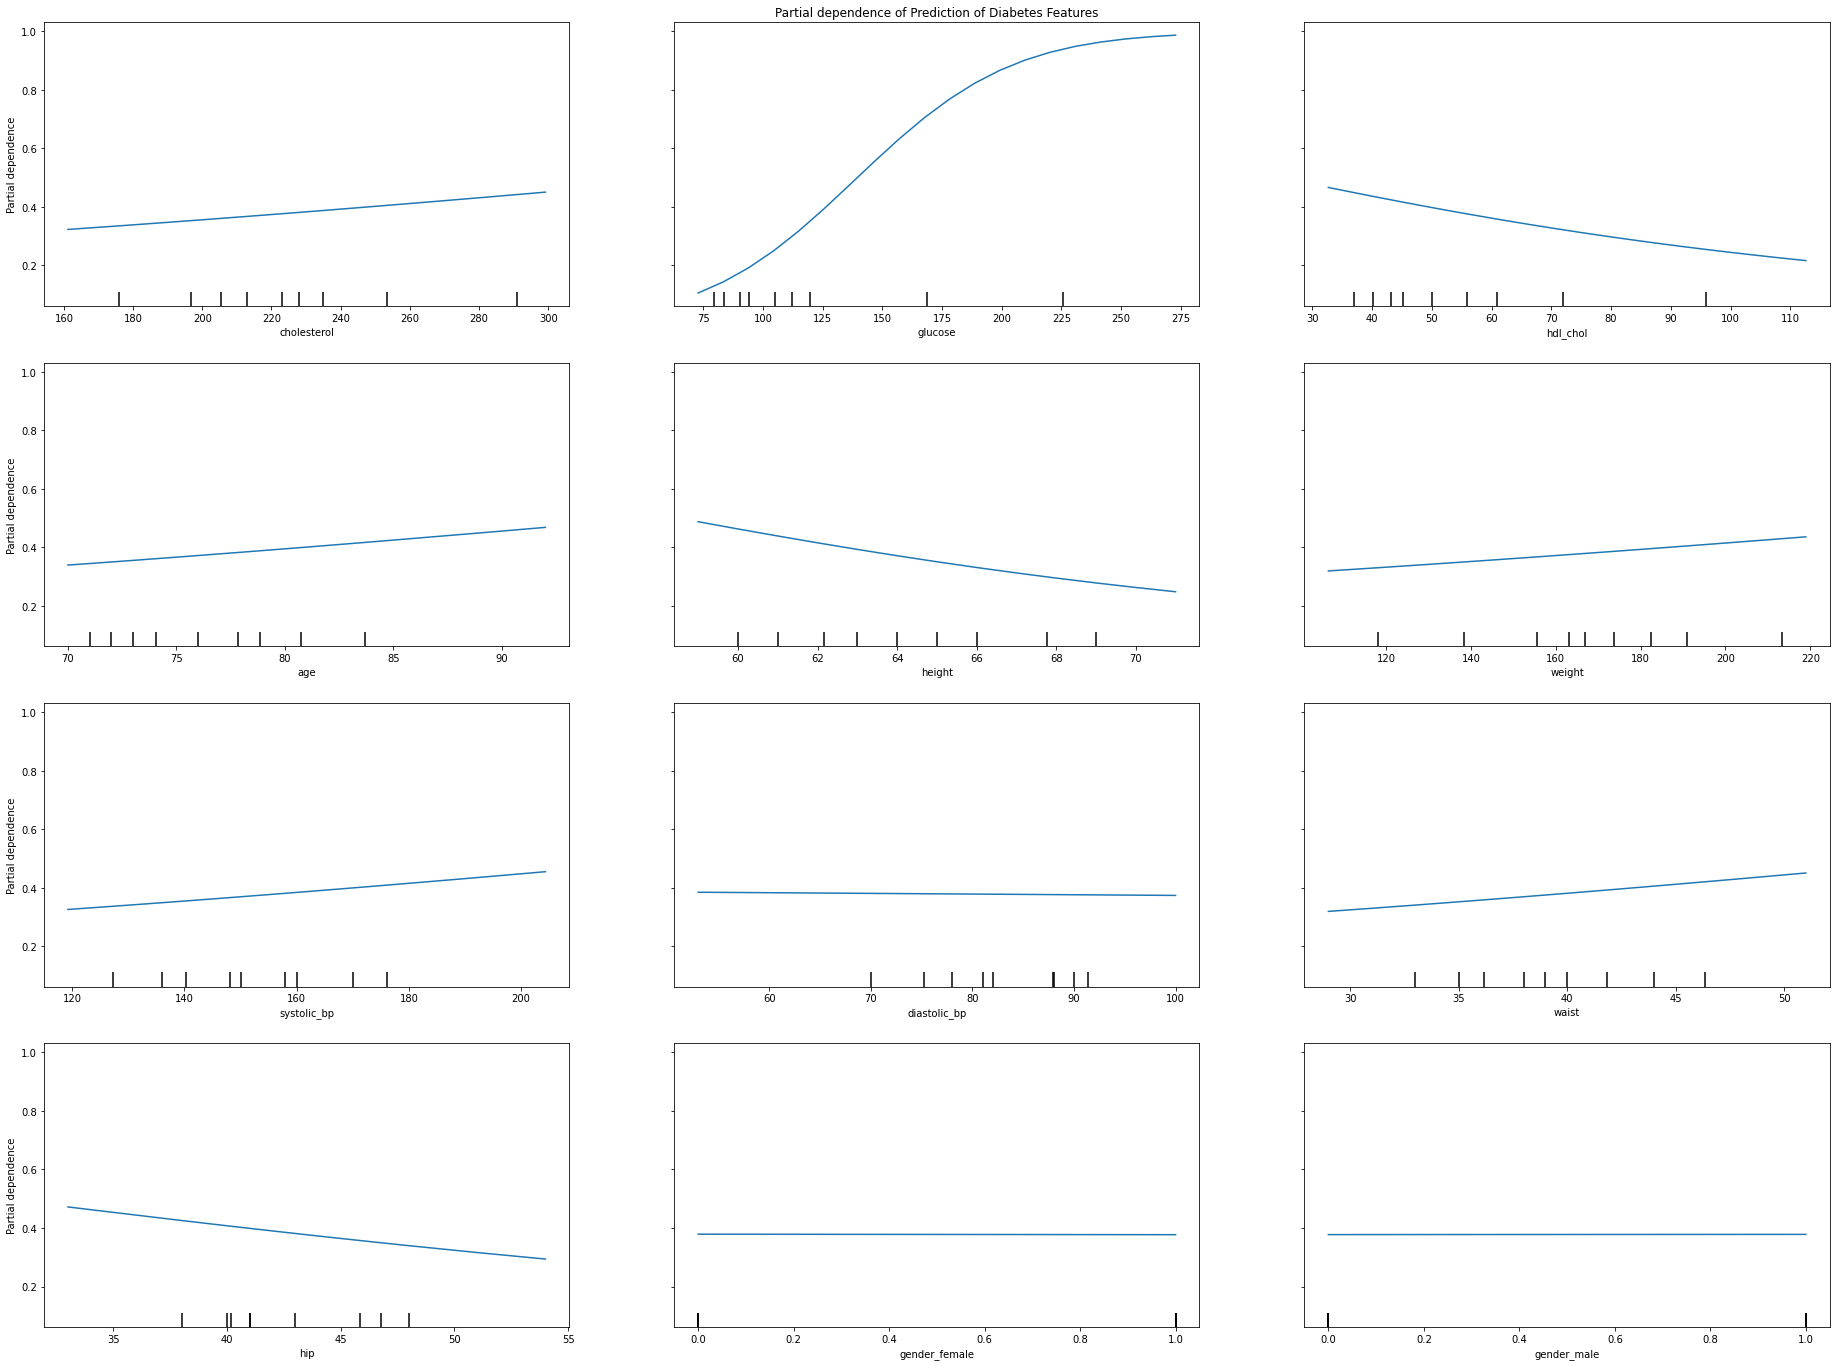

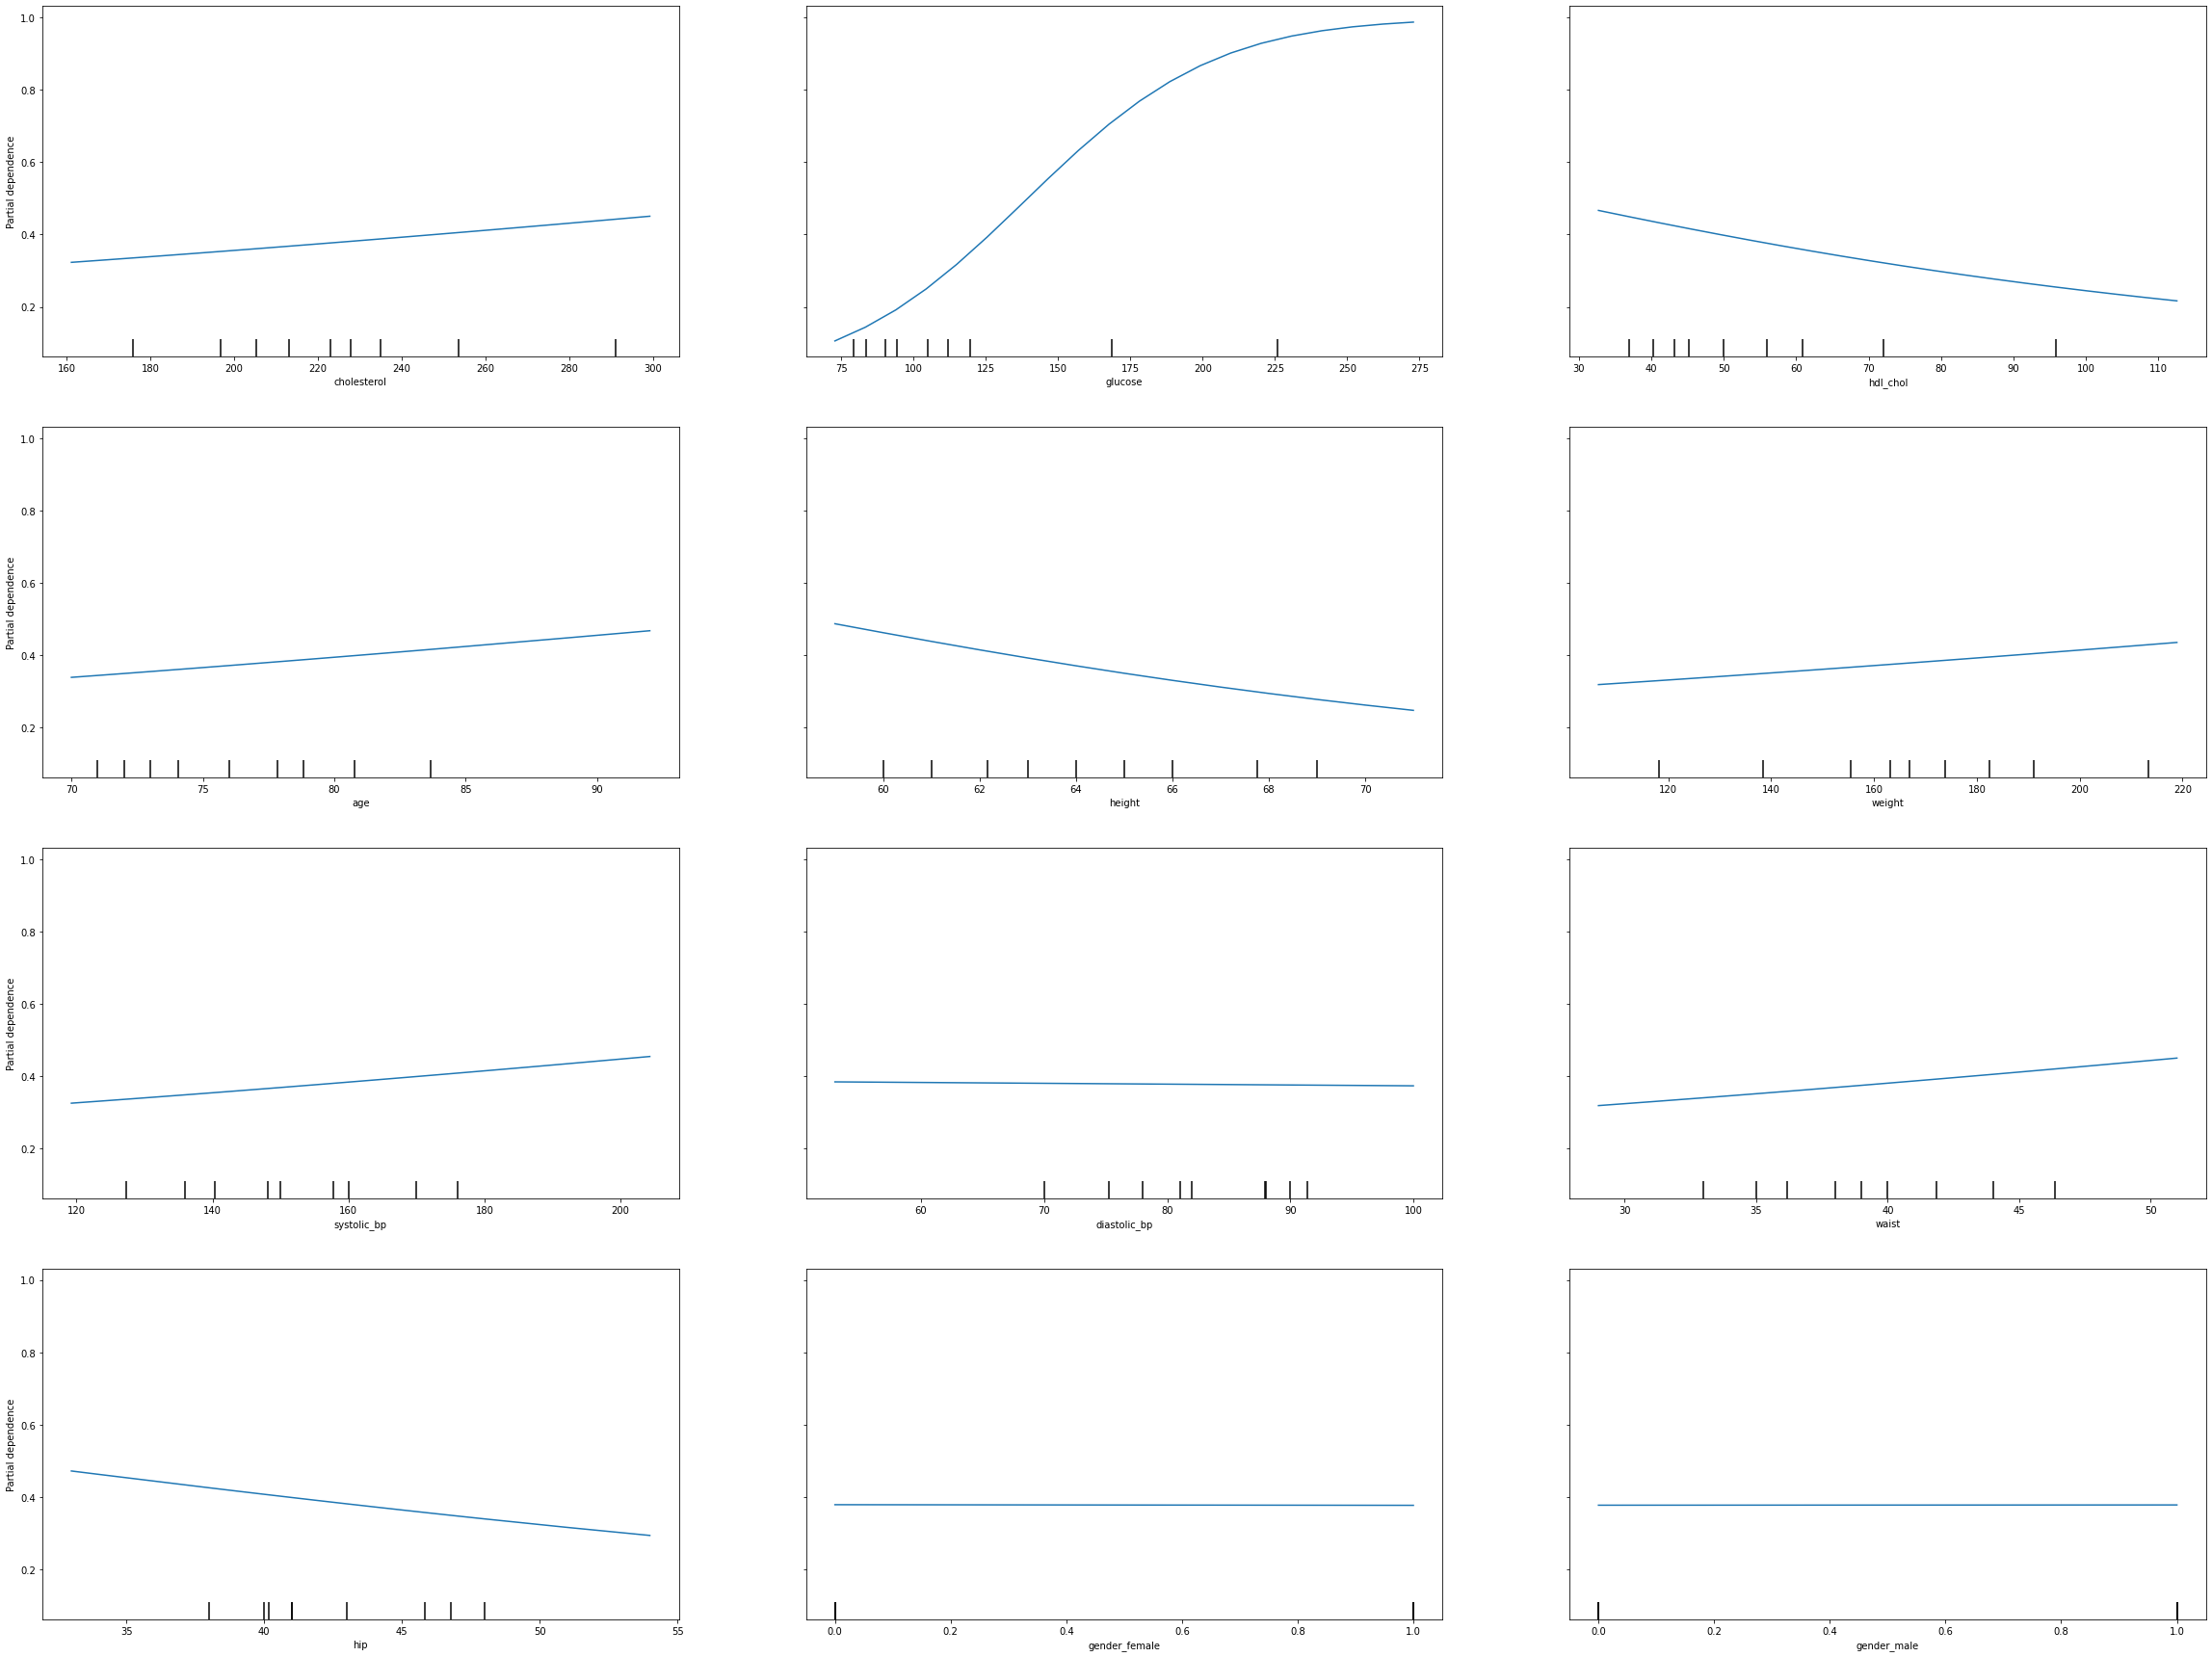

In [ ]:
# PDP Plot for Linear Model
fig, ax = plt.subplots(figsize=(32, 24))
display = PartialDependenceDisplay.from_estimator(regr, X1_test, X1_test.columns, n_jobs=3, grid_resolution=20)
display.plot(ax=ax)
ax.set_title("Partial dependence of Prediction of Diabetes Features")
plt.tight_layout()
plt.show()

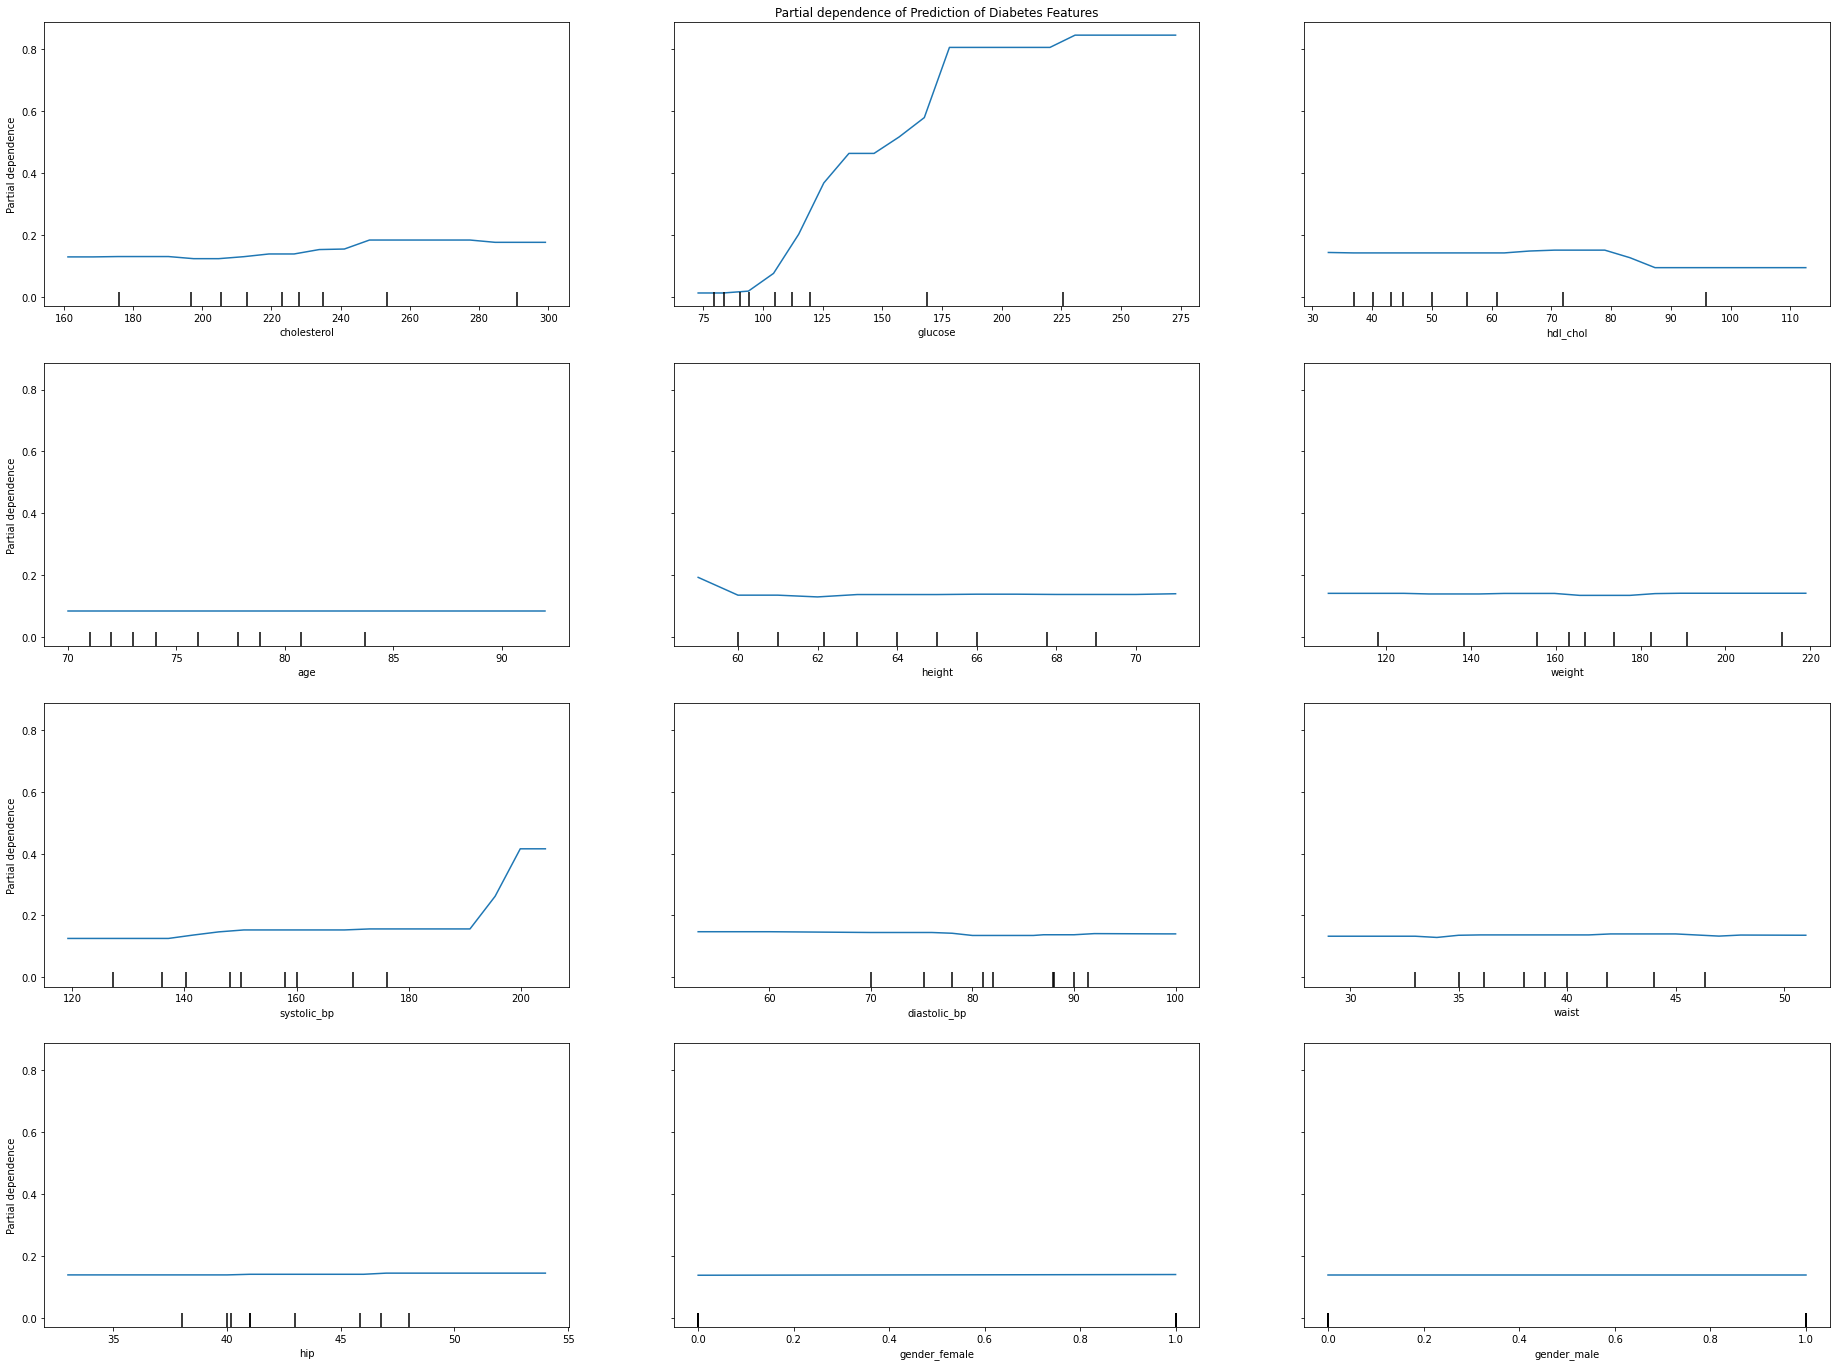

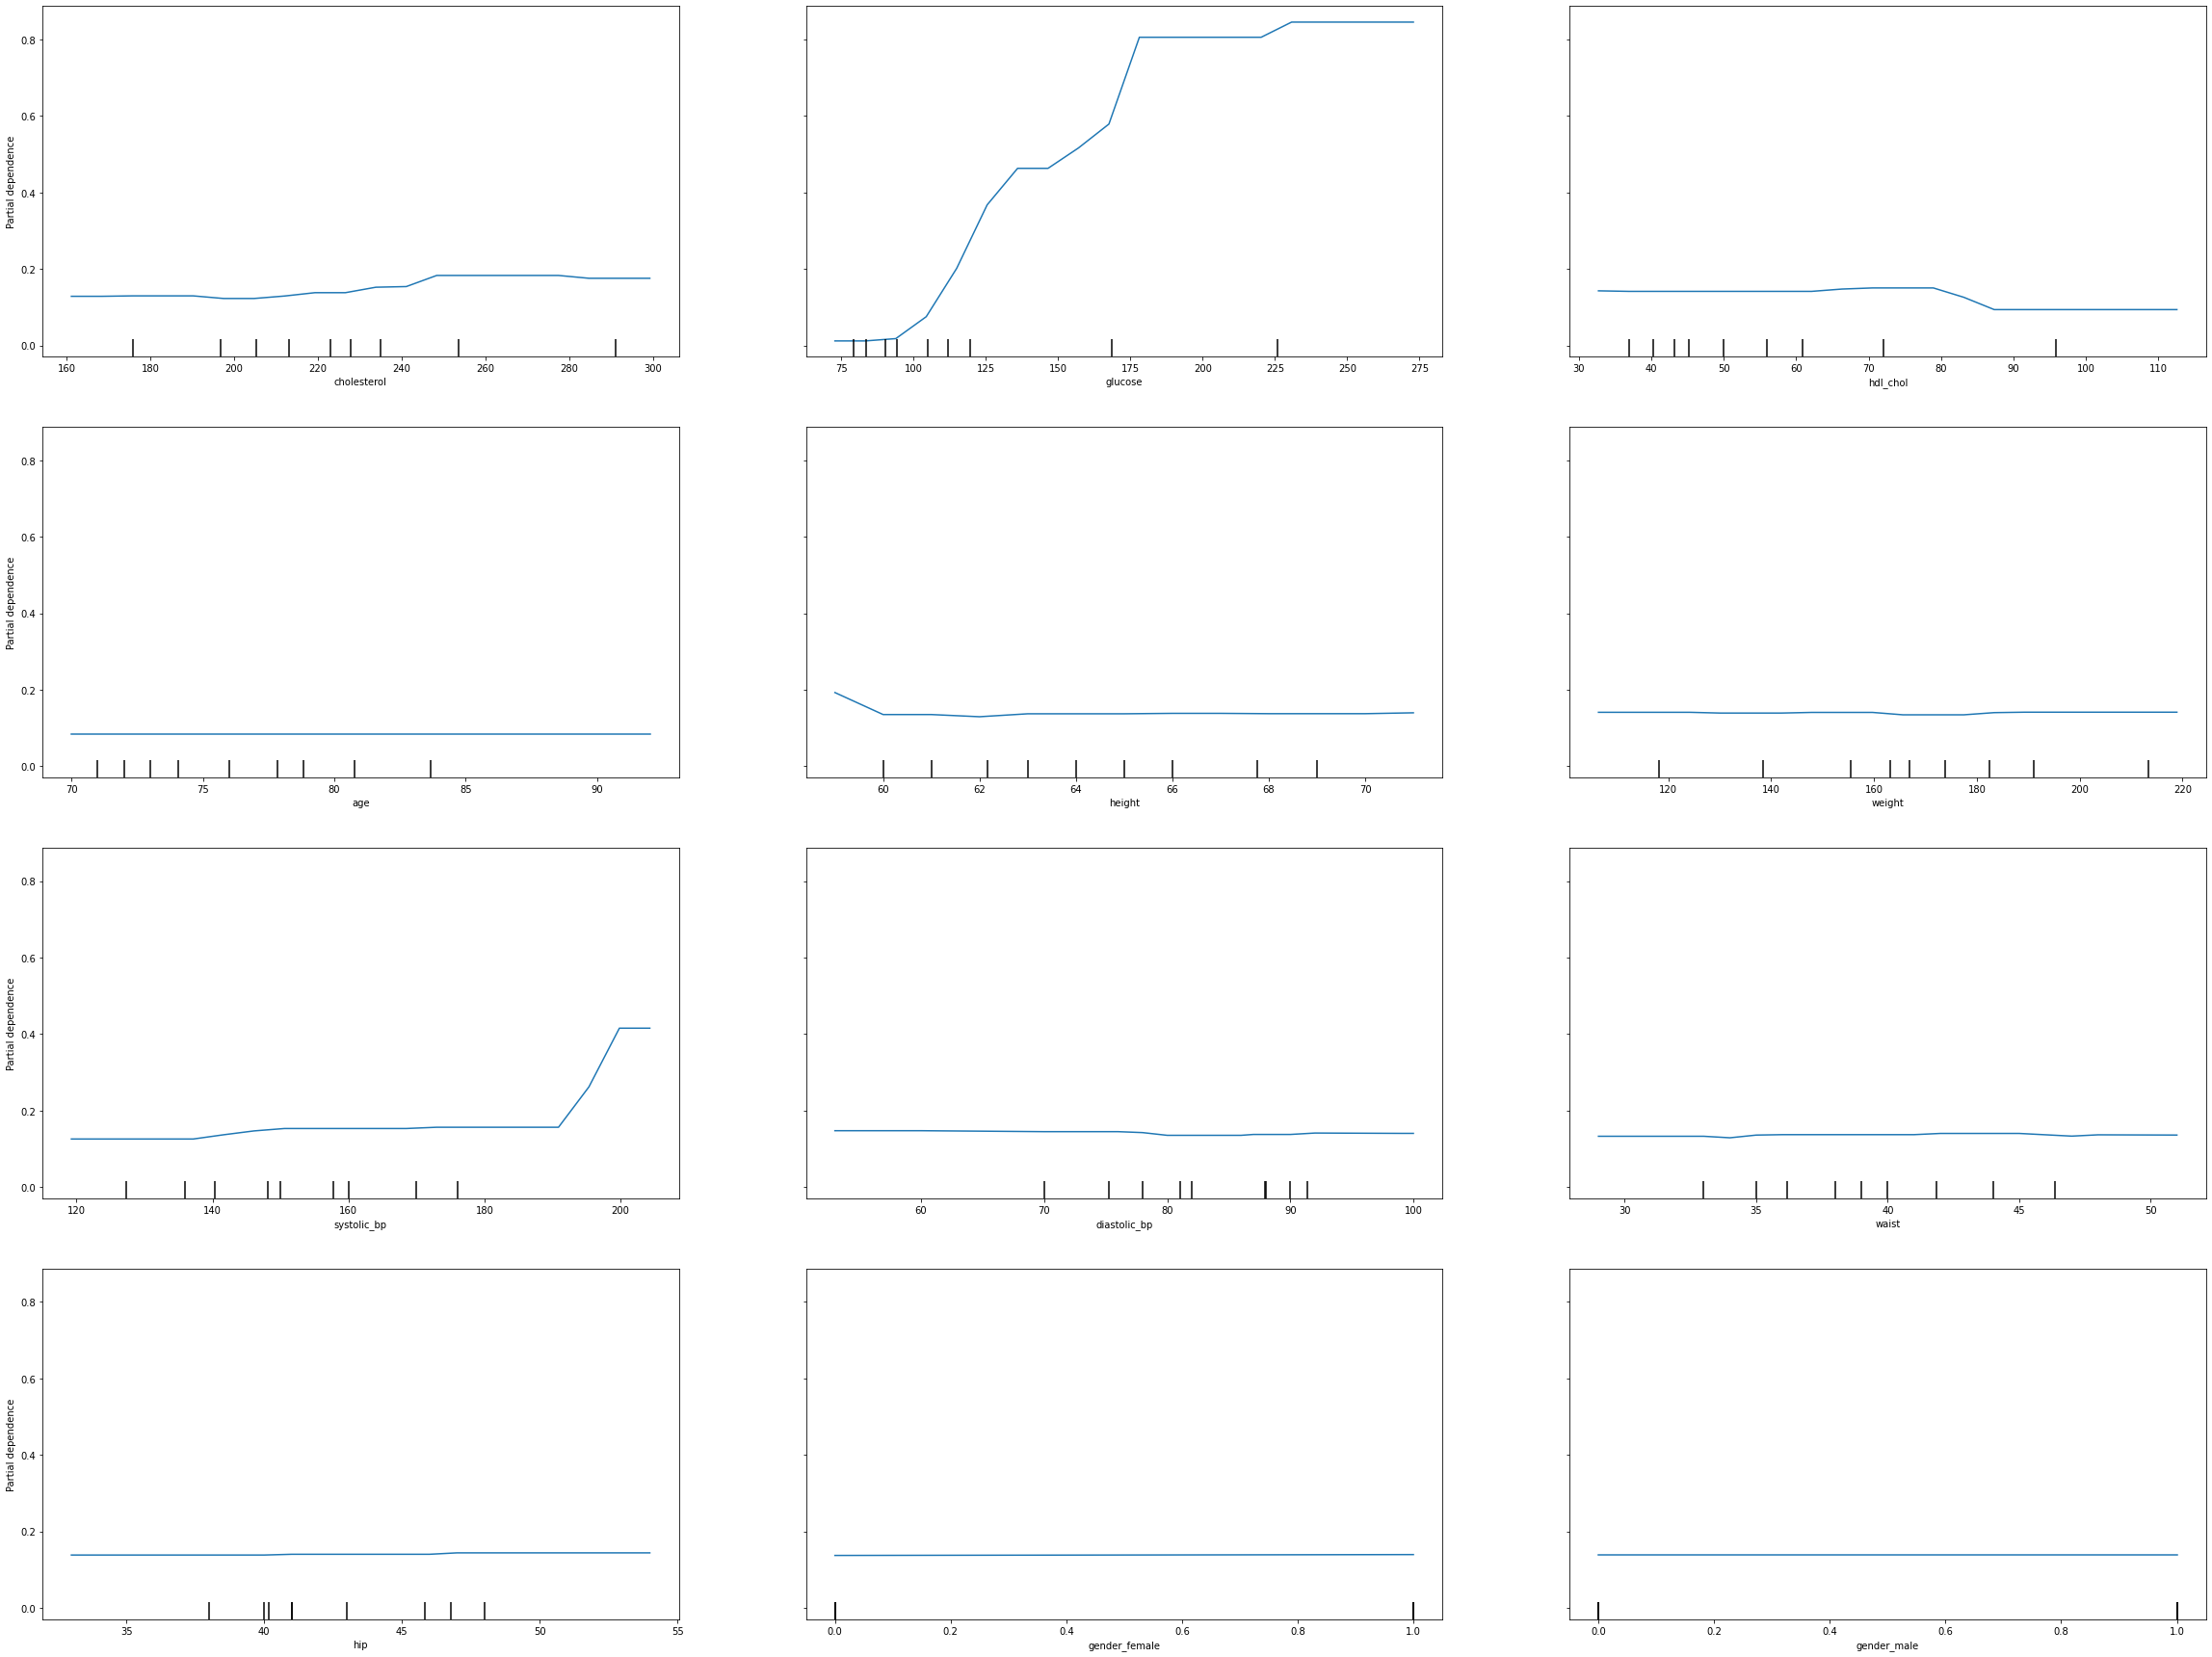

In [ ]:
# PDP Plot for Tree Based Model
fig, ax = plt.subplots(figsize=(32, 24))
display = PartialDependenceDisplay.from_estimator(rf_model, X1_test, X1_test.columns, n_jobs=3, grid_resolution=20)
display.plot(ax=ax)
ax.set_title("Partial dependence of Prediction of Diabetes Features")
plt.tight_layout()
plt.show()

# **Conclusion**

# Differentiation between SHAP, LIME and PDP

The black-box model is used by SHAP instead of LIME to determine each feature's marginal contribution to the prediction. Shapley values, a theoretically sound idea from game theory, are then used to determine the relevance of each feature. Because of its superior stability and lack of local linear model assumptions, SHAP outperforms LIME in this way.

1. By freezing the other variables, PDP reveals how much of an impact a particular variable has on the outcome.
2. Each variable's contribution to the prediction is shown by SHAP.
3. LIME is a lighter form of SHAP and is more similar to it. It uses the vicinity of the point of interest and provides details on how each variable affected the outcome.

To choose the most appropriate interpretable approach for the ML model, we must first examine our needs and then weigh the trade-offs.

# **References**

*   Molnar, C. (2022). Interpretable Machine Learning: A Guide for Making Black Box Models Explainable (2nd ed.)
christophm.github.io/interpretable-ml-book/
*   https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

*   https://medium.com/@kalia_65609/interpreting-an-nlp-model-with-lime-and-shap-834ccfa124e4#:~:text=Unlike%20LIME%2C%20SHAP%20does%20not,to%20calculate%20the%20feature%20importance.

*   https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html

*   https://shap.readthedocs.io/en/latest/api.html
*   Professor's Notebook: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb









# **License**

**MIT License**

Copyright (c) 2023 Shreyas Dasari

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.